##Analyze Bike Store Sales
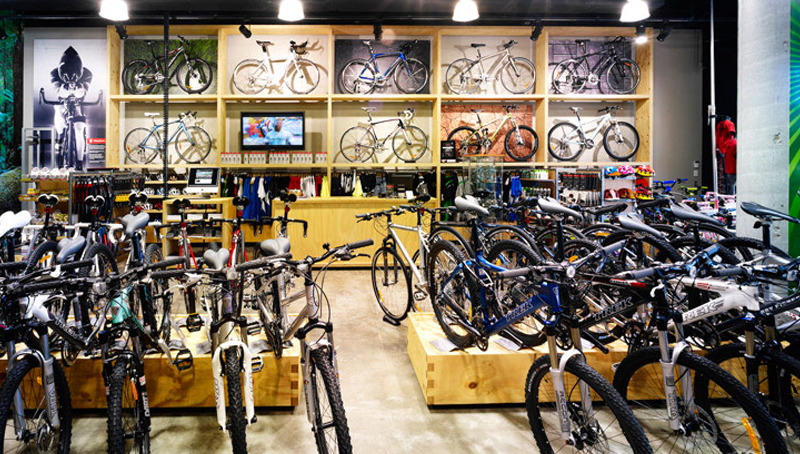

##Exploratory Data Analysis - EDA
**Goal**: Understand the structure of the data, detect missing values and outliers, and explore distributions and relationships between variables.

In [120]:
# Install required libraries
!pip install streamlit pyngrok prophet plotly --quiet

In [121]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress
from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import streamlit as st
import warnings
warnings.filterwarnings('ignore')

In [122]:
#Load data
sales = pd.read_csv('sales_data.csv')

In [123]:
sales.shape

(5000, 16)

In [124]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [125]:
sales.head()

Date  Day      Month  Year  Customer_Age Customer_Gender  \
0  2014-03-05    5      March  2014            34               M   
1  2013-08-18   18     August  2013            31               F   
2  2014-02-04    4   February  2014            31               F   
3  2013-09-09    9  September  2013            33               M   
4  2016-05-16   16        May  2016            35               F   

         Country             State Product_Category     Sub_Category  \
0  United States        California      Accessories          Fenders   
1         Canada  British Columbia         Clothing            Vests   
2  United States        Washington            Bikes    Touring Bikes   
3      Australia          Victoria      Accessories  Tires and Tubes   
4  United States        Washington      Accessories  Tires and Tubes   

                   Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0    Fender Set - Mountain              27          8          22     366   
1          Classic Vest, L              13         24          64     512   
2  Touring-1000 Yellow, 54               1       1482        2384     378   
3             LL Road Tire              25          8          21     215   
4       Mountain Tire Tube              28          2           5      53   

   Revenue  
0      582  
1      824  
2     1860  
3      415  
4      109

In [126]:
sales.tail()

Date  Day     Month  Year  Customer_Age Customer_Gender  \
4995  2014-01-27   27   January  2014            34               M   
4996  2014-07-14   14      July  2014            17               M   
4997  2013-12-30   30  December  2013            25               F   
4998  2016-01-06    6   January  2016            57               M   
4999  2014-03-09    9     March  2014            50               F   

            Country             State Product_Category       Sub_Category  \
4995  United States        California      Accessories  Bottles and Cages   
4996         France        Val d'Oise         Clothing               Caps   
4997         Canada  British Columbia      Accessories            Helmets   
4998         Canada  British Columbia      Accessories    Tires and Tubes   
4999      Australia        Queensland      Accessories    Tires and Tubes   

                     Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
4995   Water Bottle - 30 oz.              20          2           5      58   
4996            AWC Logo Cap              12          7           9       1   
4997  Sport-100 Helmet, Blue              20         13          35     433   
4998     Patch Kit/8 Patches              16          1           2      16   
4999     Patch Kit/8 Patches              15          1           2      10   

      Revenue  
4995       98  
4996       85  
4997      693  
4998       32  
4999       25

In [127]:
# Check for missing values
print(sales.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Revenue             0
dtype: int64


In [128]:
# Define numeric columns
numeric_cols = ['Profit', 'Revenue', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Customer_Age']

In [129]:
#Statistical Summary
sales[numeric_cols].describe().T

count      mean          std   min   25%    50%     75%  \
Profit          5000.0  291.6534   457.359971 -24.0  29.0  103.0  367.00   
Revenue         5000.0  772.7580  1306.052588   2.0  64.0  226.0  829.25   
Order_Quantity  5000.0   11.8204     9.607841   1.0   2.0   10.0   20.00   
Unit_Cost       5000.0  278.4150   562.721951   1.0   2.0    9.0   42.00   
Unit_Price      5000.0  470.6806   941.590529   2.0   5.0   25.0   70.00   
Customer_Age    5000.0   35.9338    11.087886  17.0  28.0   35.0   43.00   

                    max  
Profit           5342.0  
Revenue         14026.0  
Order_Quantity     32.0  
Unit_Cost        2171.0  
Unit_Price       3578.0  
Customer_Age       87.0

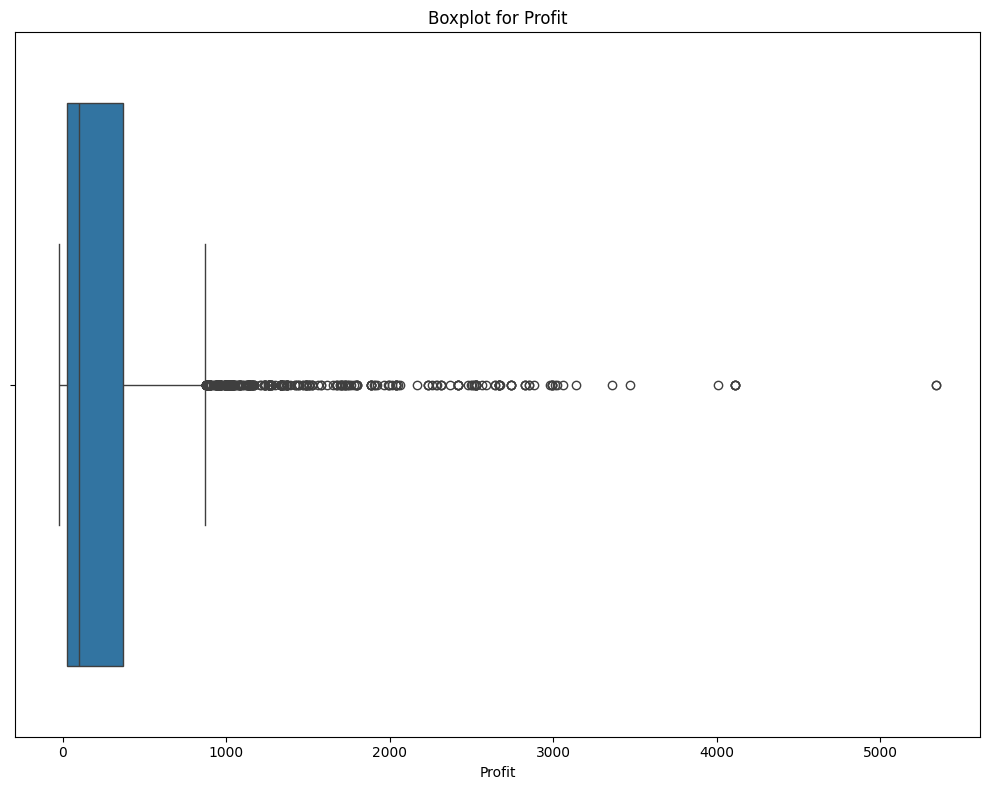

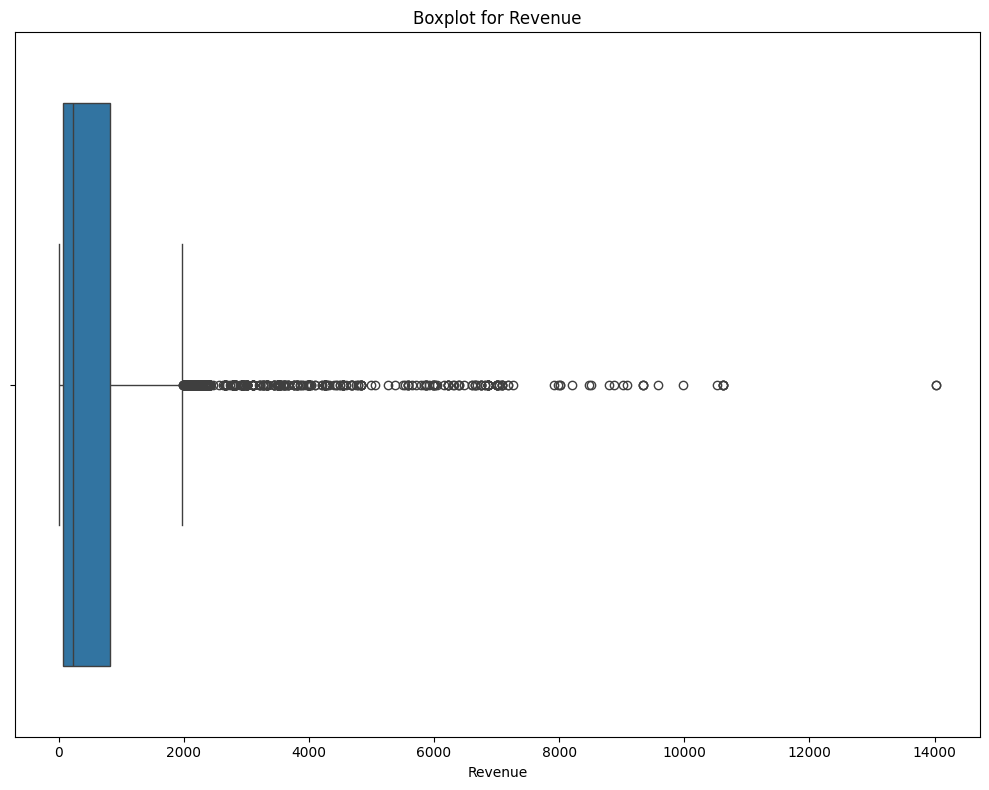

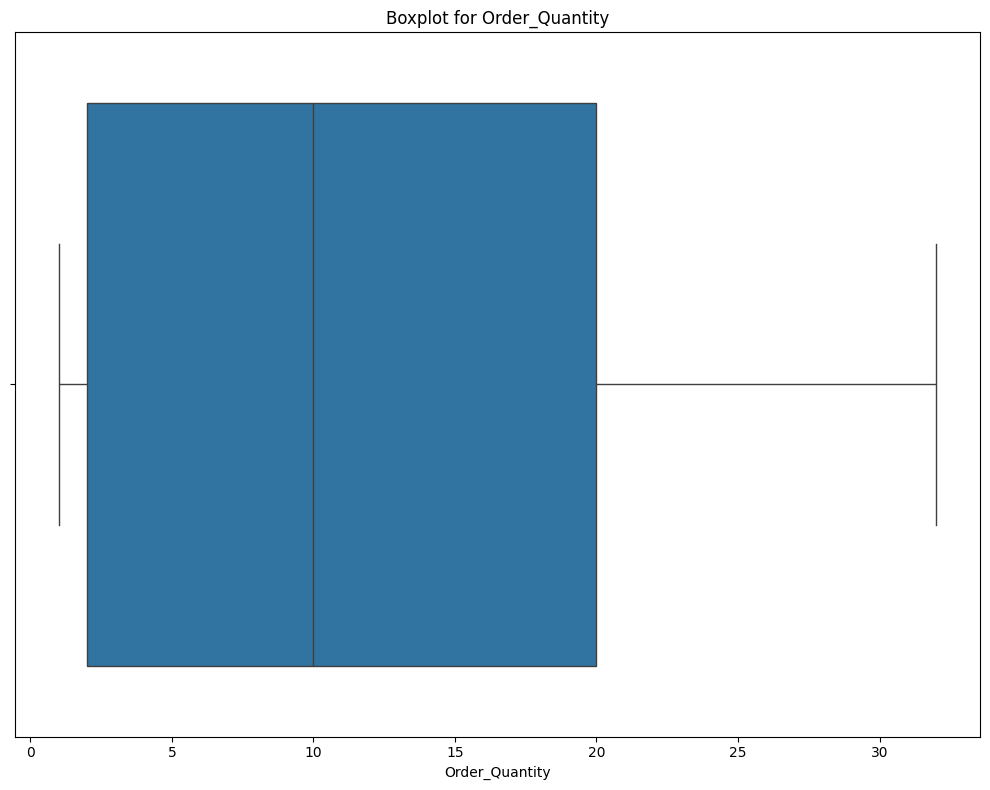

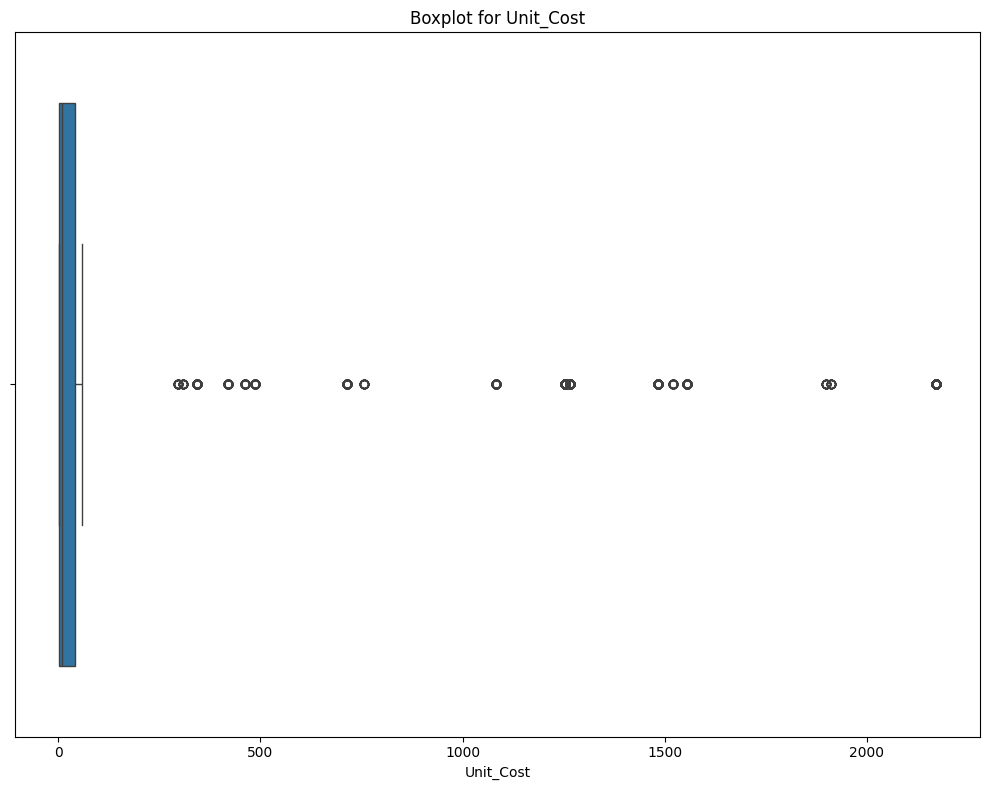

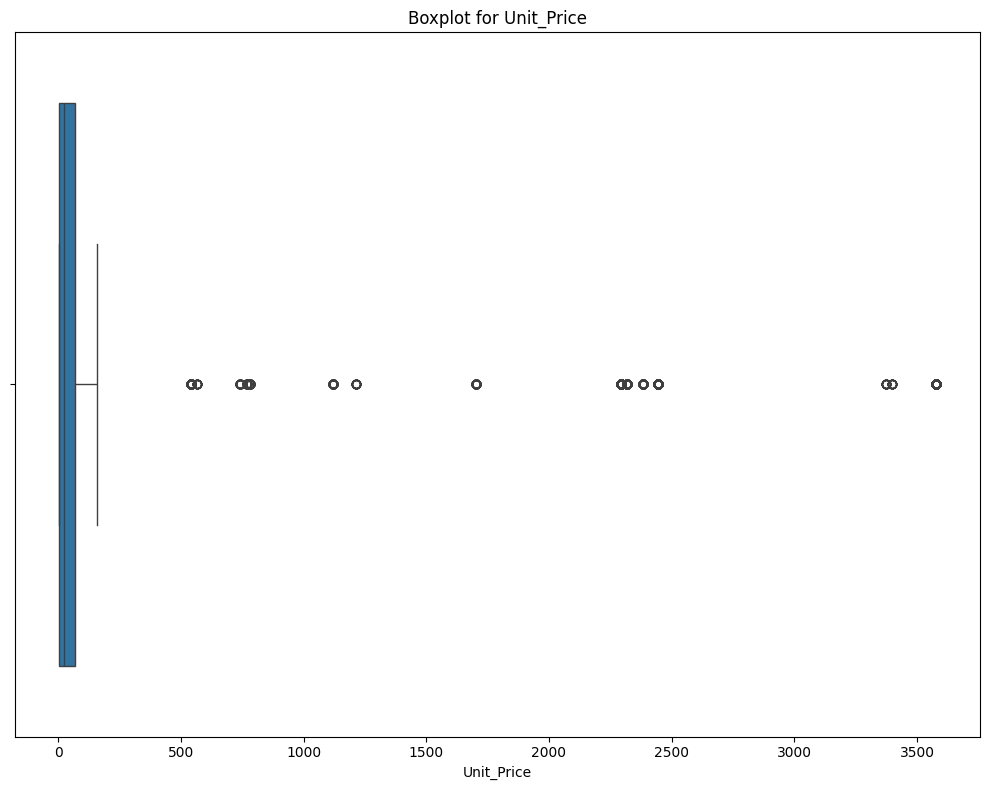

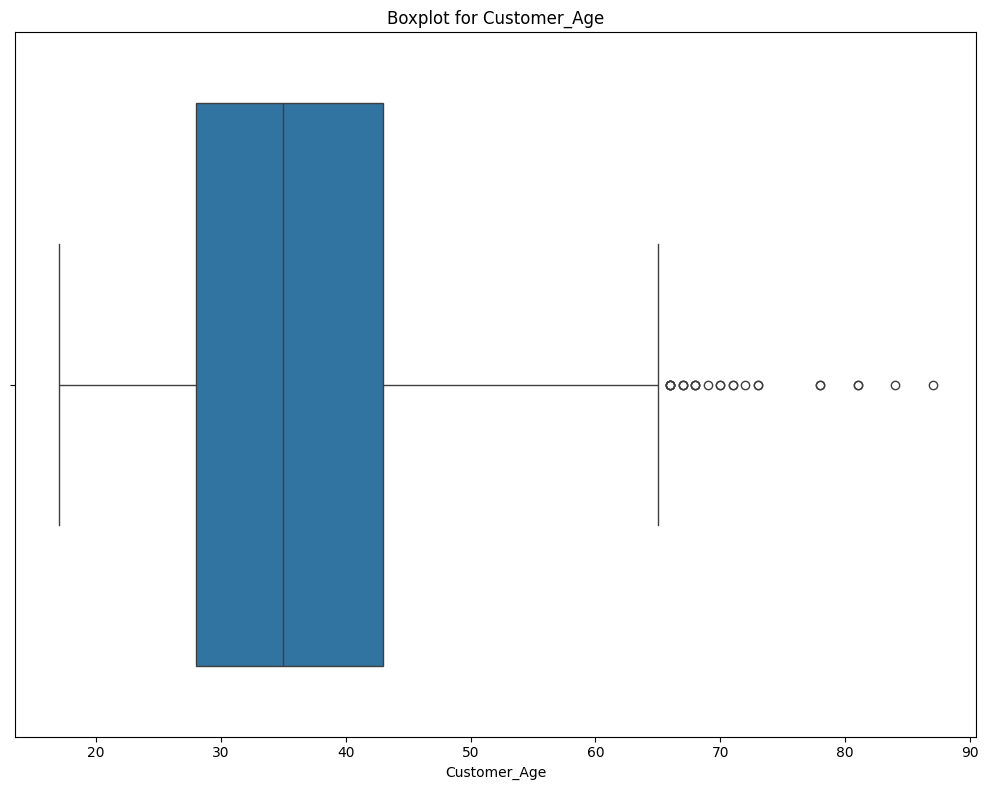

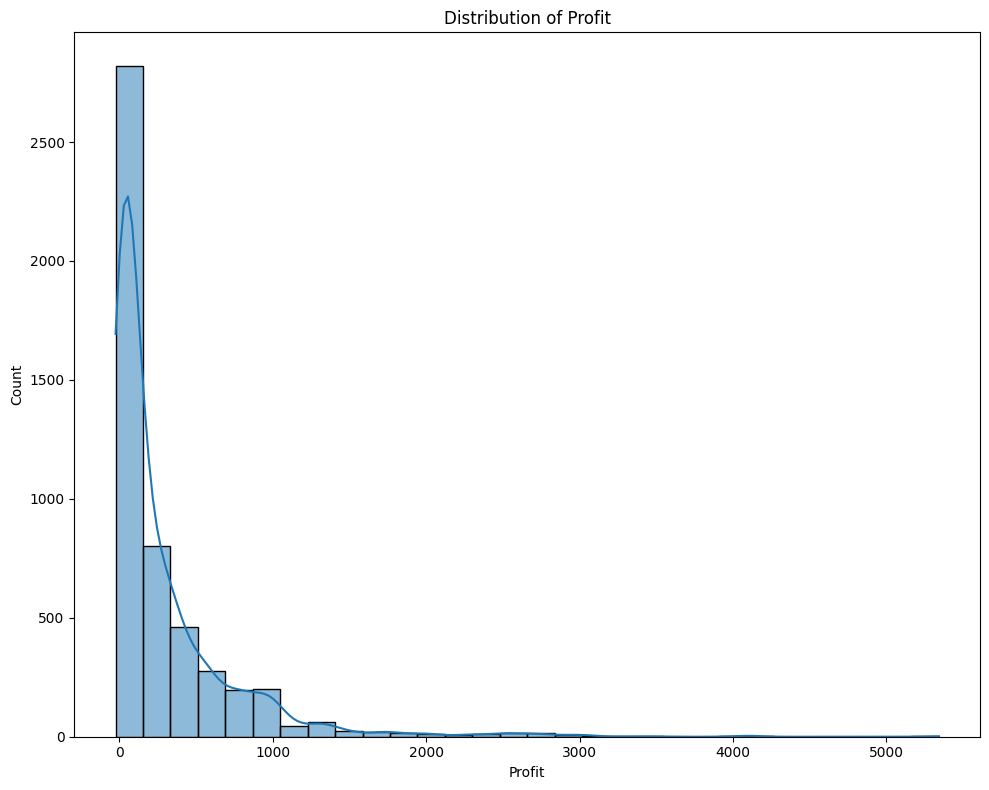

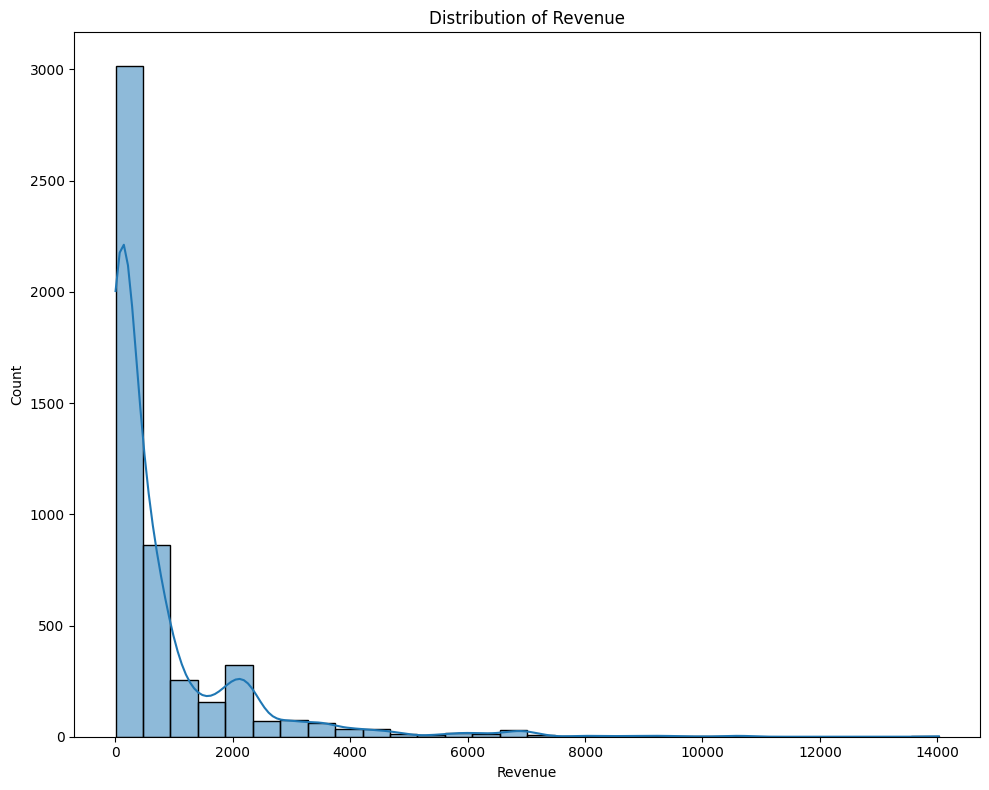

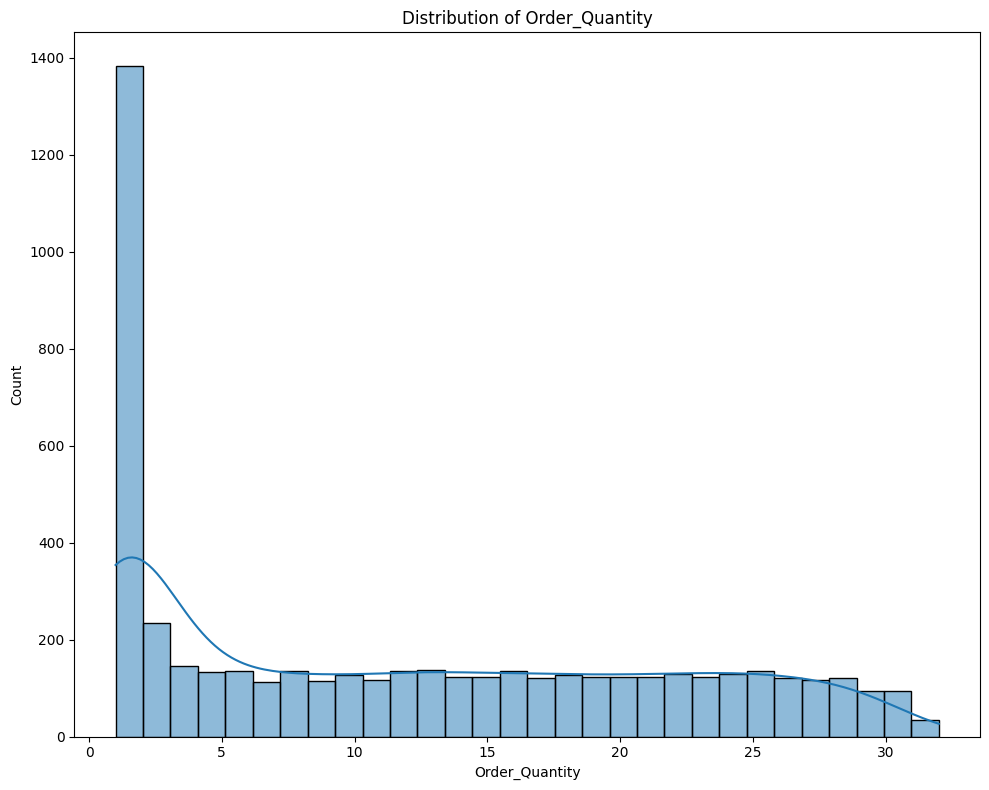

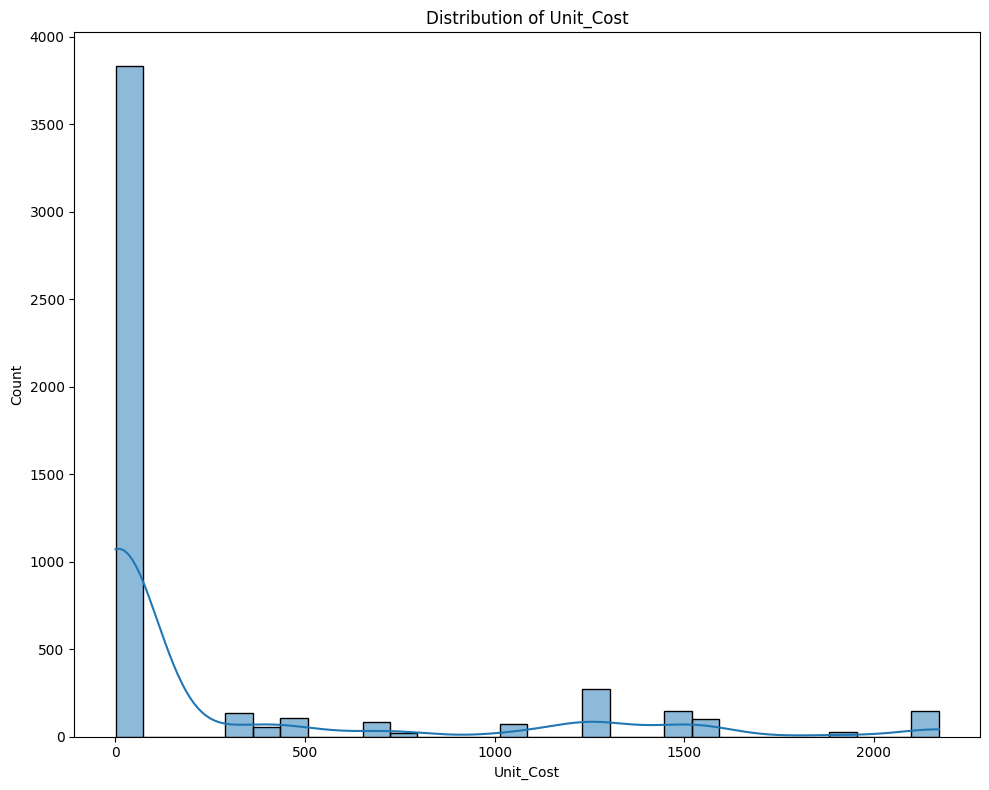

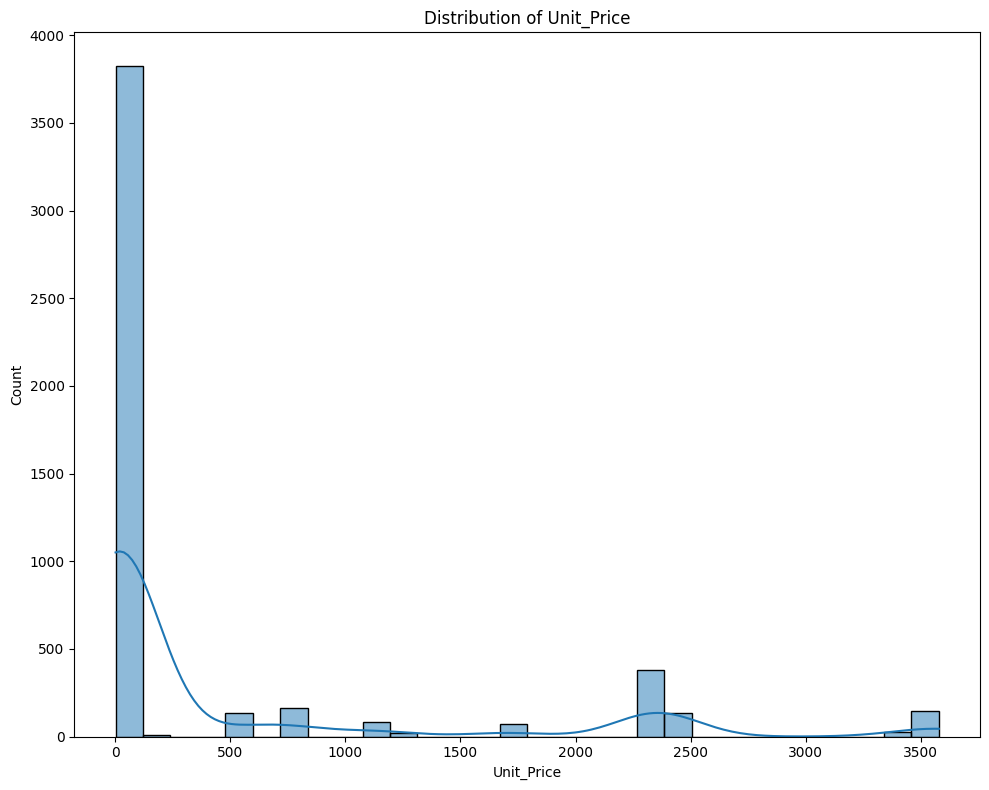

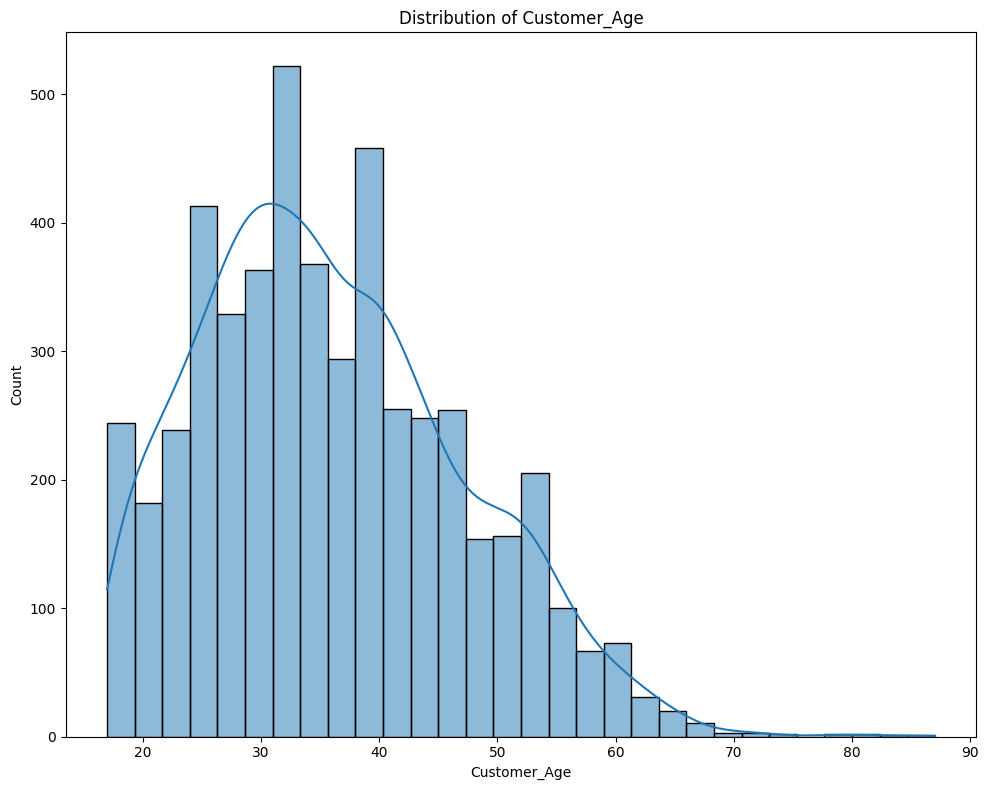

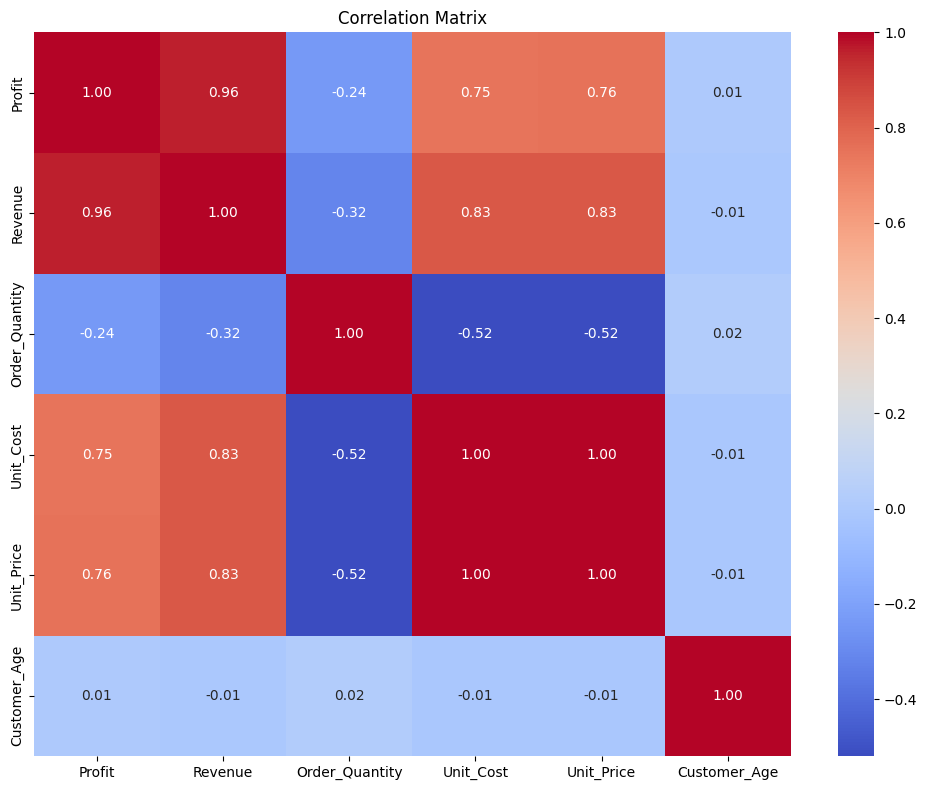

In [130]:
# Boxplots for numerical features
# Purpose: Detect outliers that could skew analysis or modeling

for col in numeric_cols:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=sales[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

# Histograms with KDE for distribution
# Purpose: Understand the distribution of each numerical variable (normal, skewed, etc.)

for col in numeric_cols:
    plt.figure(figsize=(10, 8))
    sns.histplot(sales[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Correlation Heatmap
# Purpose: Identify the strength and direction of relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(sales[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

##Data Cleaning & Preprocessing
**Goal**: Ensure the dataset is clean and ready for analysis by handling duplicates,fixing data types, and preparing categorical and datetime columns.

In [131]:
# Check for duplicates
print("Number of duplicate rows:", sales.duplicated().sum())

Number of duplicate rows: 1


In [132]:
duplicates_all = sales[sales.duplicated(keep=False)]
display(duplicates_all)

Date  Day     Month  Year  Customer_Age Customer_Gender  \
2663  2015-12-21   21  December  2015            23               M   
3424  2015-12-21   21  December  2015            23               M   

             Country    State Product_Category    Sub_Category  \
2663  United Kingdom  England            Bikes  Mountain Bikes   
3424  United Kingdom  England            Bikes  Mountain Bikes   

                        Product  Order_Quantity  Unit_Cost  Unit_Price  \
2663  Mountain-400-W Silver, 46               3        420         769   
3424  Mountain-400-W Silver, 46               3        420         769   

      Profit  Revenue  
2663     955     2215  
3424     955     2215

In [133]:
# Remove duplicates
sales = sales.drop_duplicates(keep='first')
print(sales.shape)

(4999, 16)


In [134]:
# Fixing Column Types
# Convert Date column to datetime
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Check if any dates failed to convert
print("Missing values in 'Date' after conversion:", sales['Date'].isna().sum())


# Convert selected columns to categorical type
categorical_columns = ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']

for col in categorical_columns:
    sales[col] = sales[col].astype('category')

Missing values in 'Date' after conversion: 0


In [135]:
# Check data types after conversion
print("\nData Types After Conversion:")
print(sales.dtypes)

# Final check for missing values
print("\nMissing values summary:")
print(sales.isnull().sum())


Data Types After Conversion:
Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Customer_Gender           category
Country                   category
State                     category
Product_Category          category
Sub_Category              category
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Revenue                      int64
dtype: object

Missing values summary:
Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Revenue             0
dtype: int64


## Feature Engineering  
**Goal**: Create new columns that provide more insight and support advanced analysis.

- **`YearMonth`**: Combines year and month into a single string (e.g., `'2022-07'`) for trend analysis.
- **`Year`, `Month`, `Day`**: Extracted from the `Date` column to support temporal analysis.
- **`Month_Name`**: Returns the full month name (e.g., `'July'`) for more readable plots.
- **`Weekday`**: Shows the day of the week (e.g., `'Monday'`) for weekday-based sales patterns.
- **`Is_Weekend`**: Boolean flag that indicates if the sale occurred on a weekend.
- **`Season`**: Categorizes months into four seasons (`Winter`, `Spring`, `Summer`, `Fall`) for seasonal trend analysis.
- **`Profit_per_Unit`**: Calculates profit per unit sold (`Profit / Order_Quantity`) to evaluate product performance.
- **`Total_Cost`**: Total production/purchase cost of the order (`Unit_Cost * Order_Quantity`).
- **`Order_Value`**: Total sales value for an order (`Unit_Price * Order_Quantity`).
- **`Gross_Profit_Margin`**: Measures profitability as a percentage of revenue (`Profit / Revenue`).
- **`Age_Group`**: Segments customer ages into meaningful predefined ranges (`17–24`, `25–34`, `35–44`, `45–54`, `55+`) using `pd.cut`, which helps in clear demographic interpretation and targeted marketing.

- **`Customer_Segment`**: Created using **K-Means clustering** on `Customer_Age`, `Revenue`, and `Profit` to group customers into distinct behavioral segments based on purchasing patterns.

In [136]:
# Create new columns
# --- Time-based Features ---
sales['YearMonth'] = sales['Date'].dt.to_period('M').astype(str)
sales['Year'] = sales['Date'].dt.year
sales['Month'] = sales['Date'].dt.month
sales['Day'] = sales['Date'].dt.day
sales['Month_Name'] = sales['Date'].dt.month_name()
sales['Weekday'] = sales['Date'].dt.day_name()
sales['Is_Weekend'] = sales['Date'].dt.dayofweek.isin([5, 6])

# --- Season Classification ---
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Fall', 10: 'Fall', 11: 'Fall'}
sales['Season'] = sales['Month'].map(seasons)

# --- Profit and Cost Metrics ---
sales['Profit_per_Unit'] = np.where(
    (sales['Order_Quantity'] == 0) | (sales['Order_Quantity'].isna()),
    np.nan,
    sales['Profit'] / sales['Order_Quantity']
)
sales['Total_Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']
sales['Order_Value'] = sales['Unit_Price'] * sales['Order_Quantity']
sales['Gross_Profit_Margin'] = sales['Profit'] / (sales['Revenue'] + 1e-9)

# --- Customer Segmentation by Age ---
bins = [17, 24, 34, 44, 54, 100]
labels = ['17-24', '25-34', '35-44', '45-54', '55+']
sales['Age_Group'] = pd.cut(sales['Customer_Age'], bins=bins, labels=labels, right=True, include_lowest=True  )

# --- Customer Behavioral Segmentation ---

scaler = StandardScaler()
features = sales[['Customer_Age', 'Revenue', 'Profit']].dropna()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
sales['Customer_Segment'] = np.nan
sales.loc[features.index, 'Customer_Segment'] = kmeans.fit_predict(scaled_features)

## Data Analysis



### Customer Analysis

In this section, we explore customer behavior by age and gender using both statistical and visual techniques. We also utilize the `Customer_Segment` variable created via K-Means clustering (based on Customer_Age, Revenue, and Profit) to reveal customer groups for more targeted insights.



Average Customer Age: 35.94


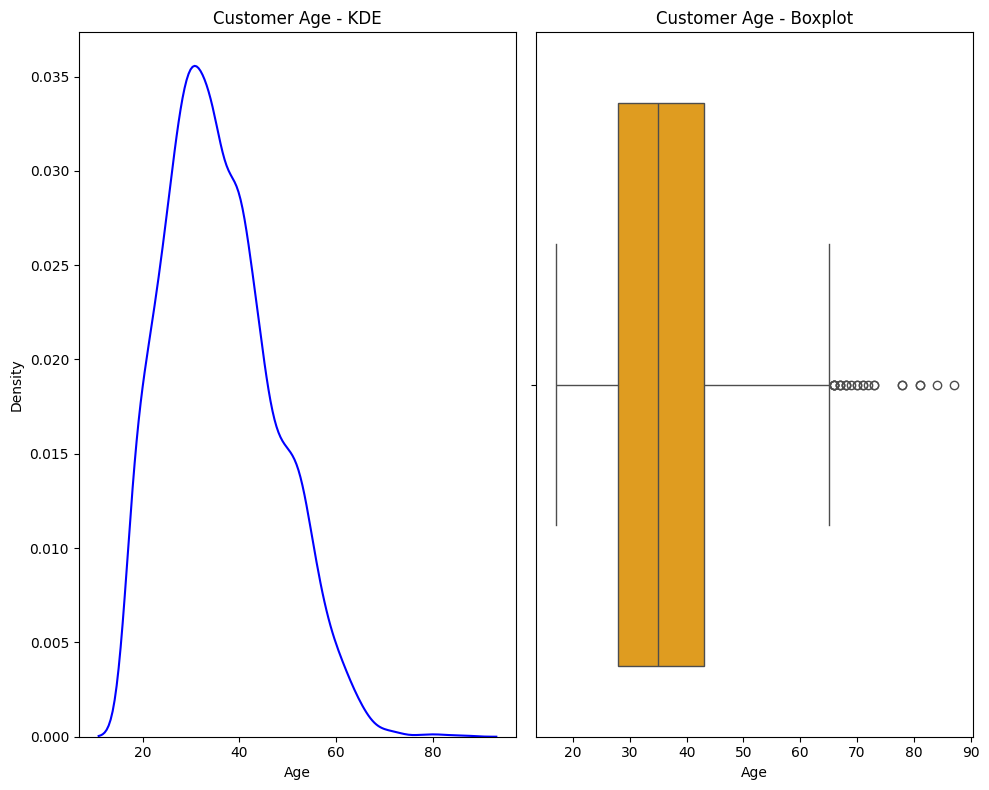

In [137]:
# Customer Age Analysis

# Calculate and print the average customer age
avg_age = round(sales['Customer_Age'].mean(), 2)
print("Average Customer Age:", avg_age)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# Plot KDE (Density Curve) of Customer Age
sns.kdeplot(sales['Customer_Age'], ax=axes[0], color='blue')
axes[0].set_title("Customer Age - KDE")
axes[0].set_xlabel("Age")

# Plot Boxplot of Customer Age
sns.boxplot(x=sales['Customer_Age'], ax=axes[1], color='orange')
axes[1].set_title("Customer Age - Boxplot")
axes[1].set_xlabel("Age")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

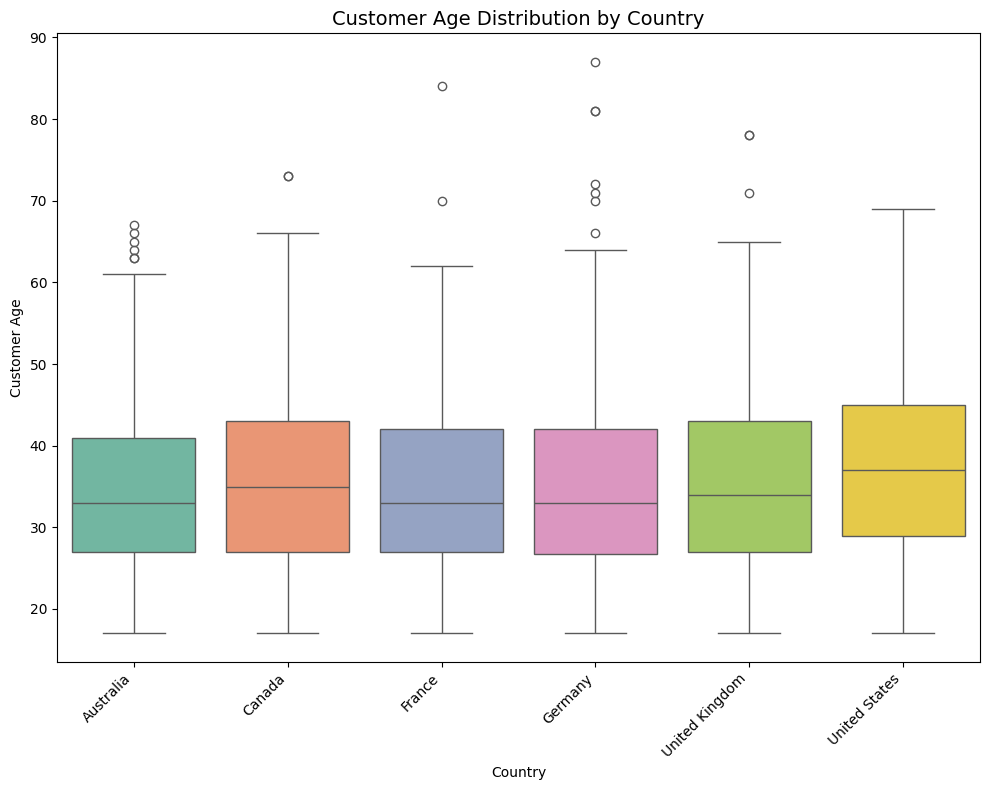

In [138]:
# Customer Age by Country
plt.figure(figsize=(10, 8))
sns.boxplot(x='Country', y='Customer_Age', data=sales, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title("Customer Age Distribution by Country", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Customer Age")
plt.tight_layout()
plt.show()

Customer_Gender
M    2563
F    2436
Name: count, dtype: int64
Gender with most sales: M


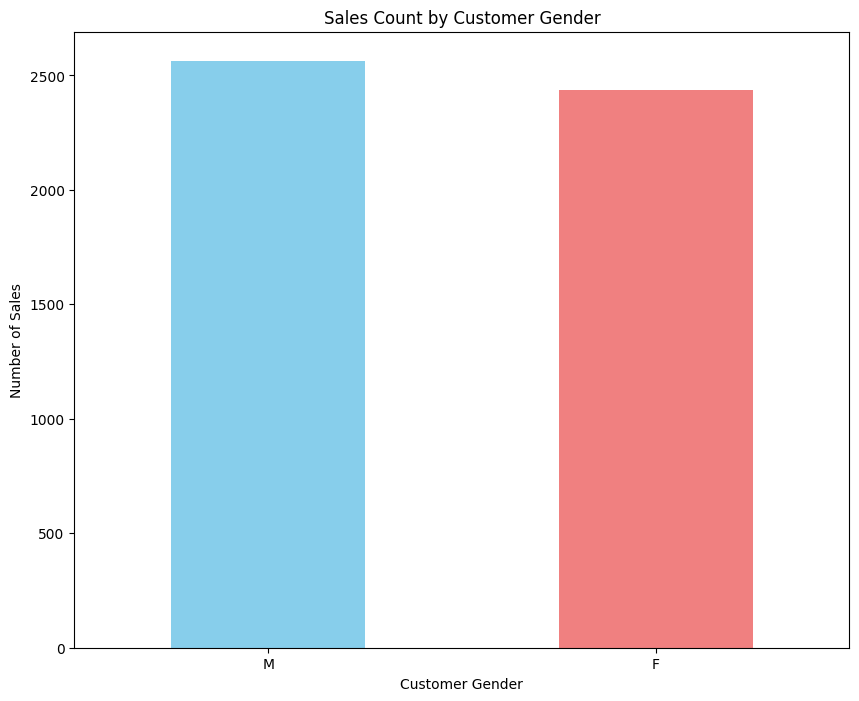

In [139]:
# Which gender has the most amount of sales?
# Calculate sales count by gender
counts = sales['Customer_Gender'].value_counts()

# Print the counts and the gender with the most sales
print(counts)
print("Gender with most sales:", counts.idxmax())

# Plot a bar chart to show sales distribution by gender
plt.figure(figsize=(10, 8))
counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Sales Count by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.show()

In [140]:
# Count of Sales with Revenue > 500 by Male Customers
high_value_male_sales = sales[(sales['Revenue'] > 500) & (sales['Customer_Gender'] == 'M')].shape[0]
print("High-value male sales (Revenue > 500):", high_value_male_sales)

High-value male sales (Revenue > 500): 994


Age_Group         17-24   25-34   35-44   45-54     55+
Customer_Gender                                        
F                291959  644421  627934  255483  120720
M                263825  686970  624460  258249   87554


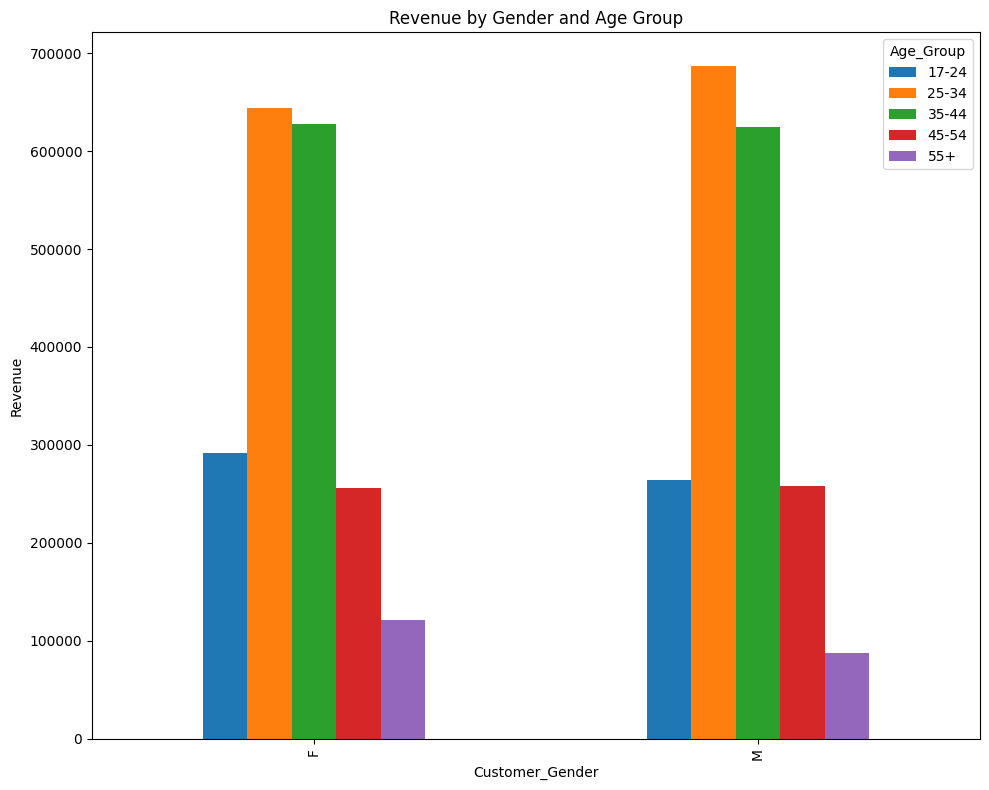

In [141]:
# Total Revenue by Gender and Age Group
age_gender_sales = sales.groupby(['Customer_Gender', 'Age_Group'])['Revenue'].sum().unstack()
print(age_gender_sales)

ax = age_gender_sales.plot(kind='bar', figsize=(10, 8), title='Revenue by Gender and Age Group')
ax.set_ylabel('Revenue')
plt.tight_layout()
plt.show()

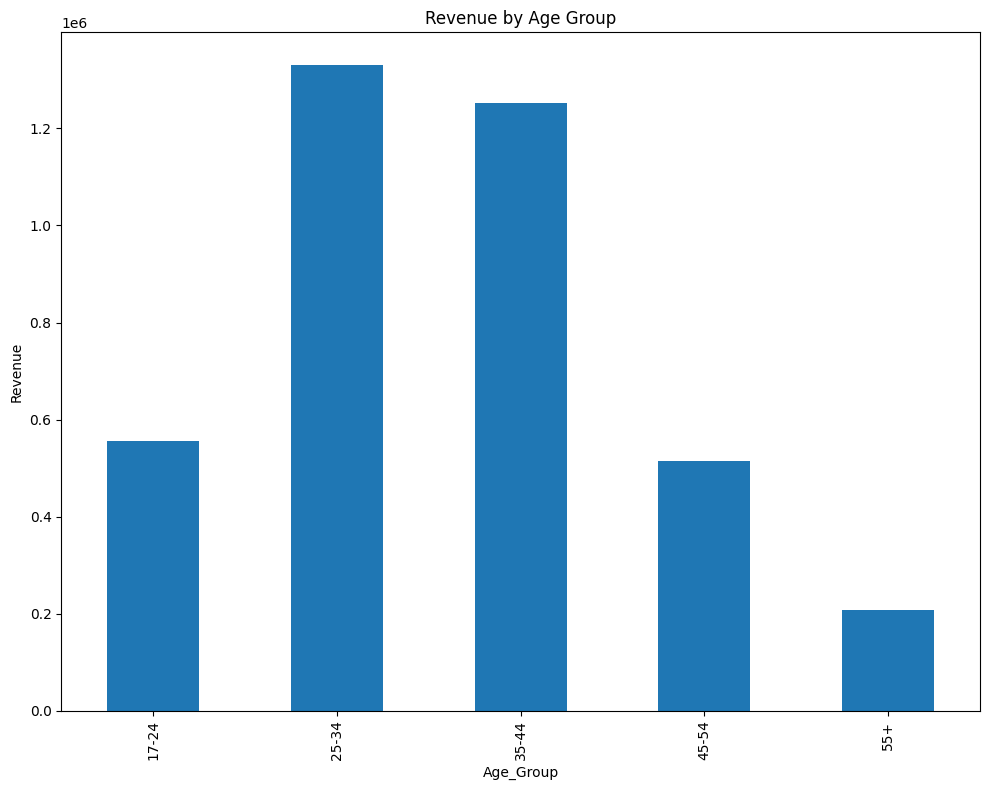

In [142]:
# Total Revenue by Age Group
plt.figure(figsize=(10, 8))
sales.groupby('Age_Group')['Revenue'].sum().plot(kind='bar', title='Revenue by Age Group')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

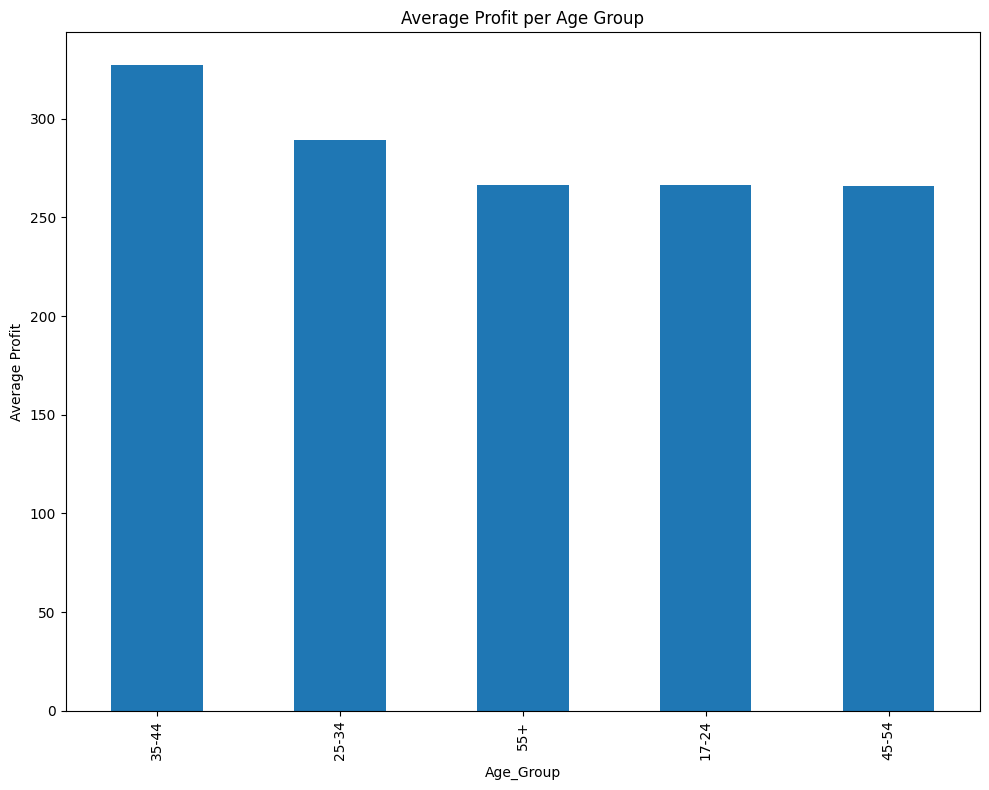

In [143]:
# Average Profit by Age Group
plt.figure(figsize=(10, 8))
profit_by_age = sales.groupby('Age_Group')['Profit'].mean().sort_values(ascending=False)
profit_by_age.plot(kind='bar', title='Average Profit per Age Group')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

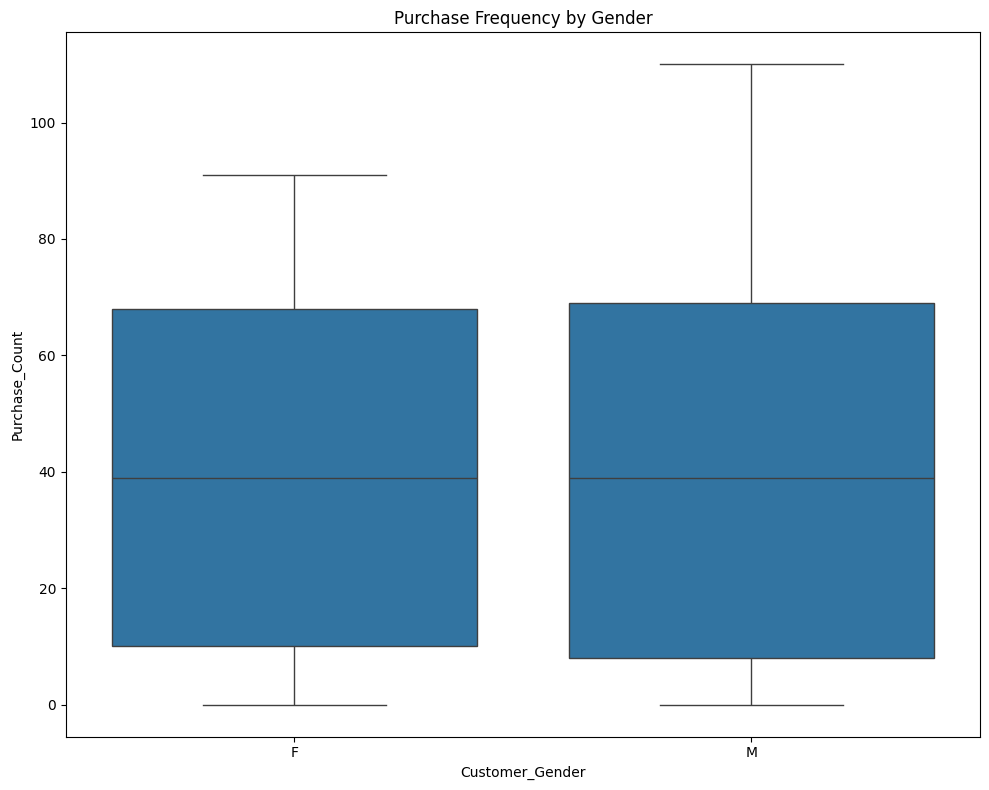

In [144]:
# Purchase Frequency by Gender
plt.figure(figsize=(10, 8))
purchase_freq = sales.groupby(['Customer_Age', 'Customer_Gender']).size().reset_index(name='Purchase_Count')
sns.boxplot(data=purchase_freq, x='Customer_Gender', y='Purchase_Count')
plt.title('Purchase Frequency by Gender')
plt.tight_layout()
plt.show()

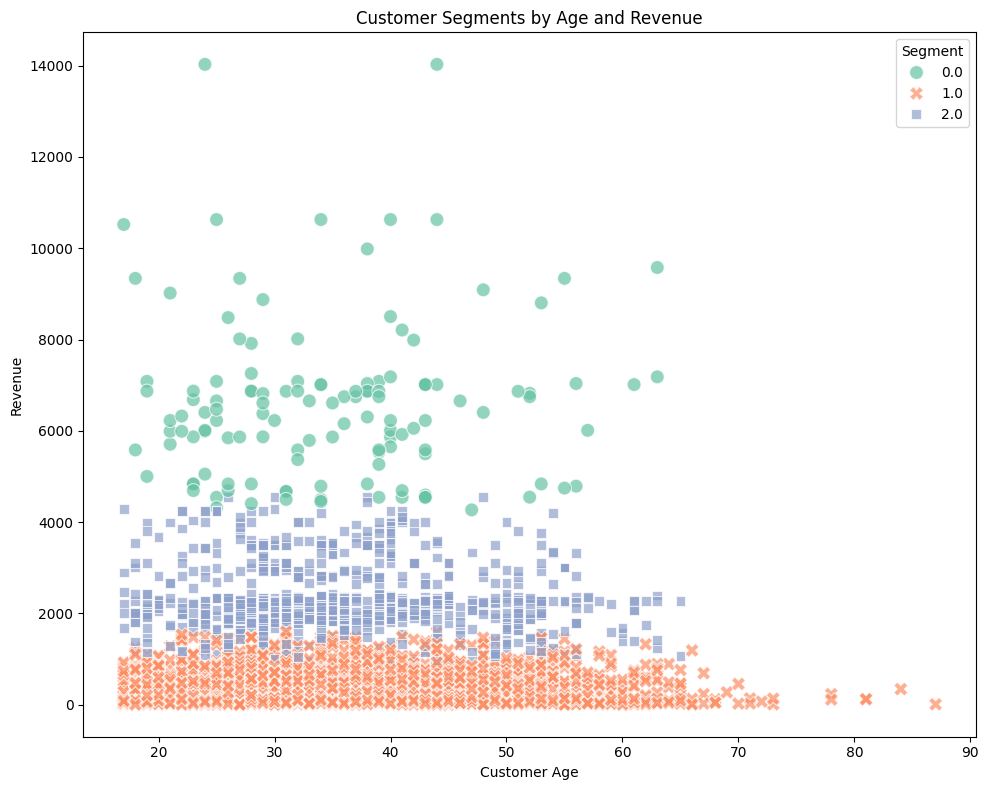

In [145]:
# Customer Segmentation using K-Means (based on Age, Revenue, and Profit)
# Customer Segments by Age and Revenue (Profit included in clustering)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=sales.dropna(subset=['Customer_Segment']),
    x='Customer_Age',
    y='Revenue',
    hue='Customer_Segment',
    palette='Set2',
    style='Customer_Segment',
    s=100,
    alpha=0.7
)
plt.title('Customer Segments by Age and Revenue')
plt.xlabel('Customer Age')
plt.ylabel('Revenue')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

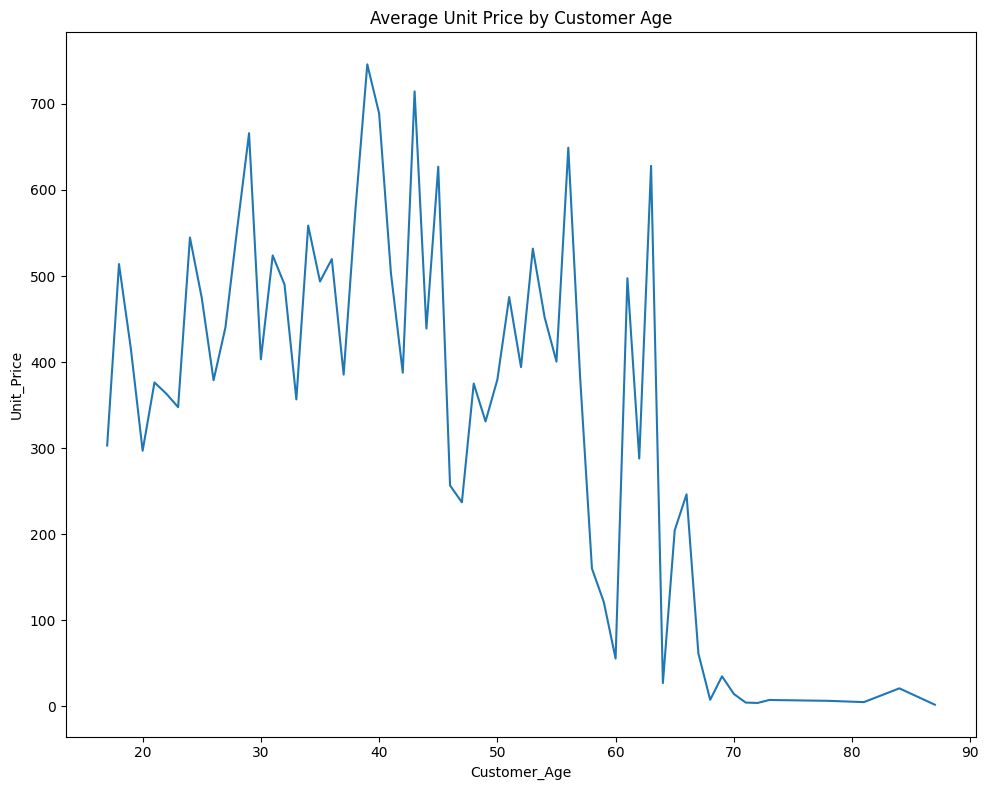

In [146]:
# Average Unit Price by Customer Age
plt.figure(figsize=(10, 8))
age_price = sales.groupby('Customer_Age')['Unit_Price'].mean().reset_index()
sns.lineplot(data=age_price, x='Customer_Age', y='Unit_Price')
plt.title('Average Unit Price by Customer Age')
plt.tight_layout()
plt.show()

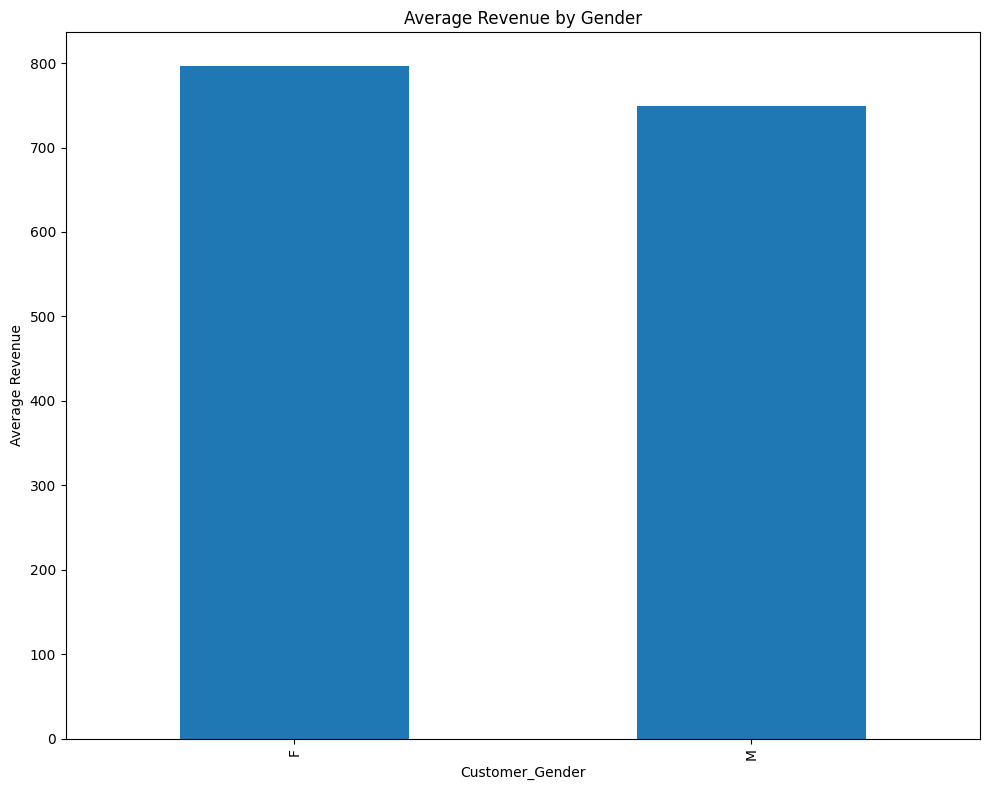

In [147]:
# Average Revenue by Gender
plt.figure(figsize=(10, 8))
gender_rev = sales.groupby('Customer_Gender')['Revenue'].mean()
gender_rev.plot(kind='bar', title='Average Revenue by Gender')
plt.ylabel('Average Revenue')
plt.tight_layout()
plt.show()

  Age_Group                Product  Order_Quantity
0     17-24    Patch Kit/8 Patches            1466
1     25-34  Water Bottle - 30 oz.            2857
2     35-44  Water Bottle - 30 oz.            2172
3     45-54  Water Bottle - 30 oz.            1212
4       55+    Patch Kit/8 Patches             559


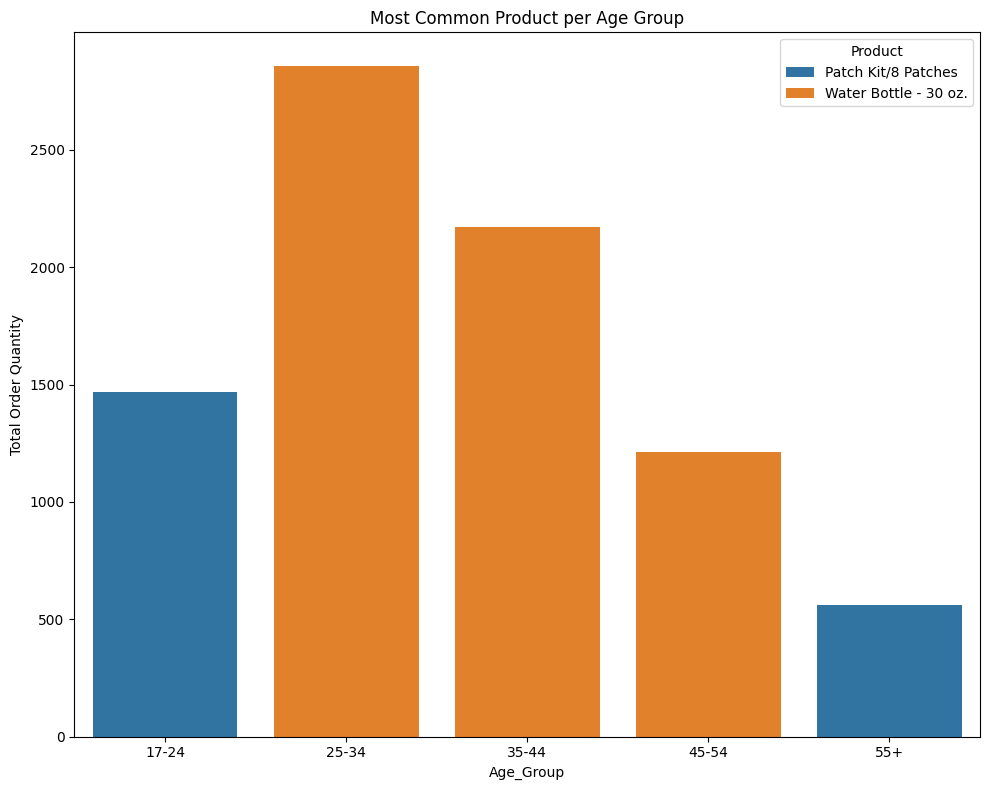

In [148]:
# Find and plot the single most common product per Age Group based on total order quantity
most_common_product = sales.groupby(['Age_Group', 'Product'], observed=False)['Order_Quantity'].sum().reset_index()
most_common_product = most_common_product.sort_values(['Age_Group', 'Order_Quantity'], ascending=[True, False])
top_products_per_group = most_common_product.groupby('Age_Group').first().reset_index()
print(top_products_per_group)
plt.figure(figsize=(10, 8))
sns.barplot(data=top_products_per_group, x='Age_Group', y='Order_Quantity', hue='Product')
plt.title('Most Common Product per Age Group')
plt.ylabel('Total Order Quantity')
plt.tight_layout()
plt.show()

    Age_Group                Product  Order_Quantity
52      17-24    Patch Kit/8 Patches            1466
126     17-24  Water Bottle - 30 oz.             849
103     17-24      Touring Tire Tube             767
256     25-34  Water Bottle - 30 oz.            2857
182     25-34    Patch Kit/8 Patches            1881
153     25-34     Mountain Tire Tube            1698
386     35-44  Water Bottle - 30 oz.            2172
312     35-44    Patch Kit/8 Patches            1547
283     35-44     Mountain Tire Tube            1242
516     45-54  Water Bottle - 30 oz.            1212
442     45-54    Patch Kit/8 Patches            1095
413     45-54     Mountain Tire Tube             632
572       55+    Patch Kit/8 Patches             559
543       55+     Mountain Tire Tube             308
646       55+  Water Bottle - 30 oz.             304


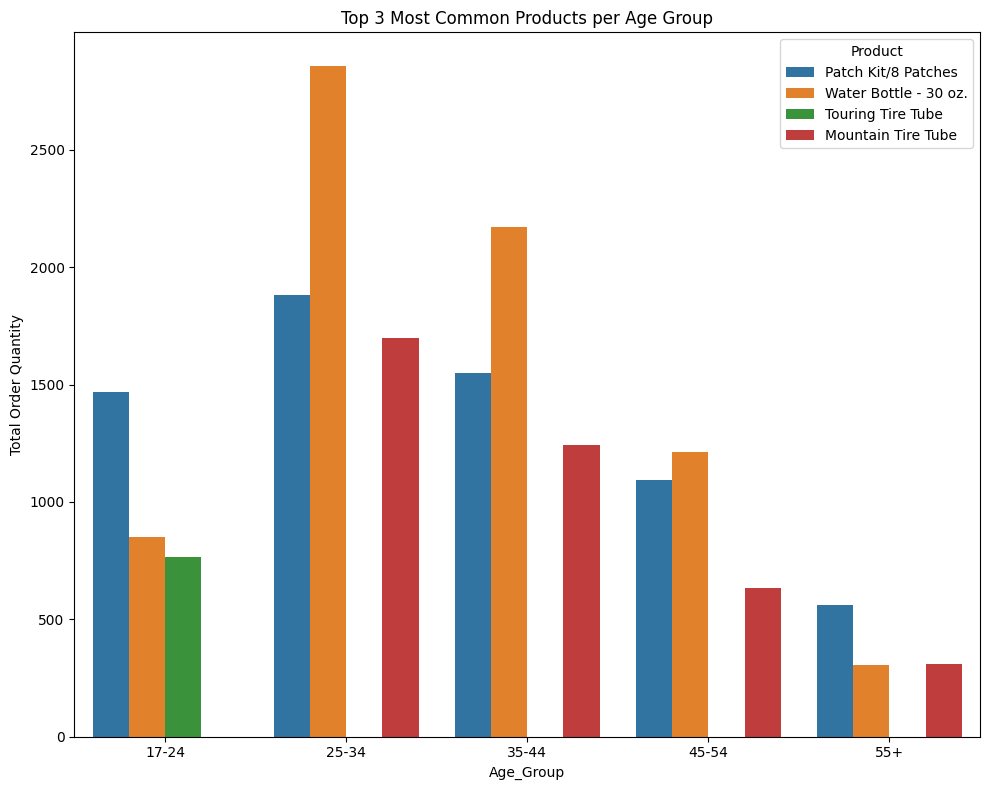

In [149]:
# Find and plot the top 3 most common products per Age Group based on total order quantity
most_common_product = sales.groupby(['Age_Group', 'Product'], observed=False)['Order_Quantity'].sum().reset_index()
most_common_product = most_common_product.sort_values(['Age_Group', 'Order_Quantity'], ascending=[True, False])

top_n_products = most_common_product.groupby('Age_Group').head(3)

print(top_n_products)
plt.figure(figsize=(10, 8))
sns.barplot(data=top_n_products, x='Age_Group', y='Order_Quantity', hue='Product')
plt.title('Top 3 Most Common Products per Age Group')
plt.ylabel('Total Order Quantity')
plt.tight_layout()
plt.show()

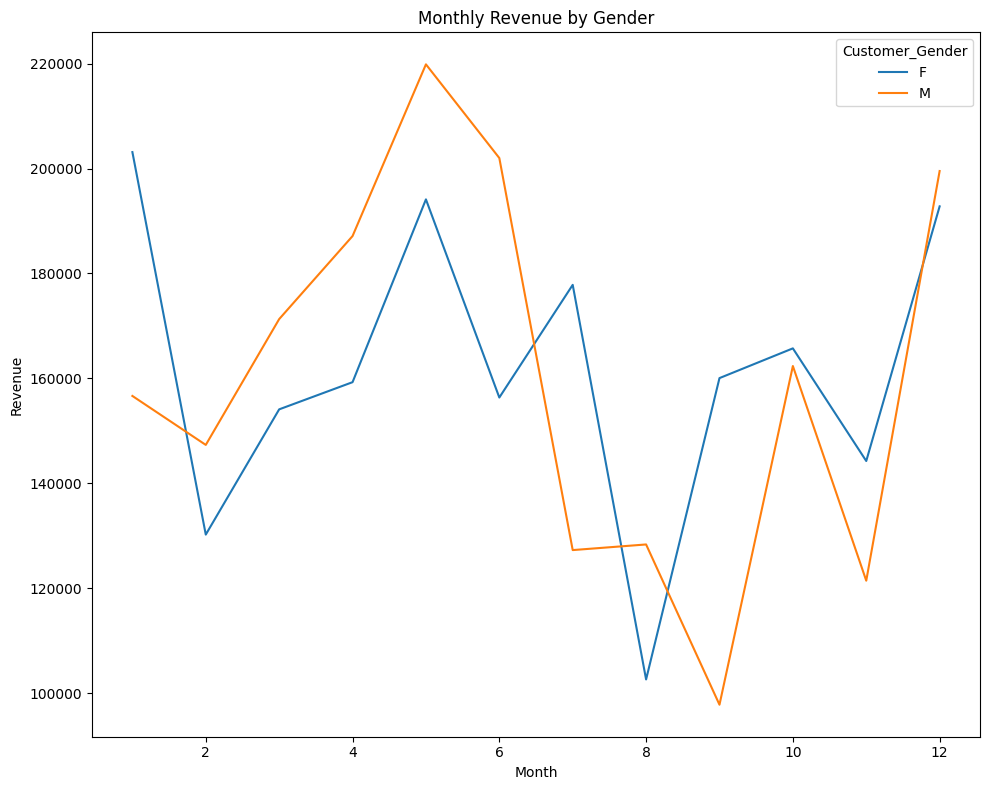

In [150]:
# Plot Monthly Revenue Trends by Customer Gender
monthly_gender_sales = sales.groupby(['Month', 'Customer_Gender'], observed=False)['Revenue'].sum().unstack()
monthly_gender_sales.plot(kind='line', title='Monthly Revenue by Gender', figsize=(10, 8))
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

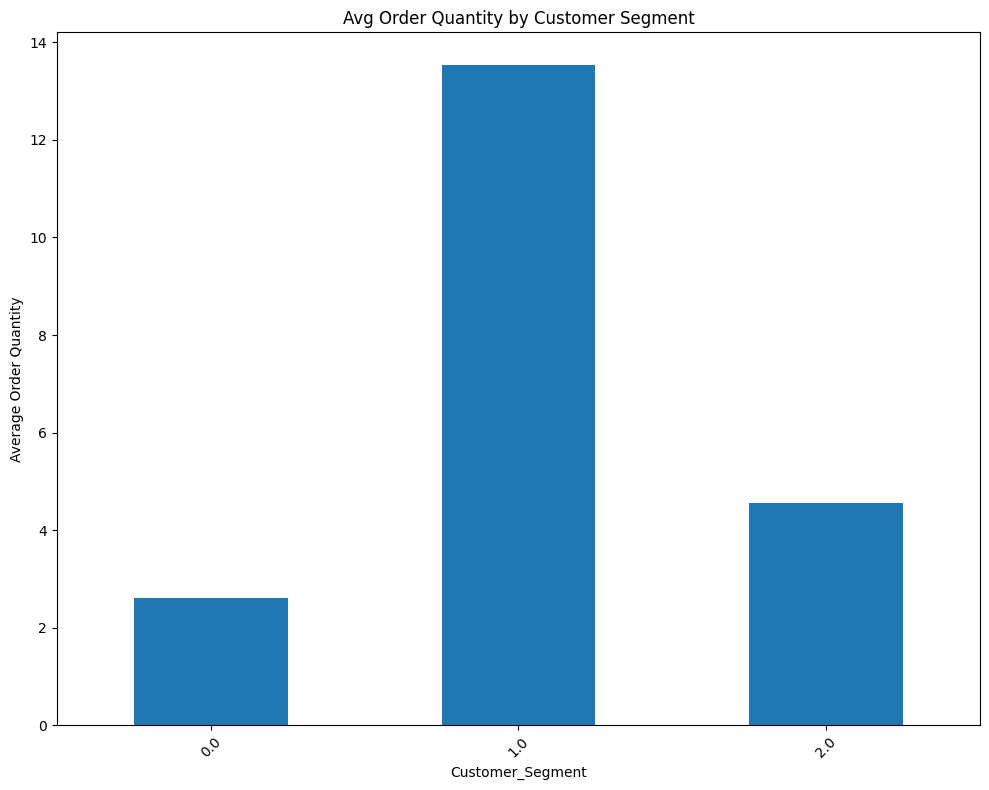

In [151]:
# Average Order Quantity per Customer Segment
plt.figure(figsize=(10, 8))
sales.groupby('Customer_Segment')['Order_Quantity'].mean().plot(kind='bar', title='Avg Order Quantity by Customer Segment')
plt.ylabel('Average Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Order Analysis
This section focuses on analyzing order quantities, distribution across Countries, and variations in ordering patterns among different customer segments and product categories. The insights help identify trends and opportunities to optimize inventory management and sales strategies.

Mean Order Quantity: 11.822164432886577


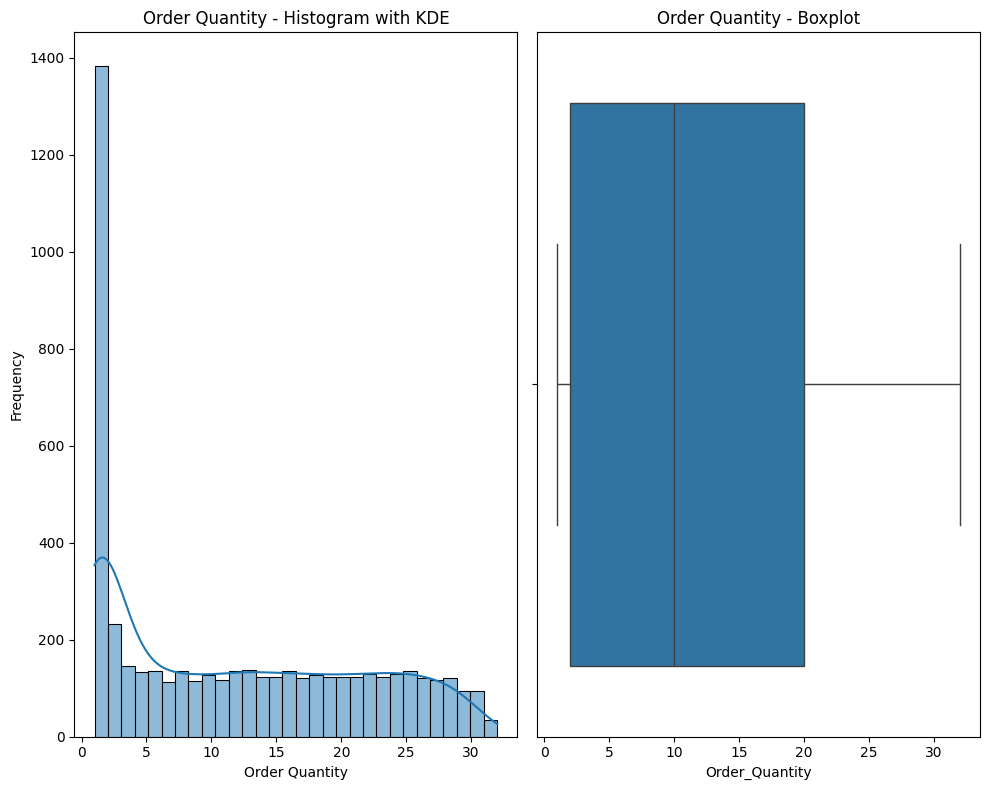

In [152]:
# What's the mean of Order Quantity?
mean_order_qty = sales['Order_Quantity'].mean()
print("Mean Order Quantity:", mean_order_qty)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Histogram with KDE
sns.histplot(data=sales, x='Order_Quantity', bins=30, kde=True, ax=axs[0])
axs[0].set_title("Order Quantity - Histogram with KDE")
axs[0].set_xlabel("Order Quantity")
axs[0].set_ylabel("Frequency")

# Boxplot
sns.boxplot(x=sales['Order_Quantity'], ax=axs[1])
axs[1].set_title("Order Quantity - Boxplot")

plt.tight_layout()
plt.show()

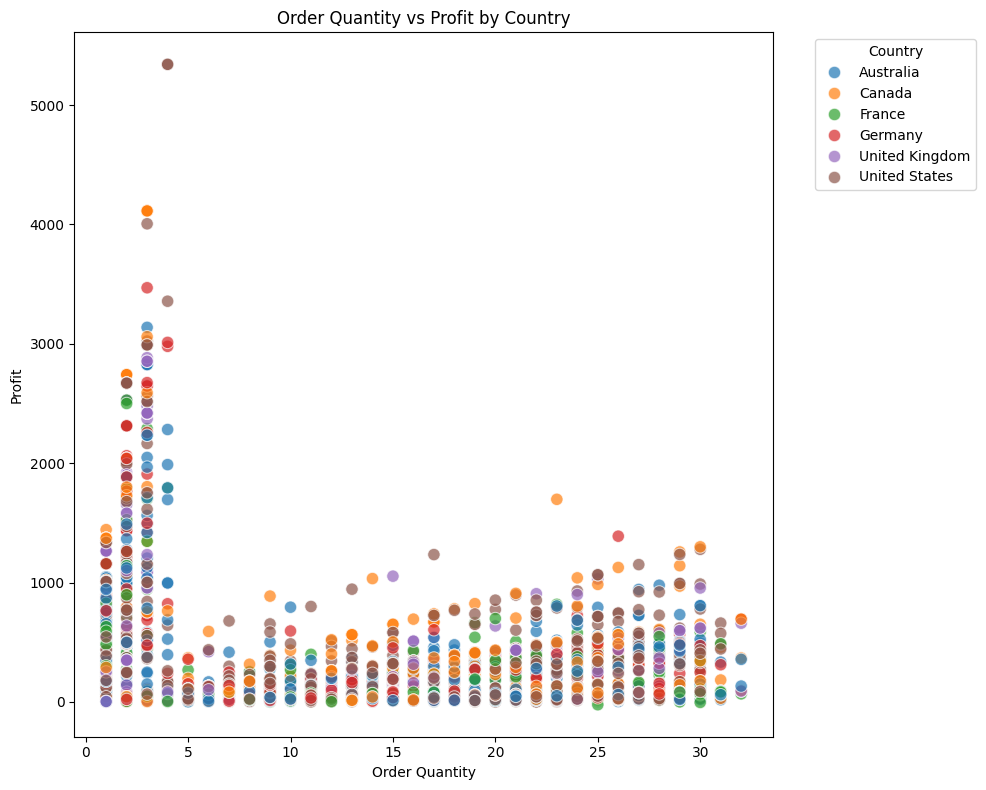

In [153]:
# Relationship between Order Quantity and Profit by Country
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Order_Quantity',
    y='Profit',
    hue='Country',
    data=sales,
    palette='tab10',   # Distinct color palette for up to 10 categories
    alpha=0.7,         # Point transparency to reduce overlap
    edgecolor='w',     # White edge around points for better visibility
    s=80               # Size of the points
)
plt.title('Order Quantity vs Profit by Country')
plt.xlabel('Order Quantity')
plt.ylabel('Profit')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [154]:
# Count of orders made in Canada or France
count_canada_france = sales[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]
print("Number of orders from Canada or France:", count_canada_france)

Number of orders from Canada or France: 1146


In [155]:
# Number of Bike Racks orders from Canada
bike_racks_canada = sales[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]
print("Number of Bike Racks orders from Canada:", bike_racks_canada)

Number of Bike Racks orders from Canada: 3


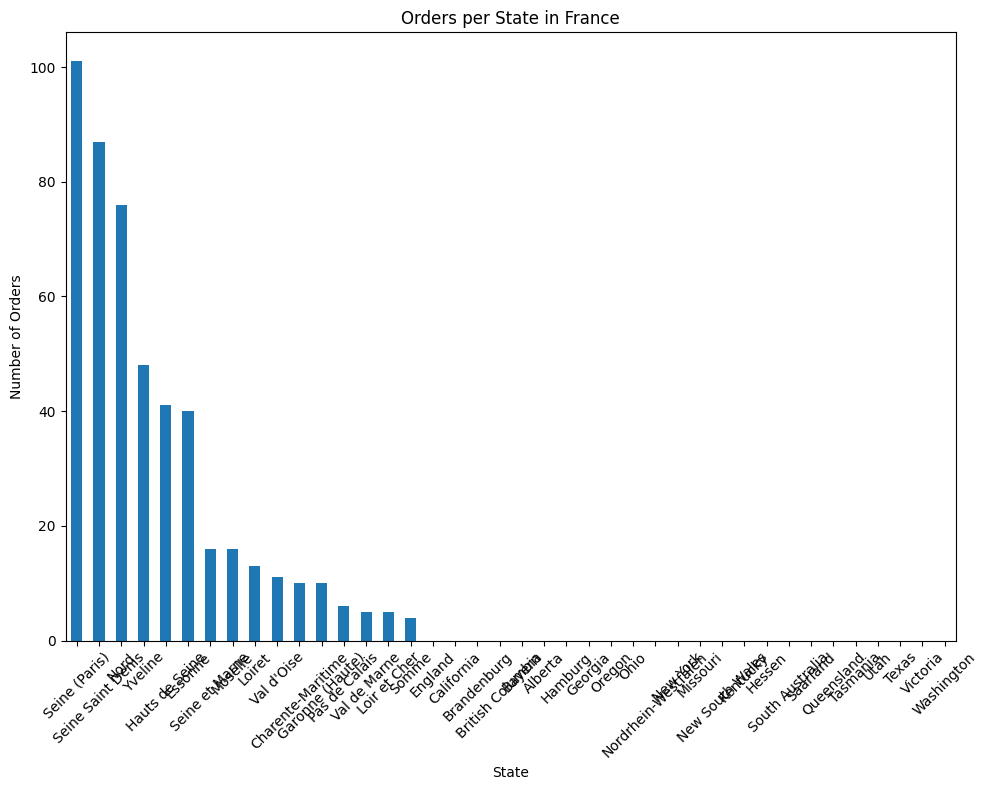

In [156]:
# Orders per State in France
france_states = sales[sales['Country'] == 'France']['State'].value_counts()

plt.figure(figsize=(10, 8))
france_states.plot(kind='bar', title='Orders per State in France')
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

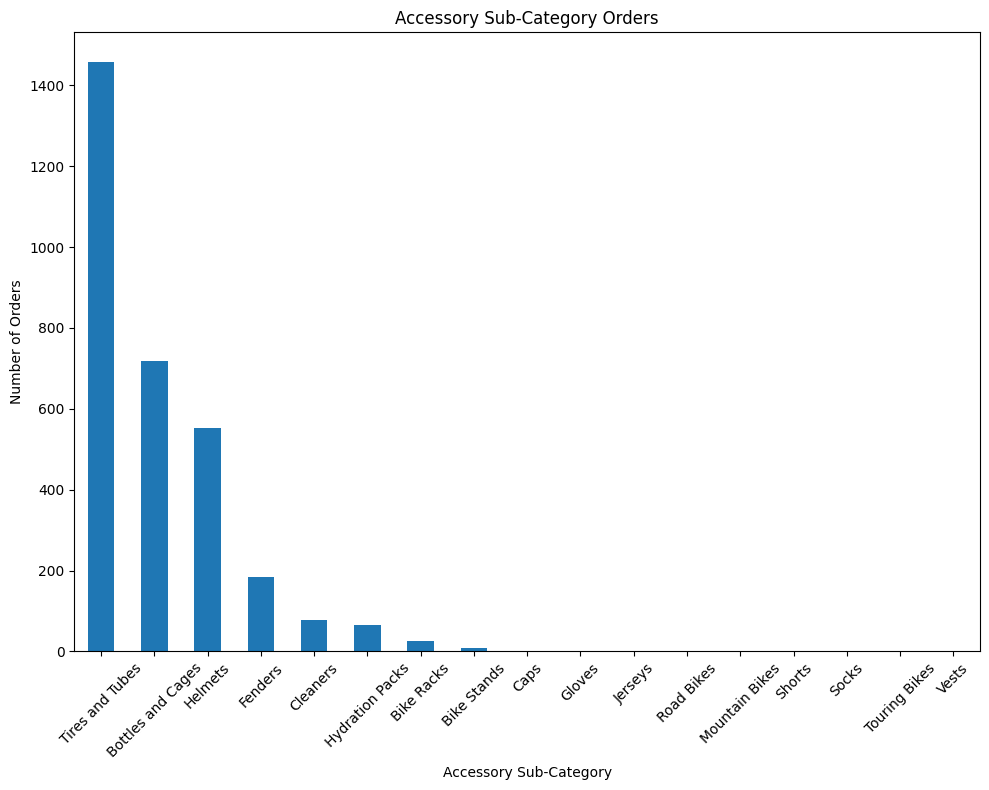

In [157]:
# Orders per Accessory Sub-Category
accessory_sales = sales[sales['Product_Category'] == 'Accessories']['Sub_Category'].value_counts()
plt.figure(figsize=(10, 8))
accessory_sales.plot(kind='bar', title='Accessory Sub-Category Orders')
plt.xlabel("Accessory Sub-Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

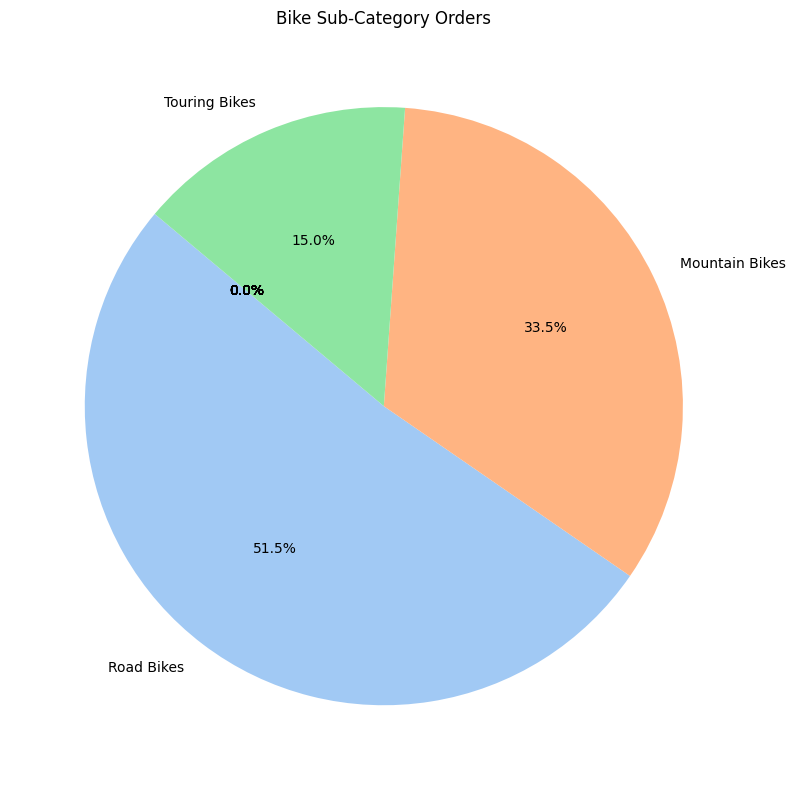

In [158]:
# Orders per Bike Sub-Category
bike_sales = sales[sales['Product_Category'] == 'Bikes']['Sub_Category'].value_counts()

plt.figure(figsize=(10, 8))
bike_sales.plot.pie(
    autopct='%1.1f%%',
    title='Bike Sub-Category Orders',
    startangle=140,     # Rotate start angle for better slice positioning
    colors=sns.color_palette('pastel')  # Use pastel color palette for nicer colors
)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [159]:
# Mean Order Quantity for orders with revenue > 10K
mean_high_revenue_orders = sales[sales['Revenue'] > 10000]['Order_Quantity'].mean()
print("Mean Order Quantity for orders with revenue > 10K:", mean_high_revenue_orders)

Mean Order Quantity for orders with revenue > 10K: 3.2857142857142856


In [160]:
# Mean Order Quantity for orders with revenue < 10K
mean_low_revenue_orders = sales[sales['Revenue'] < 10000]['Order_Quantity'].mean()
print("Mean Order Quantity for orders with revenue < 10K:", mean_low_revenue_orders)

Mean Order Quantity for orders with revenue < 10K: 11.834134615384615


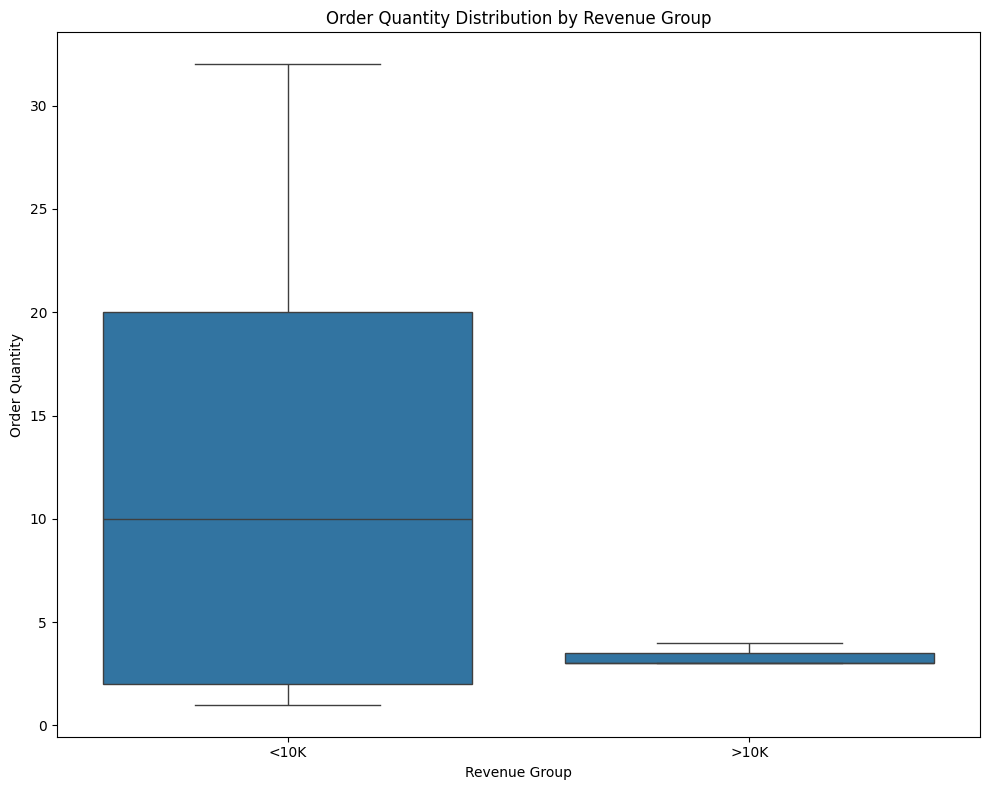

In [161]:
# Distribution of Order Quantity for Revenue Groups (>10K vs <10K)
sales['Revenue_Group'] = np.where(sales['Revenue'] > 10000, '>10K', '<10K')

plt.figure(figsize=(10, 8))
sns.boxplot(x='Revenue_Group', y='Order_Quantity', data=sales)
plt.title('Order Quantity Distribution by Revenue Group')
plt.xlabel('Revenue Group')
plt.ylabel('Order Quantity')
plt.tight_layout()
plt.show()

In [162]:
# Orders made in May 2016
may_2016_orders = sales[(sales['Date'].dt.year == 2016) & (sales['Date'].dt.month == 5)].shape[0]
print("Number of orders made in May 2016:", may_2016_orders)

Number of orders made in May 2016: 214


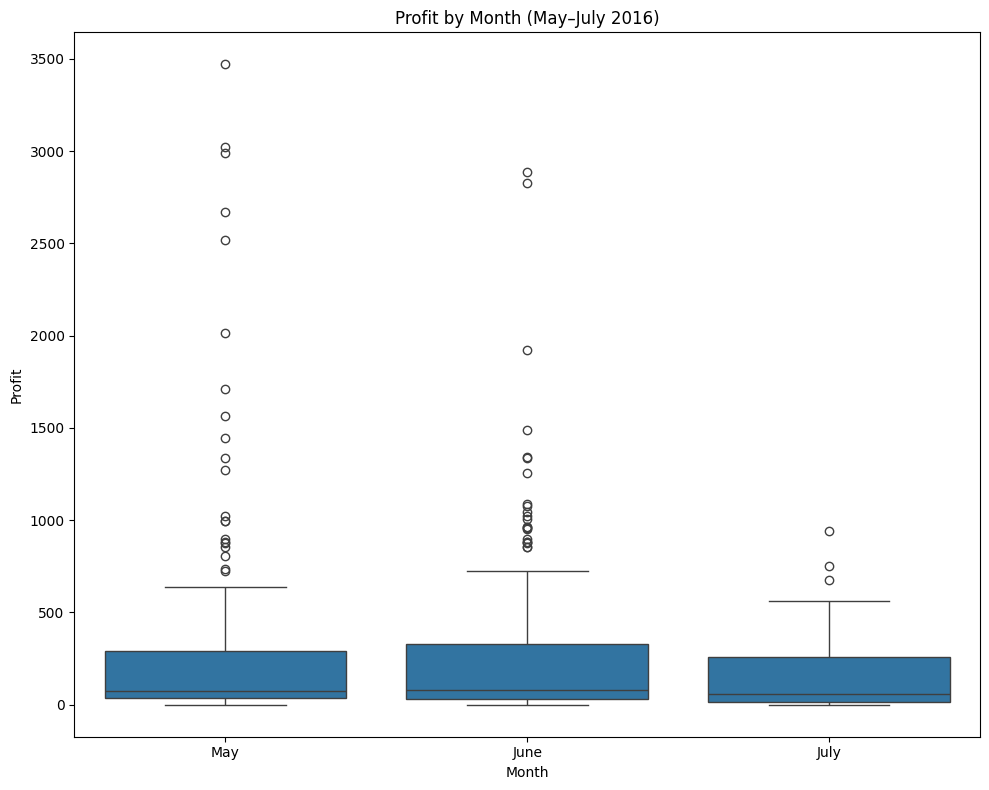

In [163]:
# Orders made between May and July 2016
mask = (sales['Date'] >= '2016-05-01') & (sales['Date'] <= '2016-07-31')

# Define correct month order
month_order = ['May', 'June', 'July']
sales['Month_Name'] = pd.Categorical(sales['Month_Name'], categories=month_order, ordered=True)

# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Month_Name', y='Profit', data=sales[mask])
plt.title('Profit by Month (May–July 2016)')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

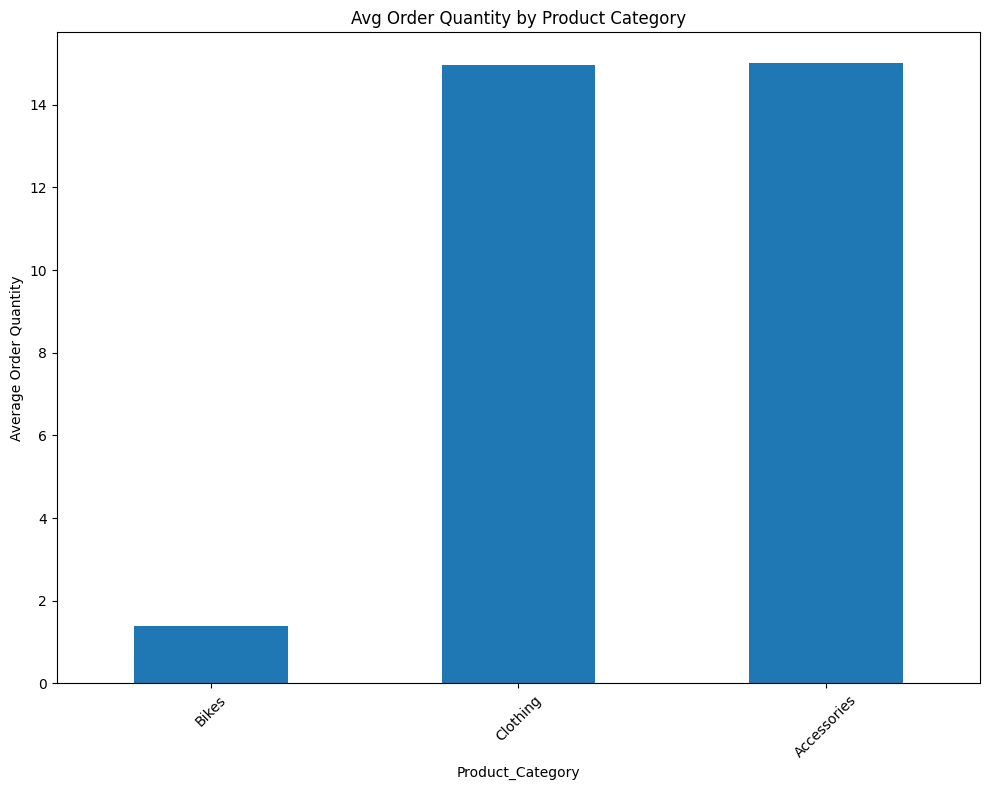

In [164]:
# Average Order Quantity per Product Category (sorted)
plt.figure(figsize=(10, 8))
sales.groupby('Product_Category')['Order_Quantity'].mean().sort_values().plot(
    kind='bar',
    title='Avg Order Quantity by Product Category'
)
plt.ylabel('Average Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

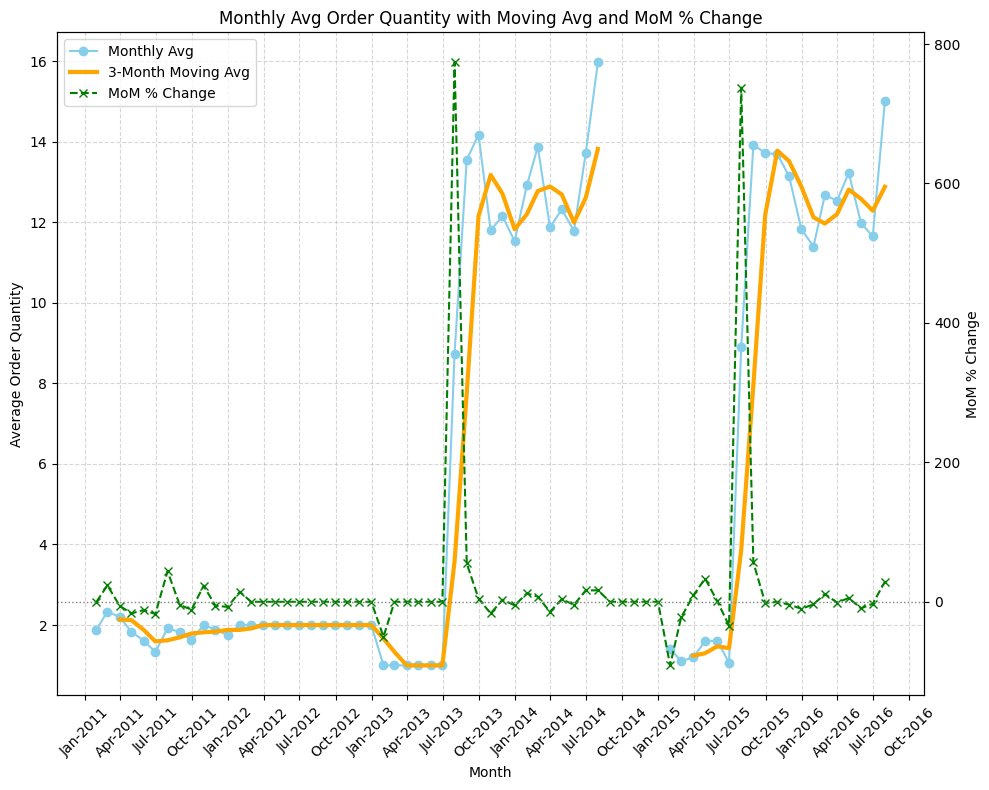

In [165]:
# Monthly Trend of Average Order Quantity
# Calculate monthly average order quantity
monthly_qty = sales.set_index('Date').resample('M')['Order_Quantity'].mean()

# Calculate 3-month moving average
moving_avg = monthly_qty.rolling(window=3).mean()

# Calculate Month-over-Month percentage change and drop NaN
monthly_change = monthly_qty.pct_change() * 100
monthly_change = monthly_change.fillna(0)  # أو monthly_change.dropna()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 8))

# Primary axis: monthly average and moving average
ax1.plot(monthly_qty.index, monthly_qty.values, label='Monthly Avg', marker='o', linestyle='-', color='skyblue')
ax1.plot(moving_avg.index, moving_avg.values, label='3-Month Moving Avg', color='orange', linewidth=3)
ax1.set_ylabel('Average Order Quantity')
ax1.set_xlabel('Month')
ax1.set_title('Monthly Avg Order Quantity with Moving Avg and MoM % Change')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.5)

# Secondary axis: Month-over-Month percentage change
ax2 = ax1.twinx()
ax2.plot(monthly_change.index, monthly_change.values, label='MoM % Change', color='green', linestyle='--', marker='x')
ax2.set_ylabel('MoM % Change')
ax2.axhline(0, color='gray', linewidth=1, linestyle=':')  # Zero line for reference
ax2.grid(False)

# Format x-axis dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

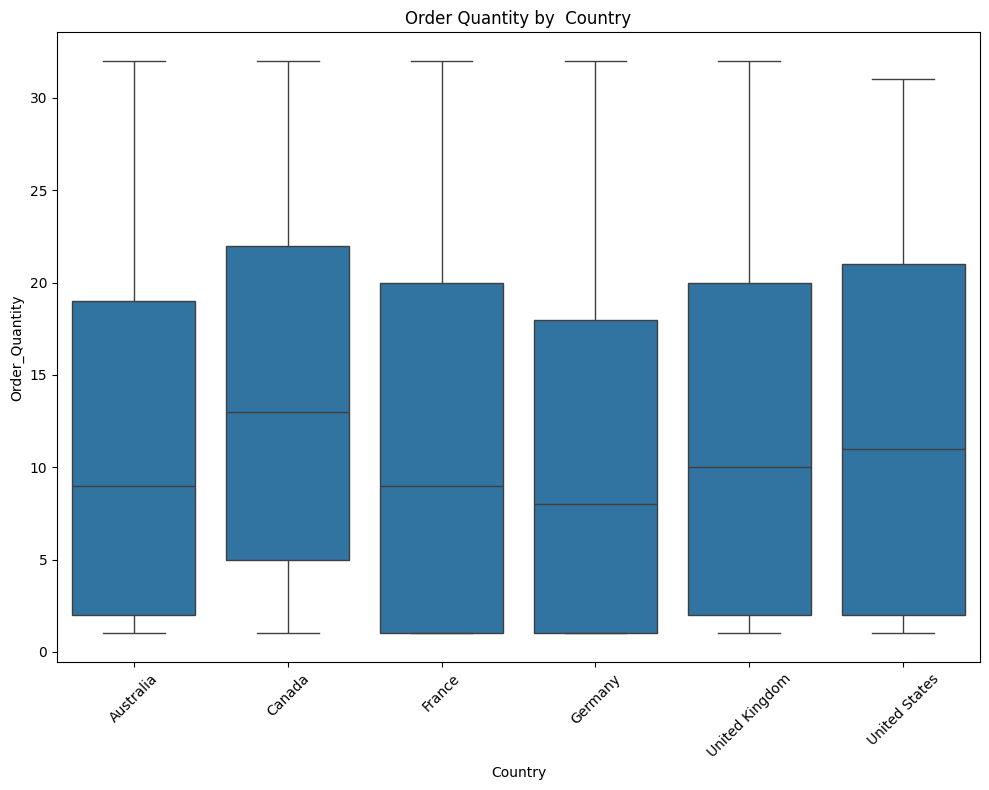

In [166]:
# Boxplot of Order Quantity by Country
plt.figure(figsize=(10, 8))
sns.boxplot(x='Country', y='Order_Quantity', data=sales)
plt.title('Order Quantity by  Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

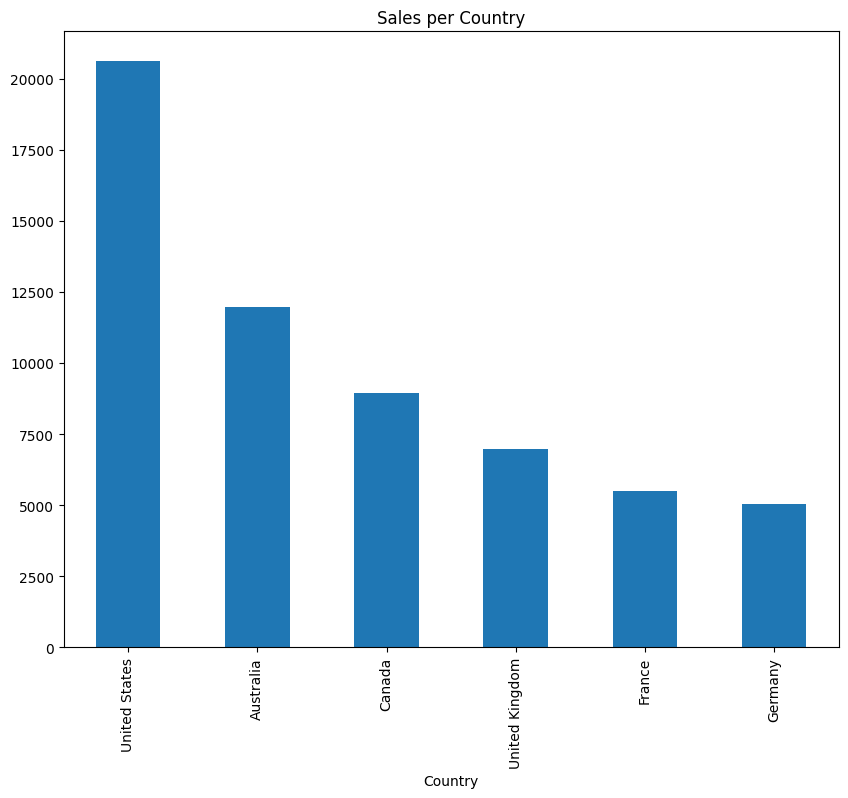

In [167]:
# Which country has the most sales quantity of sales?
#Top Countries by Sales Quantity
country_sales = sales.groupby('Country')['Order_Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
country_sales.plot(kind='bar', title='Sales per Country')
plt.show()

List of unique products sold:
['Fender Set - Mountain' 'Classic Vest, L' 'Touring-1000 Yellow, 54'
 'LL Road Tire' 'Mountain Tire Tube' 'Road Bottle Cage'
 'Patch Kit/8 Patches' 'Road-150 Red, 62' 'Road Tire Tube'
 'Road-650 Black, 62' 'Mountain-100 Silver, 48' 'Hydration Pack - 70 oz.'
 'Water Bottle - 30 oz.' 'Road-550-W Yellow, 42' 'Road-150 Red, 56'
 'Road-250 Black, 44' 'Mountain-200 Black, 46' 'Road-250 Black, 52'
 'Sport-100 Helmet, Black' 'Mountain-200 Silver, 38' 'Road-750 Black, 44'
 'Long-Sleeve Logo Jersey, S' 'ML Mountain Tire' 'Mountain-200 Black, 38'
 'Sport-100 Helmet, Blue' 'Long-Sleeve Logo Jersey, M' 'Road-150 Red, 48'
 'Long-Sleeve Logo Jersey, XL' 'Sport-100 Helmet, Red'
 "Women's Mountain Shorts, M" 'Touring Tire Tube' 'HL Mountain Tire'
 'Bike Wash - Dissolver' 'Road-250 Red, 44' 'AWC Logo Cap'
 'Mountain-200 Silver, 42' 'Mountain Bottle Cage'
 'Short-Sleeve Classic Jersey, XL' 'Touring Tire' 'Road-550-W Yellow, 44'
 'HL Road Tire' 'Road-750 Black, 52' 'Road-550-

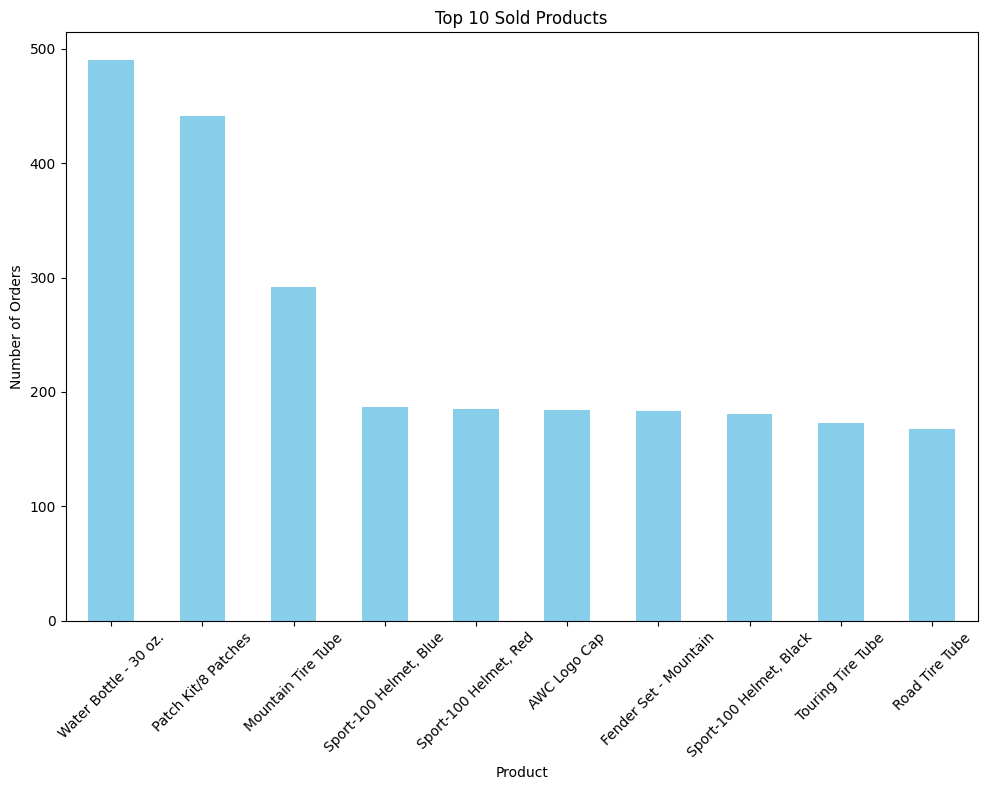

List of unique Sub Categories sold:
['Fenders', 'Vests', 'Touring Bikes', 'Tires and Tubes', 'Bottles and Cages', ..., 'Caps', 'Gloves', 'Socks', 'Bike Racks', 'Bike Stands']
Length: 17
Categories (17, object): ['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps', ..., 'Socks',
                          'Tires and Tubes', 'Touring Bikes', 'Vests']

Total unique Sub Categories sold: 17



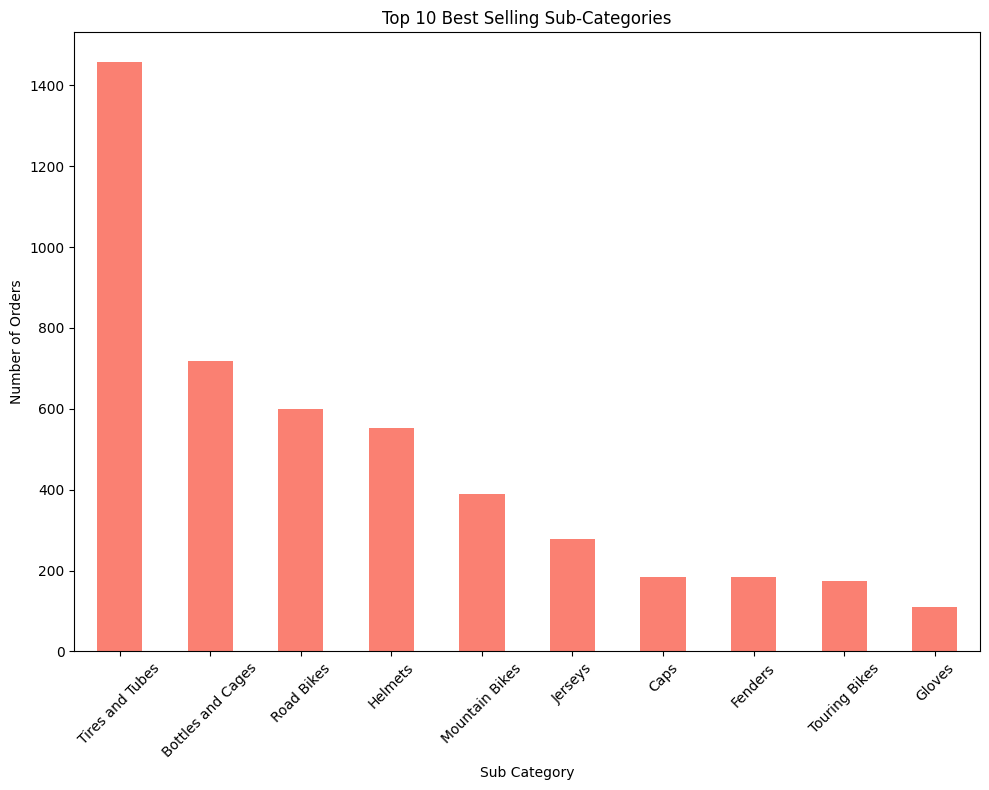

In [168]:
# List and plot unique Products and Sub-Categories sold

# Products
unique_products = sales['Product'].unique()
print("List of unique products sold:")
print(unique_products)
print(f"\nTotal unique products sold: {len(unique_products)}\n")

product_sales = sales['Product'].value_counts().head(10)
product_sales.plot(kind='bar', figsize=(10,8), color='skyblue', title='Top 10 Sold Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sub-Categories
unique_subcat = sales['Sub_Category'].unique()
print("List of unique Sub Categories sold:")
print(unique_subcat)
print(f"\nTotal unique Sub Categories sold: {len(unique_subcat)}\n")

subcat_sales = sales['Sub_Category'].value_counts().head(10)
subcat_sales.plot(kind='bar', figsize=(10,8), color='salmon', title='Top 10 Best Selling Sub-Categories')
plt.xlabel('Sub Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Revenue & Profit Analysis

In this section, we explore the financial performance of the bicycle store through a multi-angle analysis of revenue and profit. We investigate trends over years and months, evaluate product and category profitability, and assess customer purchasing behavior across countries, genders, and weekdays. The goal is to uncover patterns that inform data-driven business strategies.

In [169]:
# In which countries were sales made?
sales['Country'].unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom',
                         'United States']

In [170]:
# Sort sales data by Year (Descending)
sales.sort_values('Year', ascending=False, inplace=True)
sales.head()

Date  Day  Month  Year  Customer_Age Customer_Gender  \
4977 2016-02-10   10      2  2016            35               F   
4    2016-05-16   16      5  2016            35               F   
4972 2016-02-14   14      2  2016            23               F   
6    2016-01-28   28      1  2016            24               M   
4998 2016-01-06    6      1  2016            57               M   

             Country             State Product_Category       Sub_Category  \
4977       Australia          Victoria      Accessories  Bottles and Cages   
4      United States        Washington      Accessories    Tires and Tubes   
4972       Australia          Victoria      Accessories    Tires and Tubes   
6     United Kingdom           England      Accessories  Bottles and Cages   
4998          Canada  British Columbia      Accessories    Tires and Tubes   

      ...    Weekday  Is_Weekend  Season  Profit_per_Unit  Total_Cost  \
4977  ...  Wednesday       False  Winter         1.928571          28   
4     ...     Monday       False  Spring         1.892857          56   
4972  ...     Sunday        True  Winter         0.578947          19   
6     ...   Thursday       False  Winter         5.666667          45   
4998  ...  Wednesday       False  Winter         1.000000          16   

      Order_Value Gross_Profit_Margin Age_Group Customer_Segment  \
4977           70            0.490909     35-44              1.0   
4             140            0.486239     35-44              1.0   
4972           38            0.366667     17-24              1.0   
6             135            0.653846     17-24              1.0   
4998           32            0.500000       55+              1.0   

      Revenue_Group  
4977           <10K  
4              <10K  
4972           <10K  
6              <10K  
4998           <10K  

[5 rows x 28 columns]

In [171]:
# Sorting and Index Reset
sales = sales.sort_values(by='Date', ascending=True).reset_index(drop=True)
sales.head()

Date  Day  Month  Year  Customer_Age Customer_Gender         Country  \
0 2011-01-03    3      1  2011            42               F       Australia   
1 2011-01-09    9      1  2011            17               F          Canada   
2 2011-01-14   14      1  2011            31               F  United Kingdom   
3 2011-01-17   17      1  2011            34               M   United States   
4 2011-01-17   17      1  2011            44               F   United States   

              State Product_Category Sub_Category  ... Weekday  Is_Weekend  \
0          Victoria            Bikes   Road Bikes  ...  Monday       False   
1  British Columbia            Bikes   Road Bikes  ...  Sunday        True   
2           England            Bikes   Road Bikes  ...  Friday       False   
3        California            Bikes   Road Bikes  ...  Monday       False   
4        California            Bikes   Road Bikes  ...  Monday       False   

   Season  Profit_per_Unit  Total_Cost  Order_Value Gross_Profit_Margin  \
0  Winter             83.0         344          540            0.194379   
1  Winter            601.0        1083         1701            0.356888   
2  Winter            174.0         344          540            0.335907   
3  Winter           1335.0        2171         3578            0.380776   
4  Winter           1335.5        8684        14312            0.380864   

  Age_Group Customer_Segment  Revenue_Group  
0     35-44              1.0           <10K  
1     17-24              2.0           <10K  
2     25-34              1.0           <10K  
3     25-34              2.0           <10K  
4     35-44              0.0           >10K  

[5 rows x 28 columns]

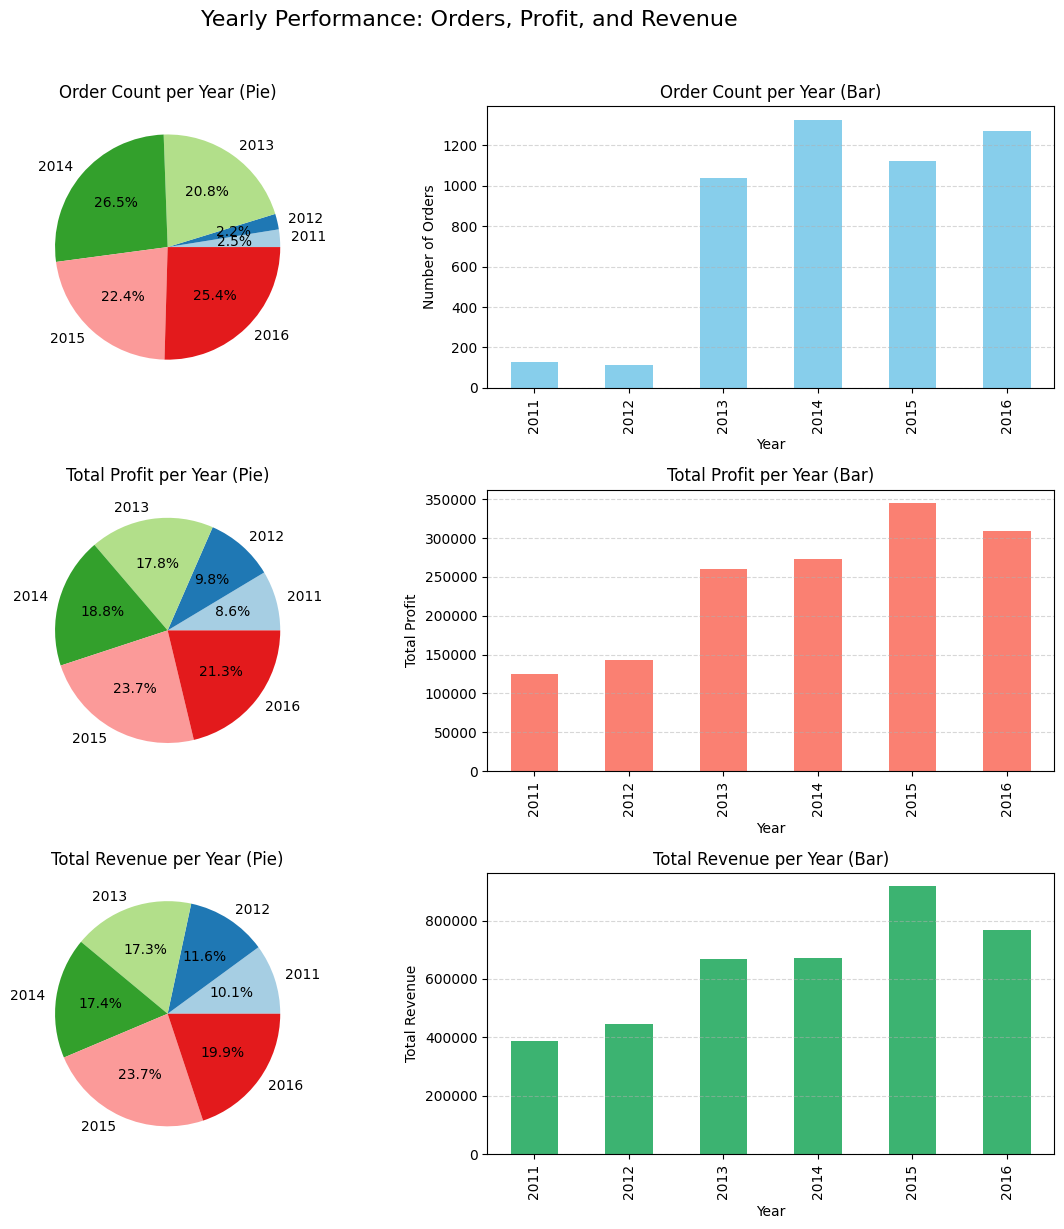

In [172]:
# --- Visual Analysis of Yearly Sales Metrics (Orders, Profit, Revenue) ---
# Count of orders per year
yearly_orders = sales['Year'].value_counts().sort_index()

# Total profit per year
yearly_profit = sales.groupby('Year')['Profit'].sum()

# Total revenue per year
yearly_revenue = sales.groupby('Year')['Revenue'].sum().sort_index()

# --- Create the full figure with subplots ---
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# --- Row 1: Order Counts ---
# Pie chart
yearly_orders.plot.pie(
    ax=axes[0, 0],
    autopct='%1.1f%%',
    title='Order Count per Year (Pie)',
    ylabel='',
    colors=plt.cm.Paired.colors
)
# Bar chart
yearly_orders.plot.bar(
    ax=axes[0, 1],
    title='Order Count per Year (Bar)',
    color='skyblue'
)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Orders')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

# --- Row 2: Profits ---
# Pie chart
yearly_profit.plot.pie(
    ax=axes[1, 0],
    autopct='%1.1f%%',
    title='Total Profit per Year (Pie)',
    ylabel='',
    colors=plt.cm.Paired.colors
)
# Bar chart
yearly_profit.plot.bar(
    ax=axes[1, 1],
    title='Total Profit per Year (Bar)',
    color='salmon'
)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Total Profit')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.5)

# --- Row 3: Revenues ---
# Pie chart
yearly_revenue.plot.pie(
    ax=axes[2, 0],
    autopct='%1.1f%%',
    title='Total Revenue per Year (Pie)',
    ylabel='',
    colors=plt.cm.Paired.colors
)
# Bar chart
yearly_revenue.plot.bar(
    ax=axes[2, 1],
    title='Total Revenue per Year (Bar)',
    color='mediumseagreen'
)
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Total Revenue')
axes[2, 1].grid(axis='y', linestyle='--', alpha=0.5)

# Improve overall appearance
plt.suptitle("Yearly Performance: Orders, Profit, and Revenue", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

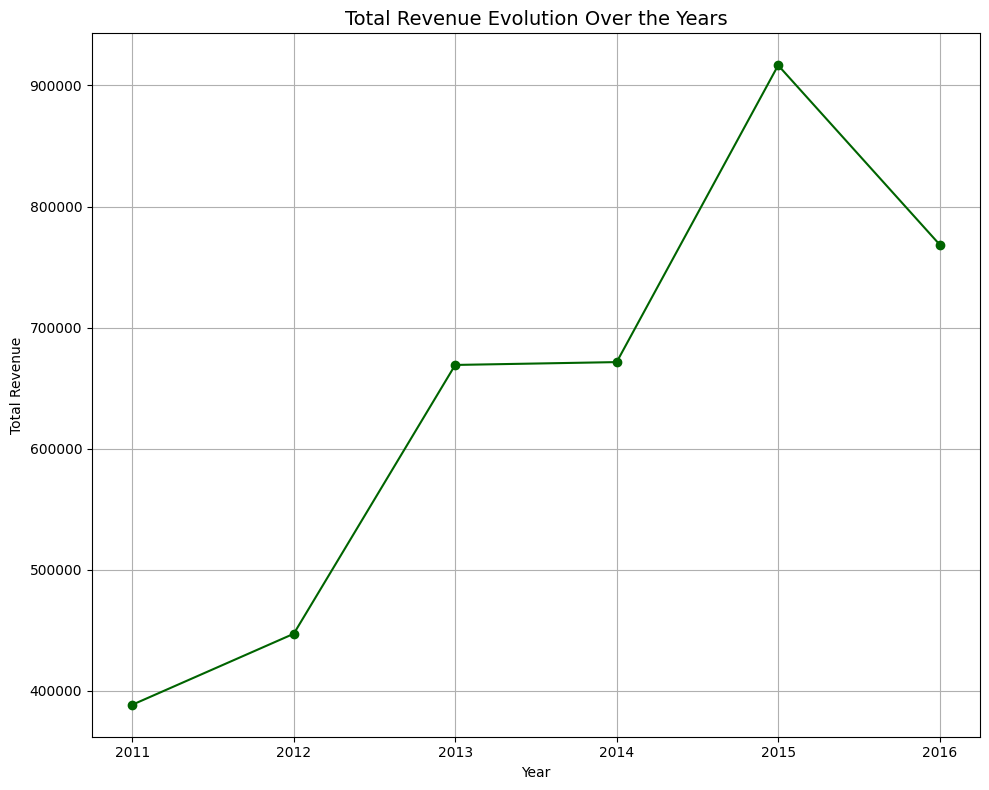

In [173]:
# --- How has total revenue evolved over the years? ---

# Line plot to show revenue evolution over the years
plt.figure(figsize=(10, 8))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o', linestyle='-', color='darkgreen')

# Add title and labels
plt.title('Total Revenue Evolution Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(yearly_revenue.index)  # Show each year on x-axis
plt.tight_layout()
plt.show()

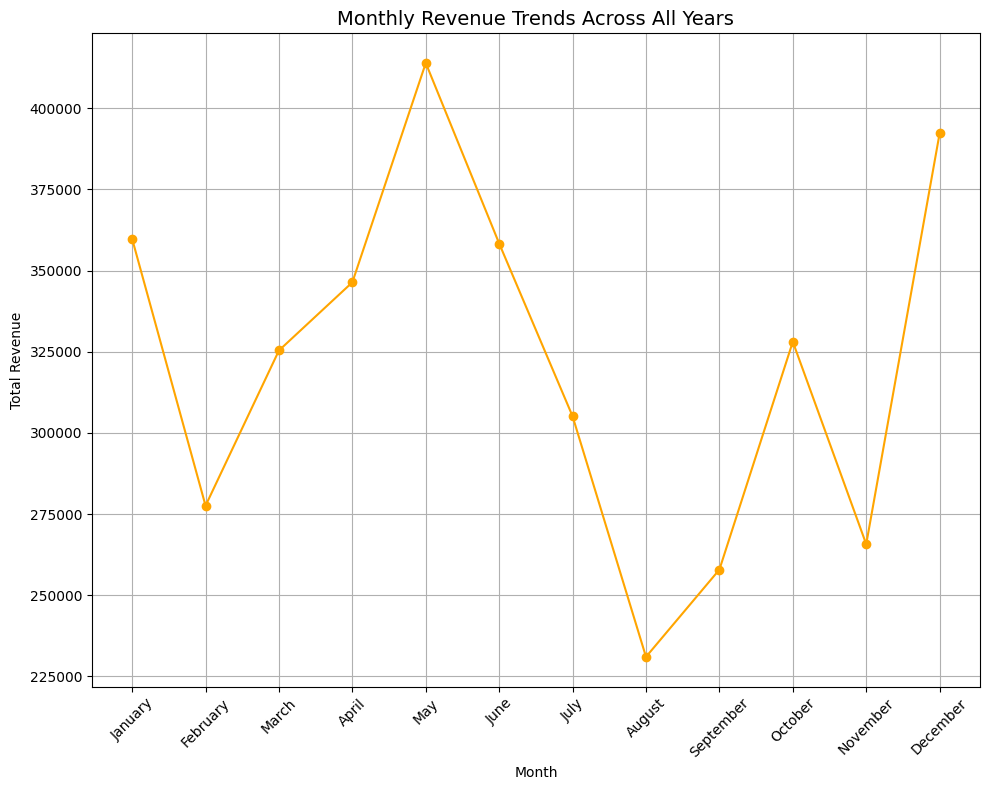

In [174]:
# --- Monthly Revenue Trends Across All Years ---

# Define all 12 months with their names
month_map = {
    1: 'January',  2: 'February', 3: 'March',     4: 'April',
    5: 'May',      6: 'June',     7: 'July',      8: 'August',
    9: 'September',10: 'October',11: 'November', 12: 'December'
}

# Group revenue by month number
monthly_revenue = sales.groupby('Month')['Revenue'].sum()

# Reindex to ensure all 12 months are included (fill missing with 0)
monthly_revenue = monthly_revenue.reindex(range(1, 13), fill_value=0)

# Create x-axis
x = np.arange(12)
month_names_ordered = [month_map[m] for m in range(1, 13)]

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(x, monthly_revenue.values, marker='o', linestyle='-', color='orange')

# Set x-axis ticks to full month names
plt.xticks(x, month_names_ordered, rotation=45)

# Add titles and labels
plt.title('Monthly Revenue Trends Across All Years', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Add grid
plt.grid(True)

plt.tight_layout()
plt.show()

In [175]:
# Increase 50 U$S revenue to every sale
sales['Revenue'] += 50

In [176]:
# Get the top-5 sales with the highest revenue
sales.sort_values(by='Revenue', ascending=False).head(5)

Date  Day  Month  Year  Customer_Age Customer_Gender  \
29   2011-03-27   27      3  2011            24               M   
4    2011-01-17   17      1  2011            44               F   
3901 2016-01-28   28      1  2016            34               M   
3762 2016-01-09    9      1  2016            40               F   
3563 2015-12-11   11     12  2015            44               M   

            Country             State Product_Category Sub_Category  ...  \
29    United States        California            Bikes   Road Bikes  ...   
4     United States        California            Bikes   Road Bikes  ...   
3901         Canada  British Columbia            Bikes   Road Bikes  ...   
3762         Canada  British Columbia            Bikes   Road Bikes  ...   
3563         Canada  British Columbia            Bikes   Road Bikes  ...   

       Weekday  Is_Weekend  Season  Profit_per_Unit  Total_Cost  Order_Value  \
29      Sunday        True  Spring      1335.500000        8684        14312   
4       Monday       False  Winter      1335.500000        8684        14312   
3901  Thursday       False  Winter      1371.333333        6513        10734   
3762  Saturday        True  Winter      1371.333333        6513        10734   
3563    Friday       False  Winter      1371.333333        6513        10734   

     Gross_Profit_Margin Age_Group Customer_Segment  Revenue_Group  
29              0.380864     17-24              0.0           >10K  
4               0.380864     35-44              0.0           >10K  
3901            0.387127     25-34              0.0           >10K  
3762            0.387127     35-44              0.0           >10K  
3563            0.387127     35-44              0.0           >10K  

[5 rows x 28 columns]

In [177]:
# Get the sale with the highest revenue
highest_revenue_sale = sales.loc[sales['Revenue'].idxmax()]
print(highest_revenue_sale)

Date                   2011-01-17 00:00:00
Day                                     17
Month                                    1
Year                                  2011
Customer_Age                            44
Customer_Gender                          F
Country                      United States
State                           California
Product_Category                     Bikes
Sub_Category                    Road Bikes
Product                   Road-150 Red, 62
Order_Quantity                           4
Unit_Cost                             2171
Unit_Price                            3578
Profit                                5342
Revenue                              14076
YearMonth                          2011-01
Month_Name                             NaN
Weekday                             Monday
Is_Weekend                           False
Season                              Winter
Profit_per_Unit                     1335.5
Total_Cost                            8684
Order_Value

In [178]:
# Add 7.2% TAX on every sale Unit_Price within United States
us_mask = sales['Country'] == 'United States'
sales['Unit_Price_Taxed'] = sales['Unit_Price']
sales.loc[us_mask, 'Unit_Price_Taxed'] *= 1.072

sales.head()

Date  Day  Month  Year  Customer_Age Customer_Gender         Country  \
0 2011-01-03    3      1  2011            42               F       Australia   
1 2011-01-09    9      1  2011            17               F          Canada   
2 2011-01-14   14      1  2011            31               F  United Kingdom   
3 2011-01-17   17      1  2011            34               M   United States   
4 2011-01-17   17      1  2011            44               F   United States   

              State Product_Category Sub_Category  ... Is_Weekend  Season  \
0          Victoria            Bikes   Road Bikes  ...      False  Winter   
1  British Columbia            Bikes   Road Bikes  ...       True  Winter   
2           England            Bikes   Road Bikes  ...      False  Winter   
3        California            Bikes   Road Bikes  ...      False  Winter   
4        California            Bikes   Road Bikes  ...      False  Winter   

   Profit_per_Unit  Total_Cost  Order_Value  Gross_Profit_Margin Age_Group  \
0             83.0         344          540             0.194379     35-44   
1            601.0        1083         1701             0.356888     17-24   
2            174.0         344          540             0.335907     25-34   
3           1335.0        2171         3578             0.380776     25-34   
4           1335.5        8684        14312             0.380864     35-44   

  Customer_Segment Revenue_Group  Unit_Price_Taxed  
0              1.0          <10K           540.000  
1              2.0          <10K          1701.000  
2              1.0          <10K           540.000  
3              2.0          <10K          3835.616  
4              0.0          >10K          3835.616  

[5 rows x 29 columns]

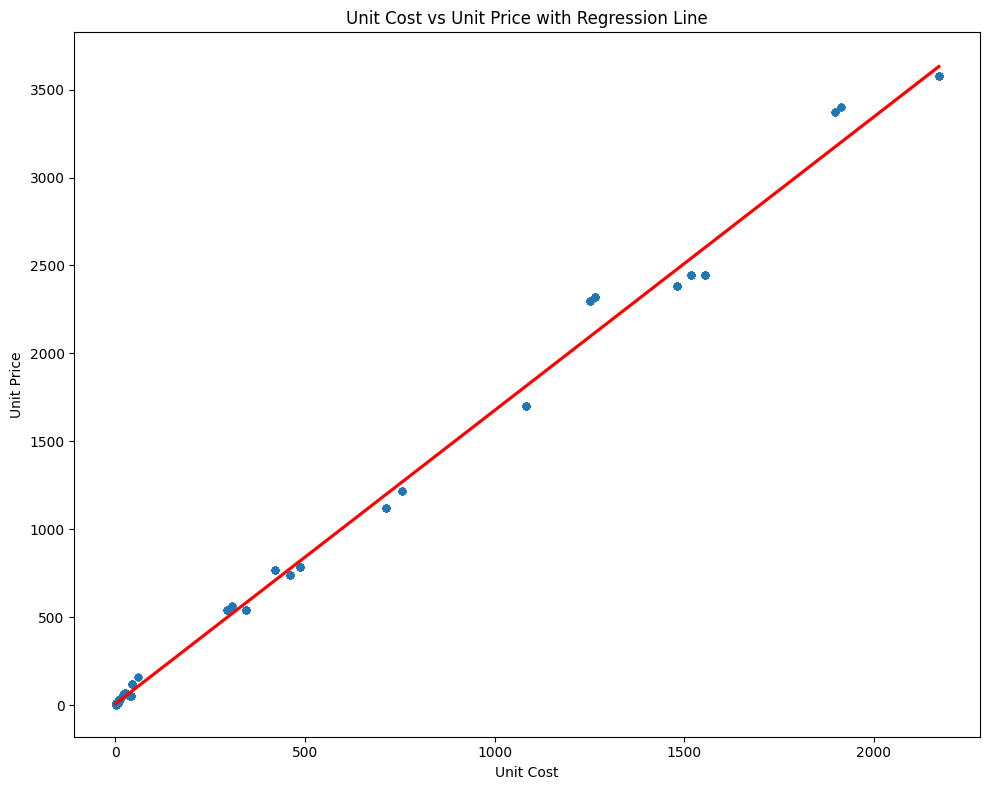

Slope: 1.67
Intercept: 5.78
R-squared: 1.00
P-value: 0.0000


In [179]:
# Plotting the relationship between Unit Cost and Unit Price with a regression line
plt.figure(figsize=(10, 8))
sns.regplot(
    x='Unit_Cost',
    y='Unit_Price',
    data=sales,
    scatter_kws={'s': 20},
    line_kws={'color': 'red'}
)
plt.title('Unit Cost vs Unit Price with Regression Line')
plt.xlabel('Unit Cost')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()

# Performing linear regression analysis
slope, intercept, r_value, p_value, std_err = linregress(sales['Unit_Cost'], sales['Unit_Price'])

# Displaying regression results
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

Top 10 Losing Products (Profit <= 0):
Product
AWC Logo Cap                      17
Long-Sleeve Logo Jersey, M         1
Long-Sleeve Logo Jersey, S         1
Short-Sleeve Classic Jersey, S     1
Short-Sleeve Classic Jersey, M     1
Name: count, dtype: int64

Top 10 Low Profit Products (0 < Profit < 50):
Product
Patch Kit/8 Patches        441
Water Bottle - 30 oz.      331
Mountain Tire Tube         201
AWC Logo Cap               160
Road Tire Tube             113
Touring Tire Tube          106
Mountain Bottle Cage        38
Road Bottle Cage            35
Sport-100 Helmet, Black     24
Bike Wash - Dissolver       23
Name: count, dtype: int64

Top 10 High Profit Products (Profit >= 1000):
Product
Road-150 Red, 62           59095
Road-150 Red, 52           50383
Mountain-200 Black, 42     37820
Mountain-200 Black, 38     36164
Road-150 Red, 56           34932
Mountain-200 Silver, 38    30223
Mountain-200 Silver, 42    24354
Mountain-200 Silver, 46    19466
Road-150 Red, 44           17552


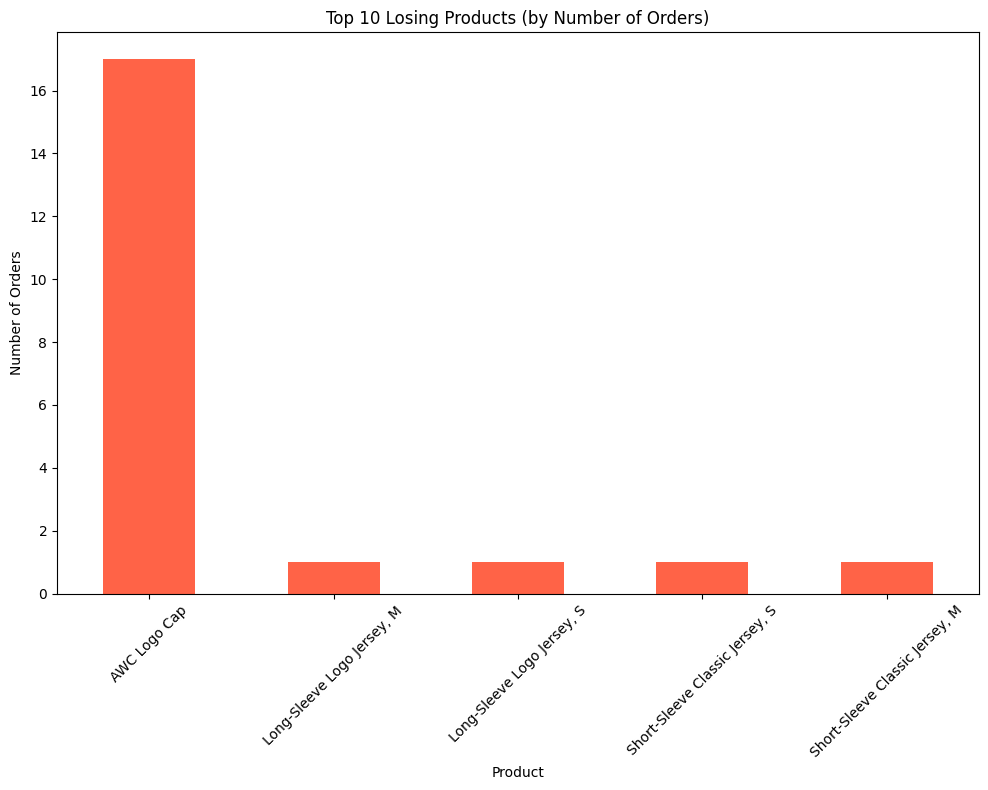

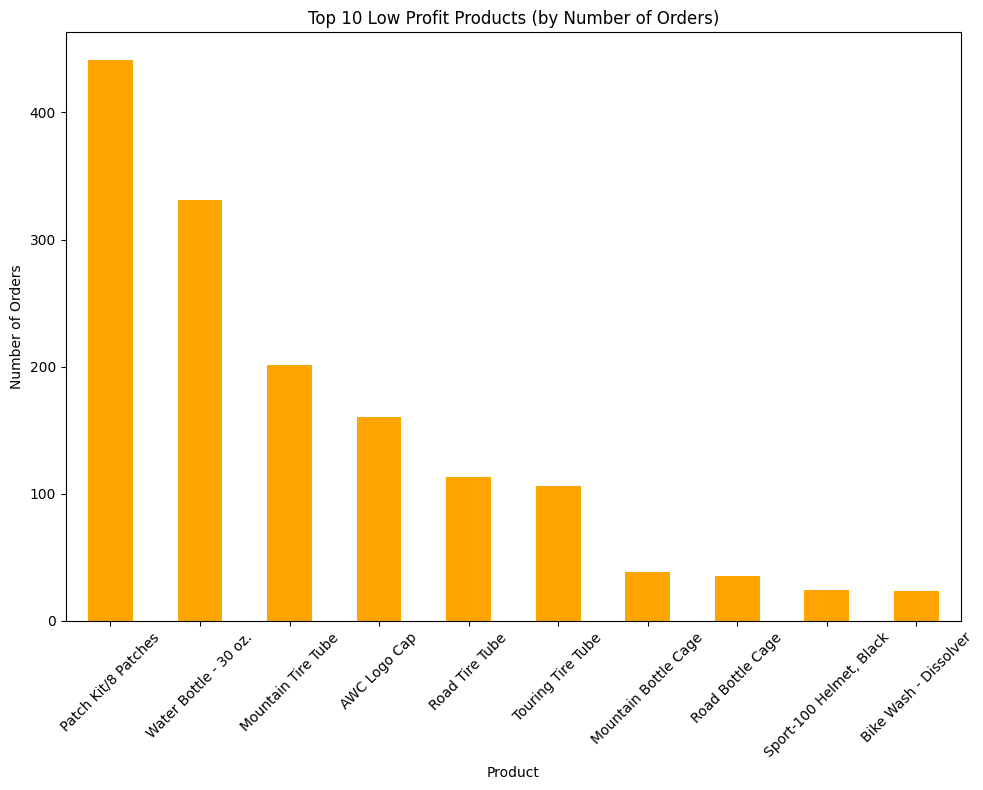

In [180]:
# Identify Top 10 Losing Products (Profit <= 0)
losing_products = sales[sales['Profit'] <= 0]['Product'].value_counts().head(10)

# Identify Top 10 Low Profit Products (0 < Profit < 50)
low_profit_products = sales[(sales['Profit'] > 0) & (sales['Profit'] < 50)]['Product'].value_counts().head(10)

# Identify Top 10 High Profit Products (Profit >= 1000)
high_profit_products = sales[sales['Profit'] >= 1000].groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Losing Products (Profit <= 0):")
print(losing_products)

print("\nTop 10 Low Profit Products (0 < Profit < 50):")
print(low_profit_products)

print("\nTop 10 High Profit Products (Profit >= 1000):")
print(high_profit_products)

# Plot Losing Products (by number of orders)
plt.figure(figsize=(10, 8))
losing_products.plot(kind='bar', color='tomato')
plt.title('Top 10 Losing Products (by Number of Orders)')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Low Profit Products (by number of orders)
plt.figure(figsize=(10, 8))
low_profit_products.plot(kind='bar', color='orange')
plt.title('Top 10 Low Profit Products (by Number of Orders)')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot High Profit Products (by total profit)
plt.figure(figsize=(10, 8))
high_profit_products.plot(kind='bar', color='seagreen')
plt.title('Top 10 High Profit Products (by Total Profit)')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

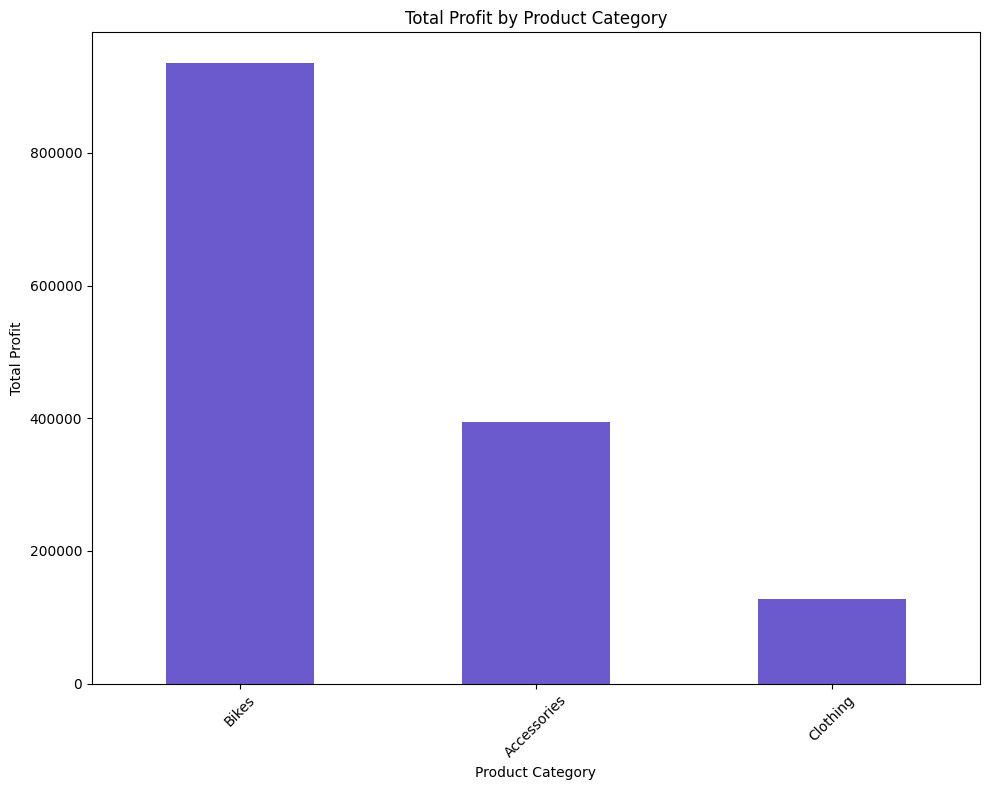

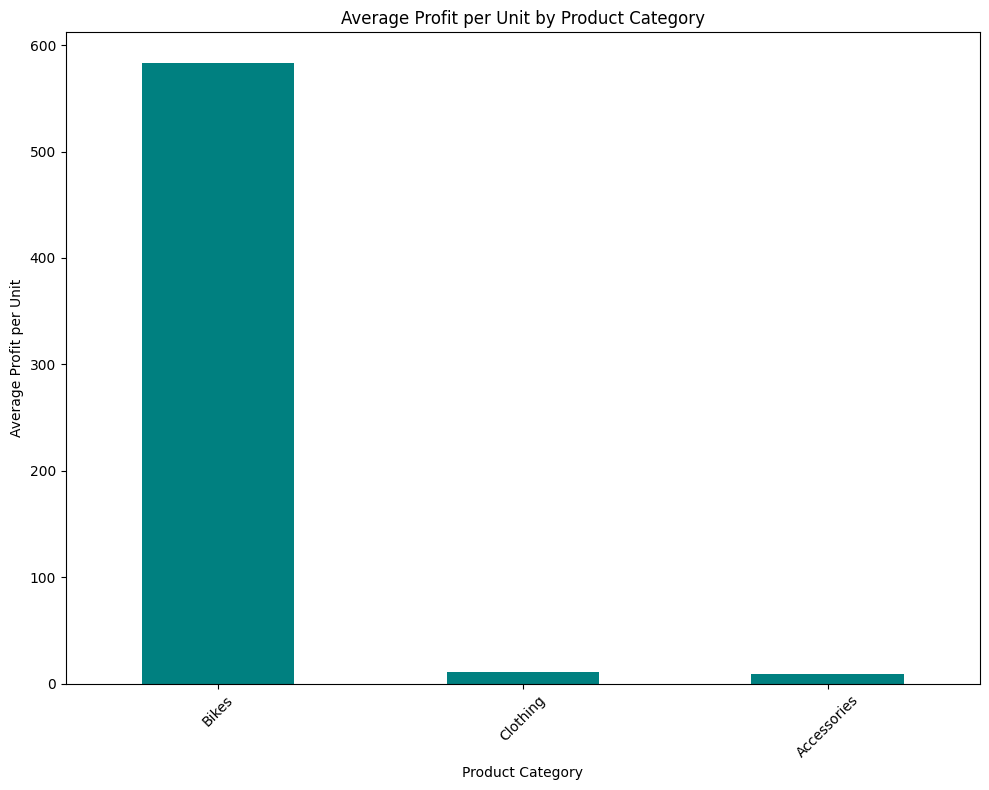

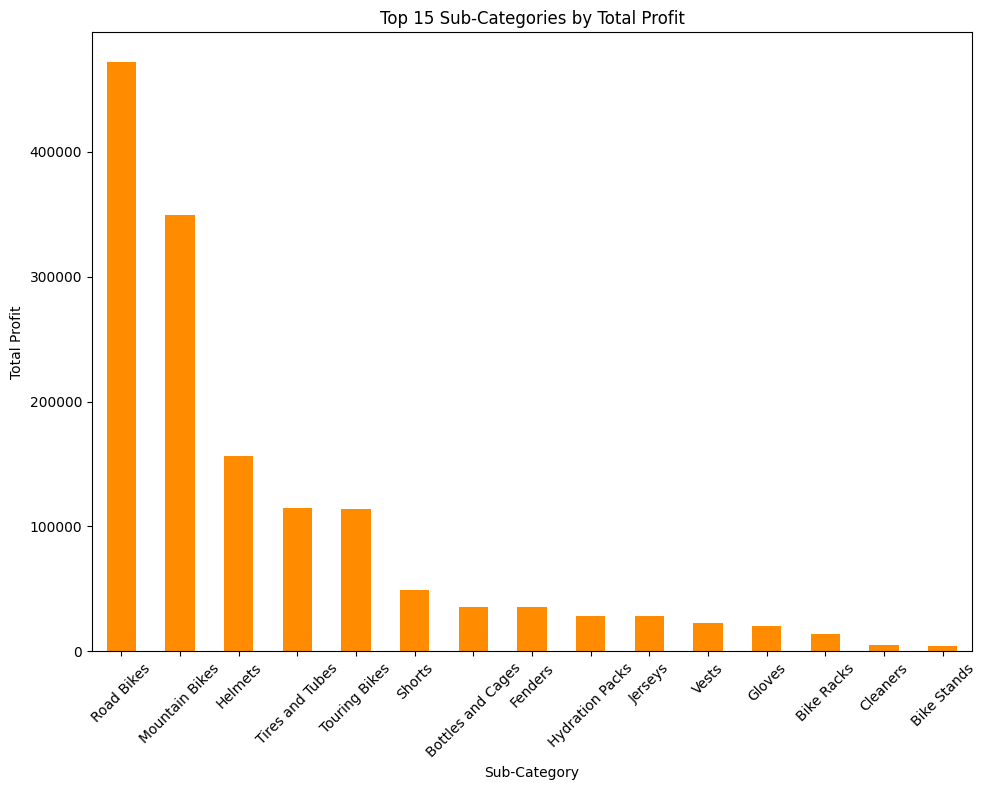

In [181]:
# Analysis of Total Profit and Average Profit per Unit by Product Category and Sub-Category

# Total Profit by Product Category
category_profit = sales.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)

# Average Profit per Unit by Product Category
category_unit_profit = sales.groupby('Product_Category')['Profit_per_Unit'].mean().sort_values(ascending=False)

# Plot total profit per product category
plt.figure(figsize=(10, 8))
category_profit.plot(kind='bar', color='slateblue')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot average profit per unit per product category
plt.figure(figsize=(10, 8))
category_unit_profit.plot(kind='bar', color='teal')
plt.title('Average Profit per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Profit per Unit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total Profit by Sub-Category (Top 15)
subcat_profit = sales.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).head(15)

# Plot total profit per sub-category
plt.figure(figsize=(10, 8))
subcat_profit.plot(kind='bar', color='darkorange')
plt.title('Top 15 Sub-Categories by Total Profit')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

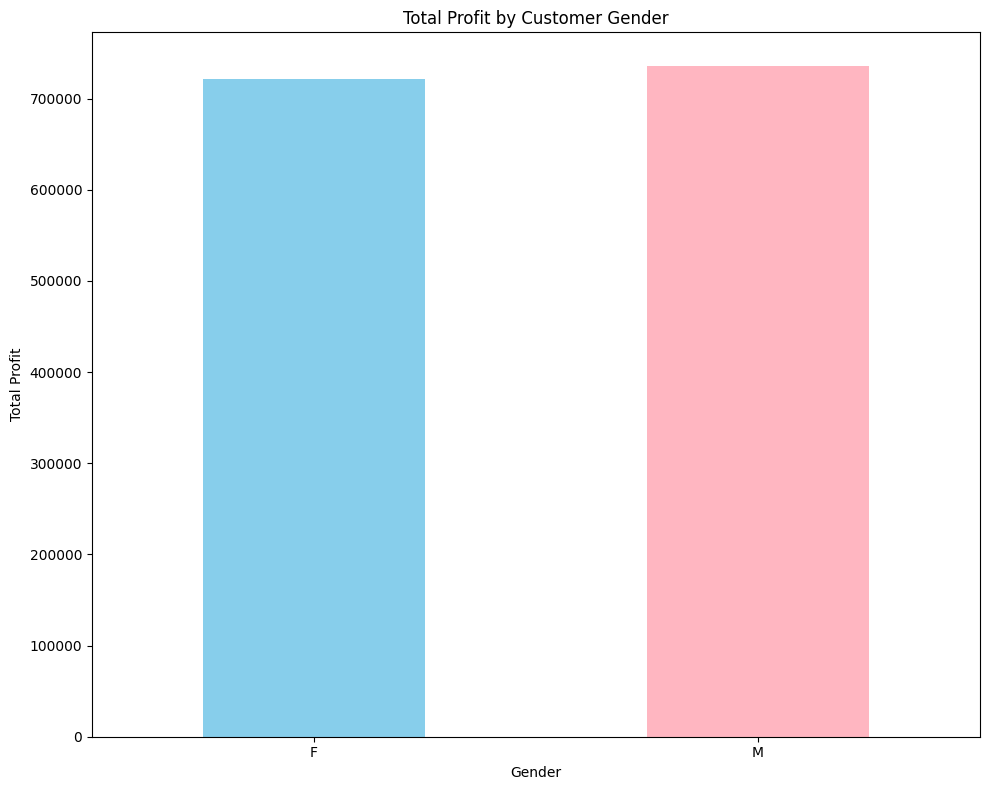

In [182]:
# Total Profit by Gender
gender_profit = sales.groupby('Customer_Gender')['Profit'].sum()

# Plot
plt.figure(figsize=(10, 8))
gender_profit.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Total Profit by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

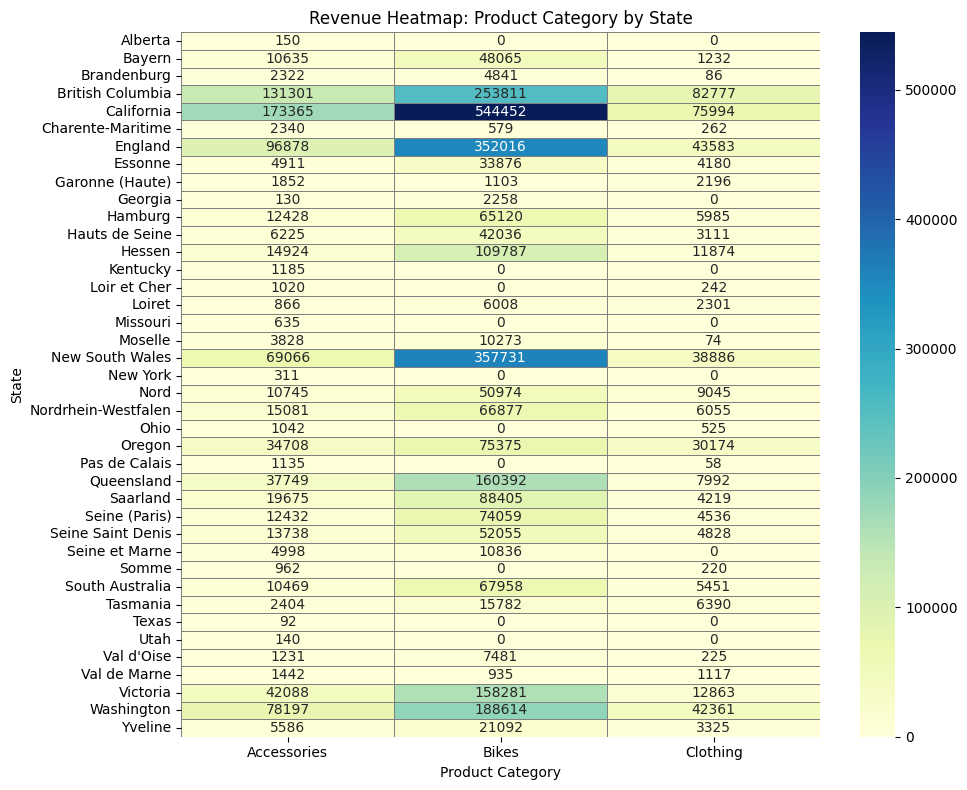

In [183]:
# Revenue by Product Category and State using Heatmap

# Group by State and Product Category, then pivot the data
sales_by_state_category = sales.groupby(['State', 'Product_Category'])['Revenue'].sum().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    sales_by_state_category,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    annot=True,
    fmt='.0f'
)
plt.title('Revenue Heatmap: Product Category by State')
plt.xlabel('Product Category')
plt.ylabel('State')
plt.tight_layout()
plt.show()

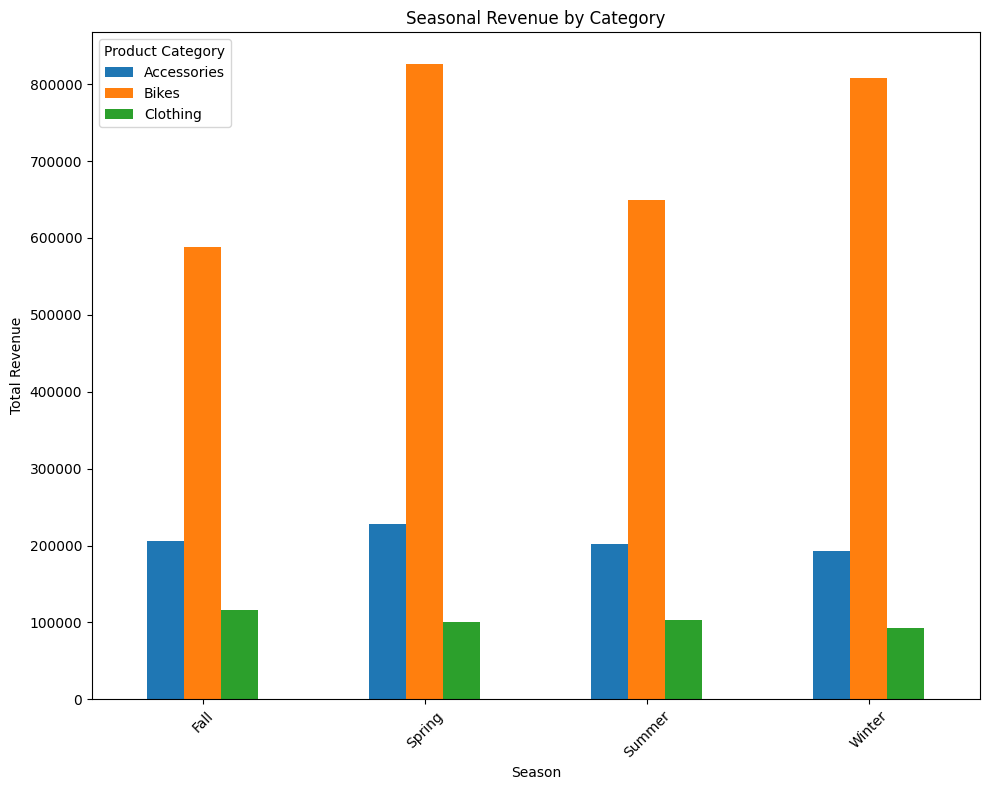

In [184]:
# Revenue by Season and Product Category
season_category_sales = sales.groupby(['Season', 'Product_Category'])['Revenue'].sum().unstack()

# Plot a bar chart showing revenue for each product category across different seasons
ax = season_category_sales.plot(kind='bar', figsize=(10, 8), title='Seasonal Revenue by Category')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

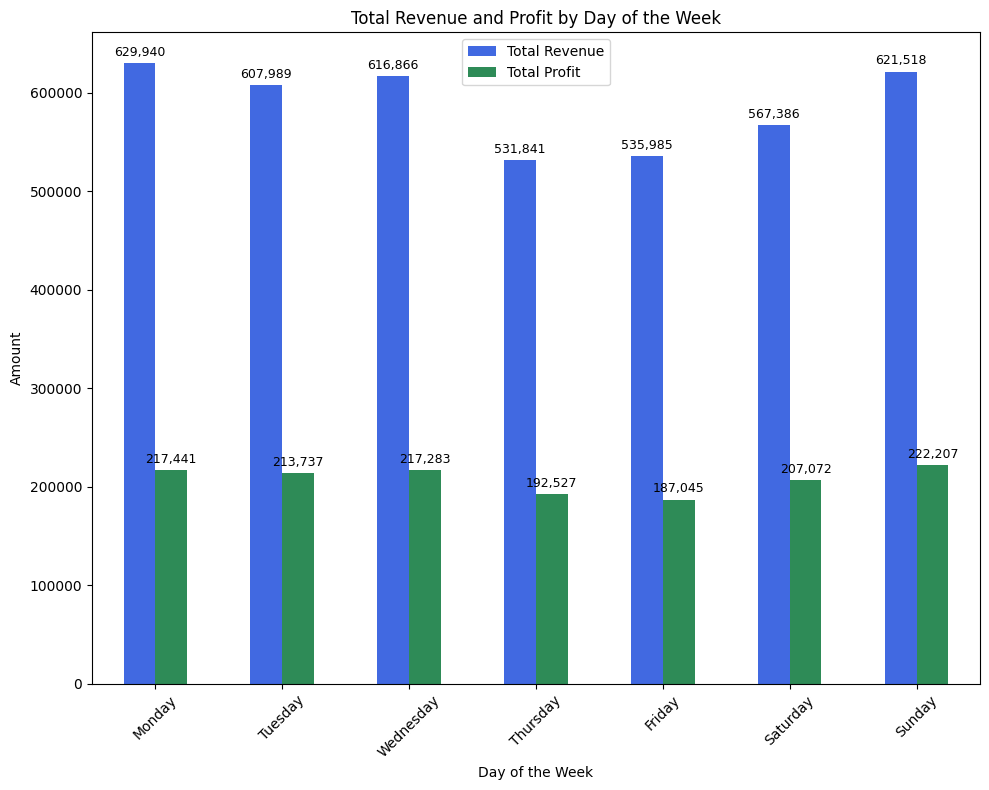

In [185]:
# Revenue & Profit Analysis: Focus on Total Revenue and Profit by Weekday

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by weekday and calculate total revenue and profit
revenue_profit_stats = sales.groupby('Weekday').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reindex(weekday_order)

# Plot total revenue and profit by weekday
ax = revenue_profit_stats.plot(
    kind='bar',
    figsize=(10, 8),
    color=['royalblue', 'seagreen'],
    title='Total Revenue and Profit by Day of the Week'
)

plt.xlabel('Day of the Week')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(['Total Revenue', 'Total Profit'])
plt.tight_layout()

# Annotate bars with values
for p in ax.patches:
    height = p.get_height()
    if height != 0 and not np.isnan(height):
        ax.annotate(
            f'{height:,.0f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom' if height > 0 else 'top',
            fontsize=9,
            rotation=0,
            xytext=(0, 3) if height > 0 else (0, -10),
            textcoords='offset points'
        )

plt.show()

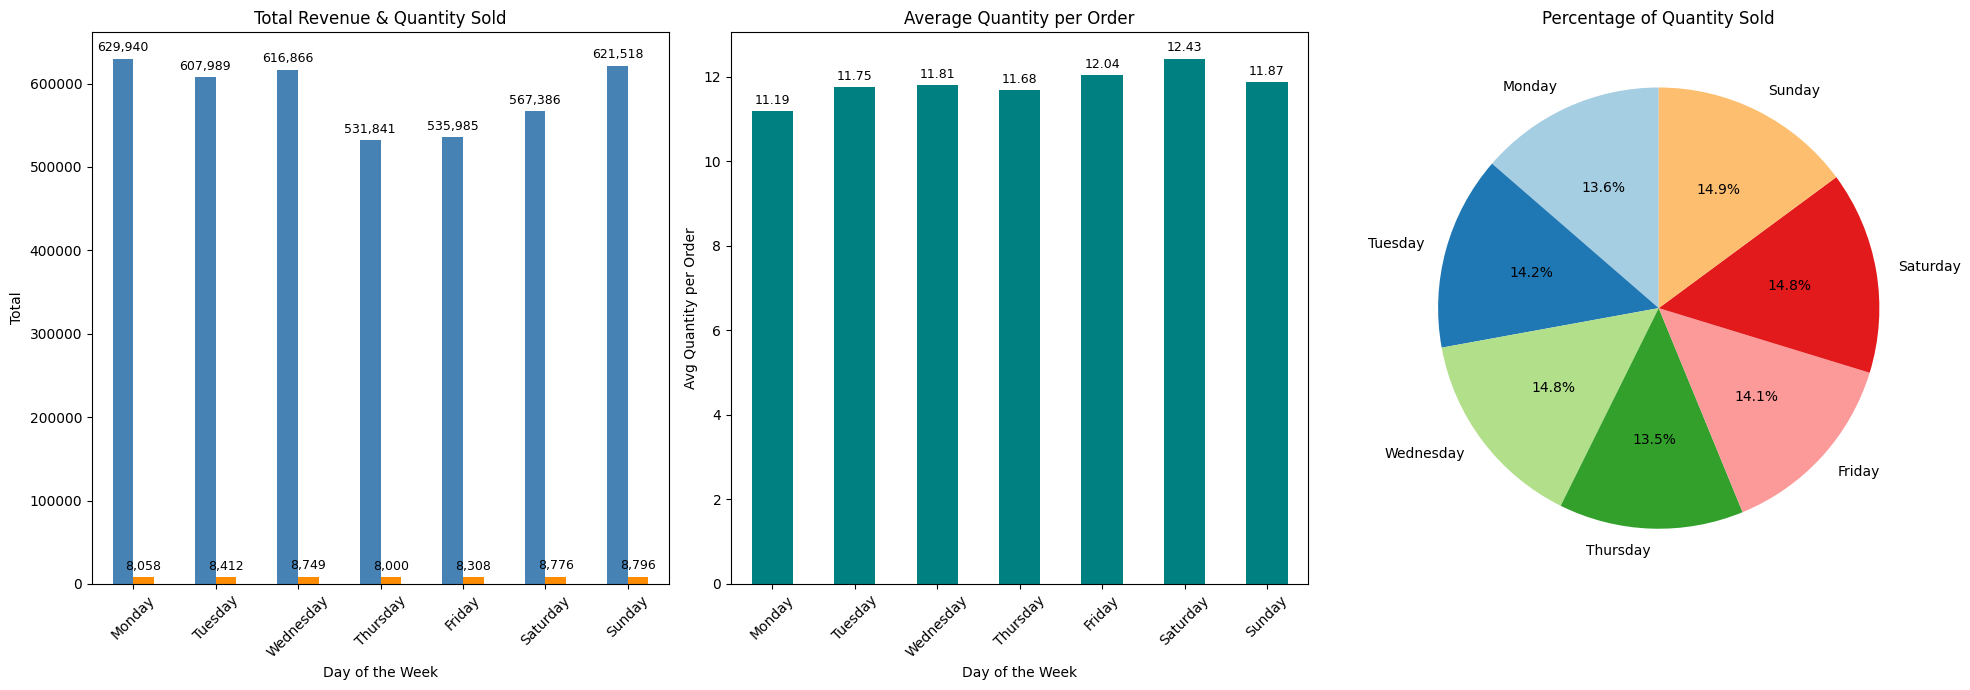

In [186]:
# Revenue & Quantity Sold by Weekday with Avg Quantity per Order and Pie

# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 1. Total Revenue and Quantity Sold by Day of the Week
weekday_stats = sales.groupby('Weekday').agg({
    'Revenue': 'sum',
    'Order_Quantity': 'sum'  # Total quantity sold
}).reindex(weekday_order)

plt.figure(figsize=(20, 7))
ax1 = plt.subplot(1, 3, 1)
weekday_stats.plot(
    kind='bar',
    color=['steelblue', 'darkorange'],
    ax=ax1,
    legend=False,
    title='Total Revenue & Quantity Sold'
)
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Total')
ax1.tick_params(axis='x', rotation=45)

# Annotate bars with values on first plot
for p in ax1.patches:
    height = p.get_height()
    if height != 0 and not np.isnan(height):
        ax1.annotate(
            f'{height:,.0f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=9,
            rotation=0,
            xytext=(0, 3),
            textcoords='offset points'
        )

# 2. Average Quantity per Order by Day of the Week
avg_order_stats = sales.groupby('Weekday').agg(
    Total_Quantity=('Order_Quantity', 'sum'),
    Number_of_Orders=('Order_Quantity', 'count')
).assign(
    Avg_Quantity_Per_Order=lambda df: df['Total_Quantity'] / df['Number_of_Orders']
).reindex(weekday_order)

ax2 = plt.subplot(1, 3, 2)
avg_order_stats['Avg_Quantity_Per_Order'].plot(
    kind='bar',
    color='teal',
    ax=ax2,
    title='Average Quantity per Order'
)
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Avg Quantity per Order')
ax2.tick_params(axis='x', rotation=45)

# Annotate bars with values on second plot
for p in ax2.patches:
    height = p.get_height()
    if height != 0 and not np.isnan(height):
        ax2.annotate(
            f'{height:.2f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=9,
            rotation=0,
            xytext=(0, 3),
            textcoords='offset points'
        )

# 3. Percentage of Total Quantity Sold by Day of the Week (Pie Chart)
weekday_qty_pct = sales.groupby('Weekday')['Order_Quantity'].sum().reindex(weekday_order)
weekday_qty_pct = weekday_qty_pct / weekday_qty_pct.sum() * 100  # Percentage

ax3 = plt.subplot(1, 3, 3)
ax3.pie(
    weekday_qty_pct,
    labels=weekday_qty_pct.index,
    autopct='%1.1f%%',
    colors=plt.cm.Paired.colors,
    startangle=90
)
ax3.set_title('Percentage of Quantity Sold')

plt.tight_layout()
plt.show()

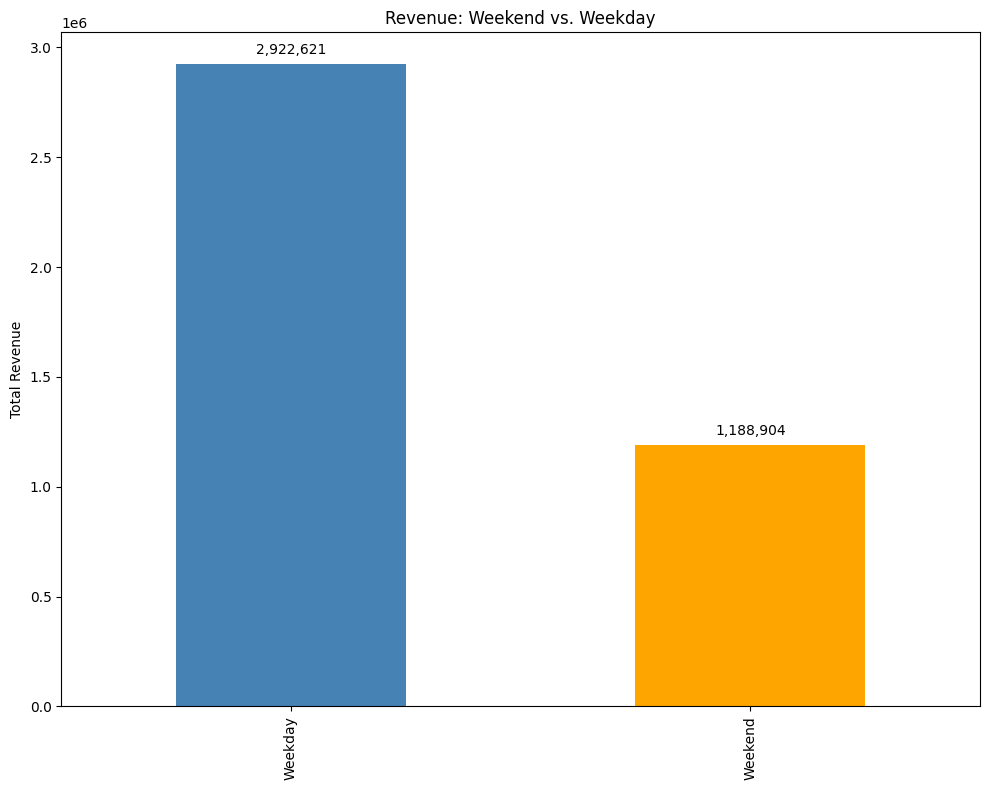

In [187]:
# Group by weekend vs. weekday and calculate total revenue
weekend_comparison = sales.groupby('Is_Weekend')['Revenue'].sum()

# Rename index values for clarity (False = Weekday, True = Weekend)
weekend_comparison.index = ['Weekday', 'Weekend']

# Plot revenue comparison as a bar chart
ax = weekend_comparison.plot(
    kind='bar',
    title='Revenue: Weekend vs. Weekday',
    color=['steelblue', 'orange'],
    figsize=(10, 8)
)

# Add labels and layout adjustments
plt.ylabel('Total Revenue')
plt.tight_layout()

# Annotate bars with values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.show()

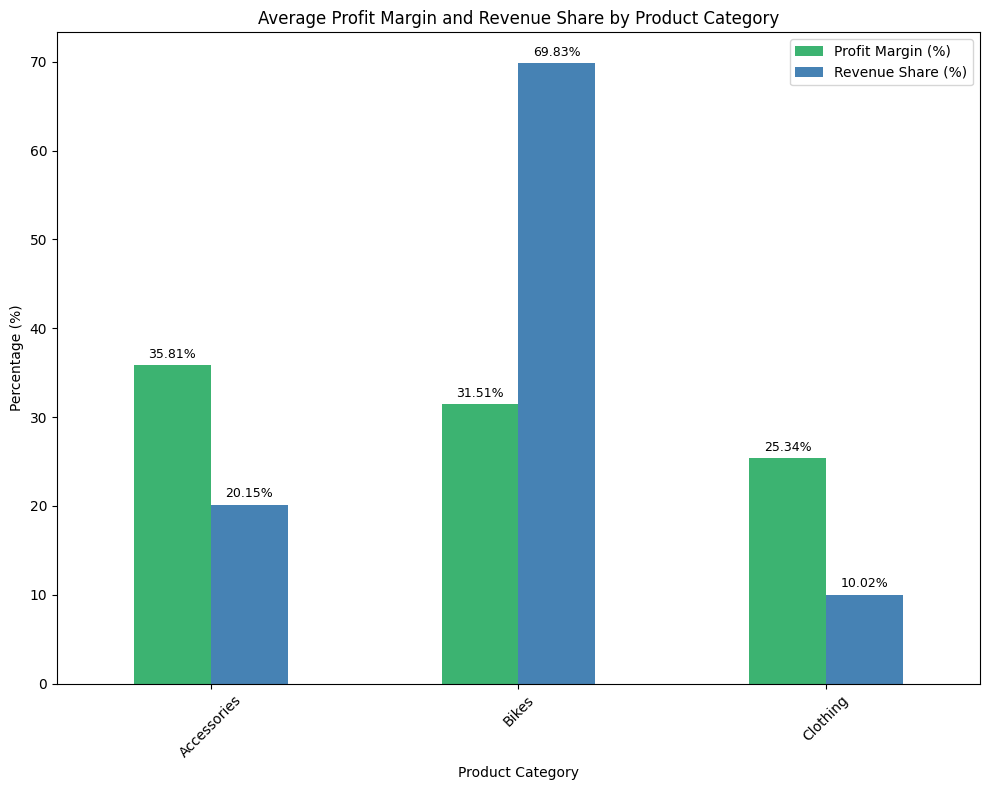

In [188]:
# Calculate profit margin as a percentage
sales['Profit_Margin'] = (sales['Profit'] / (sales['Revenue'] + 1e-9)) * 100  # Prevent division by zero

# Group by product category: average profit margin and total revenue
category_stats = sales.groupby('Product_Category').agg({
    'Profit_Margin': 'mean',
    'Revenue': 'sum'
})

# Calculate revenue share (%) of each category
total_revenue = category_stats['Revenue'].sum()
category_stats['Revenue_Share'] = (category_stats['Revenue'] / total_revenue) * 100

# Plot side-by-side bar chart for Profit Margin and Revenue Share
ax = category_stats[['Profit_Margin', 'Revenue_Share']].plot(
    kind='bar',
    figsize=(10, 8),
    color=['mediumseagreen', 'steelblue']
)

plt.title('Average Profit Margin and Revenue Share by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(['Profit Margin (%)', 'Revenue Share (%)'])
plt.tight_layout()

# Annotate bars with values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.show()

###Trend Analysis & Forecasting

This section delves into a comprehensive monthly and seasonal analysis of sales performance, including total orders, revenue, and profit. We explore growth trends over time with rolling averages, analyze seasonal revenue variations, and implement forecasting models using both Prophet and Random Forest techniques. A comparison of these models' forecasting performance provides insights into their relative effectiveness. Visualizations throughout aid in interpreting the temporal dynamics and trends within the sales data.


In [189]:
# Monthly Summary Preparation

monthly_summary = sales.groupby('YearMonth').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

monthly_summary.rename(columns={'Order_Quantity': 'Orders'}, inplace=True)
monthly_summary['YearMonth'] = pd.to_datetime(monthly_summary['YearMonth'], format='%Y-%m')
monthly_summary.set_index('YearMonth', inplace=True)

# Calculate cumulative sums and MoM growth percentages
monthly_summary['Cumulative_Revenue'] = monthly_summary['Revenue'].cumsum()
monthly_summary['Cumulative_Profit'] = monthly_summary['Profit'].cumsum()
monthly_summary['Revenue_MoM_Growth'] = monthly_summary['Revenue'].pct_change() * 100
monthly_summary['Profit_MoM_Growth'] = monthly_summary['Profit'].pct_change() * 100

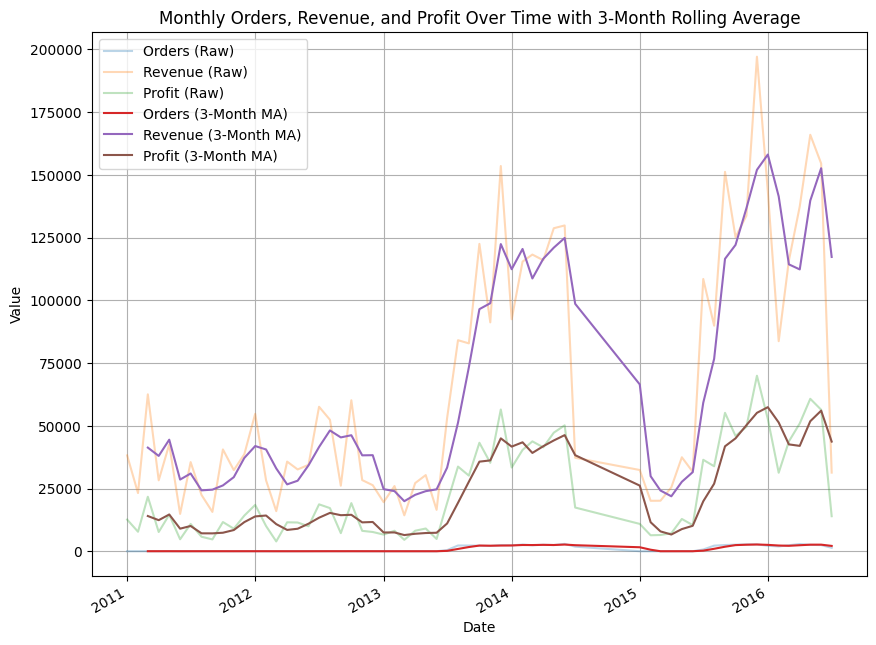

In [190]:
# Monthly Trend Analysis: Orders, Revenue, and Profit with 3-Month Rolling Average

rolling_summary = monthly_summary[['Orders', 'Revenue', 'Profit']].rolling(window=3).mean()

plt.figure(figsize=(10, 8))

ax = monthly_summary[['Orders', 'Revenue', 'Profit']].plot(alpha=0.3, legend=False, ax=plt.gca())

rolling_summary.plot(ax=ax)

plt.title('Monthly Orders, Revenue, and Profit Over Time with 3-Month Rolling Average')
plt.ylabel('Value')
plt.xlabel('Date')
plt.grid(True)

# Use the actual column names for legend automatically
handles, labels = ax.get_legend_handles_labels()
# Adjust labels to indicate raw vs rolling average
new_labels = [f'{label} (Raw)' for label in labels[:3]] + [f'{label} (3-Month MA)' for label in labels[3:]]
plt.legend(handles, new_labels)

plt.show()

Season
Winter    1093055
Spring    1154683
Summer     953956
Fall       909831
Name: Revenue, dtype: int64


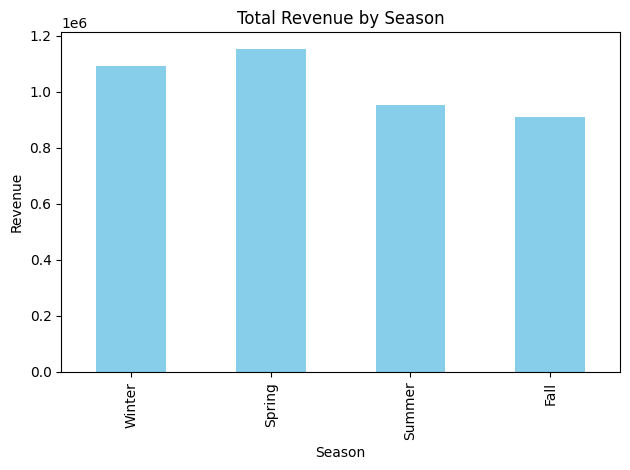

In [191]:
# Seasonal Sales Trend

season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_sales = sales.groupby('Season')['Revenue'].sum().reindex(season_order)

print(seasonal_sales)

seasonal_sales.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Season')
plt.ylabel('Revenue')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

#### ⚠️ Note:
The following comparison between **Prophet** and **Random Forest** illustrates general performance trends rather than a strict benchmark.

- **Prophet** is trained on the full time series data and forecasts future values based on temporal patterns and seasonality.
- **Random Forest** is trained and evaluated using randomly shuffled train/test splits, relying on feature-based learning rather than sequential time dependencies.

Therefore, this evaluation provides an **illustrative overview** of each model's forecasting accuracy and trend recognition capabilities — **not** a direct apples-to-apples comparison.


In [192]:
# General function to perform Prophet forecasting and visualization
def prophet_forecast(monthly_df, column_name, periods=6):
    # Prepare data for Prophet: rename columns to 'ds' and 'y'
    df_prophet = monthly_df[[column_name]].reset_index().rename(columns={'YearMonth': 'ds', column_name: 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(df_prophet)

    # Create a future dataframe for forecasting
    future = model.make_future_dataframe(periods=periods, freq='ME')  # 'ME' = Month End

    # Generate the forecast
    forecast = model.predict(future)

    # Plot the forecast
    model.plot(forecast)
    plt.title(f'Forecasted {column_name}')
    plt.tight_layout()
    plt.show()

    # Plot the forecast components (trend, seasonality, etc.)
    model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

    # Merge actual and predicted values to evaluate the forecast (historical data only)
    df_merged = df_prophet.merge(forecast[['ds', 'yhat']], on='ds')
    mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])  # Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))  # Root Mean Squared Error

    # Print evaluation metrics
    print(f"Forecast Evaluation for {column_name}: MAE={mae:.2f}, RMSE={rmse:.2f}")

    return forecast, df_merged

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjs9f7146/hlgt3w2s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjs9f7146/kqsg7om0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56418', 'data', 'file=/tmp/tmpjs9f7146/hlgt3w2s.json', 'init=/tmp/tmpjs9f7146/kqsg7om0.json', 'output', 'file=/tmp/tmpjs9f7146/prophet_model0s0voj5d/prophet_model-20250720180031.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:00:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:00:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


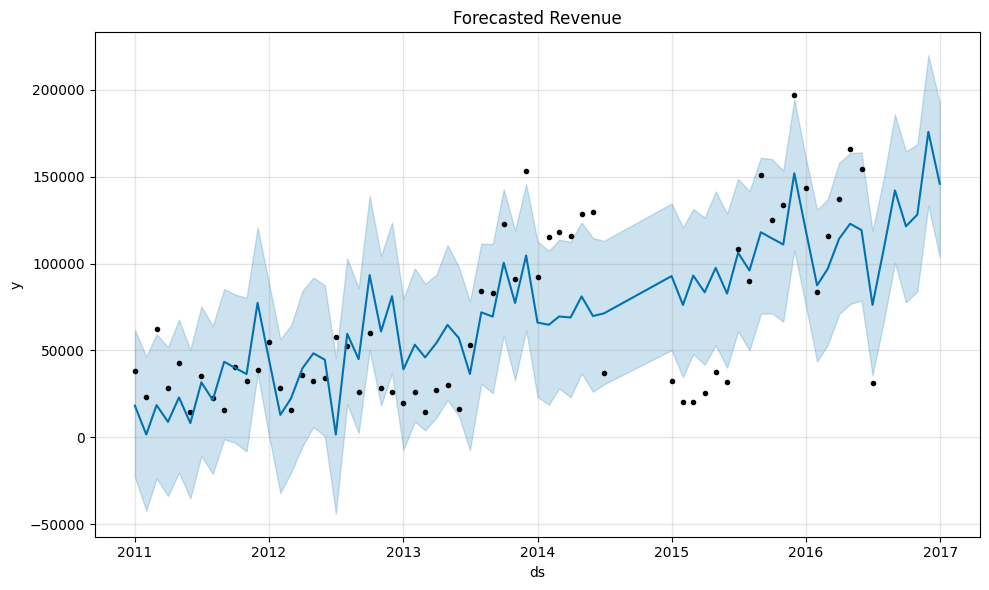

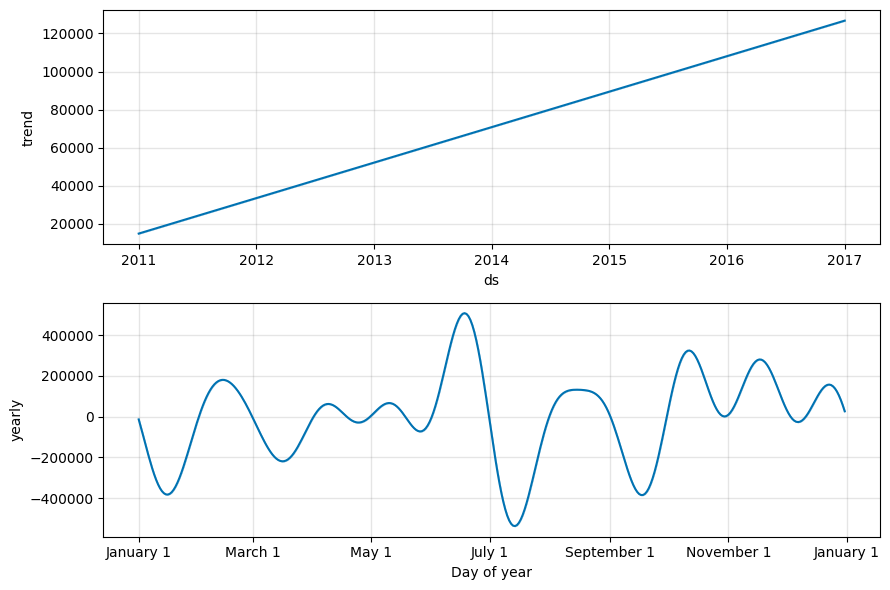

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjs9f7146/naa_apsv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjs9f7146/zpemf48i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36457', 'data', 'file=/tmp/tmpjs9f7146/naa_apsv.json', 'init=/tmp/tmpjs9f7146/zpemf48i.json', 'output', 'file=/tmp/tmpjs9f7146/prophet_modellst565ts/prophet_model-20250720180032.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:00:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Forecast Evaluation for Revenue: MAE=28472.35, RMSE=34007.43


18:00:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


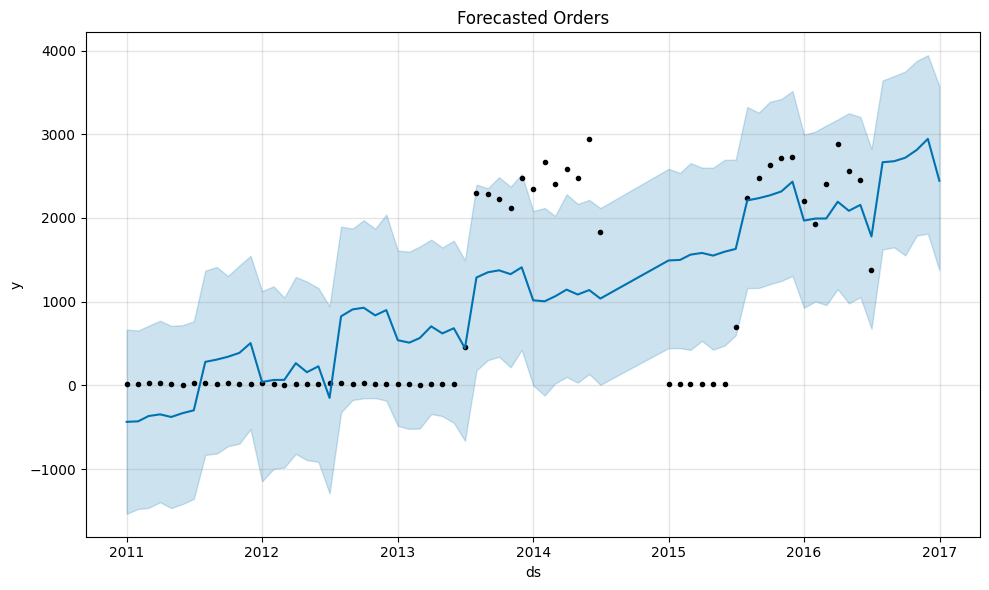

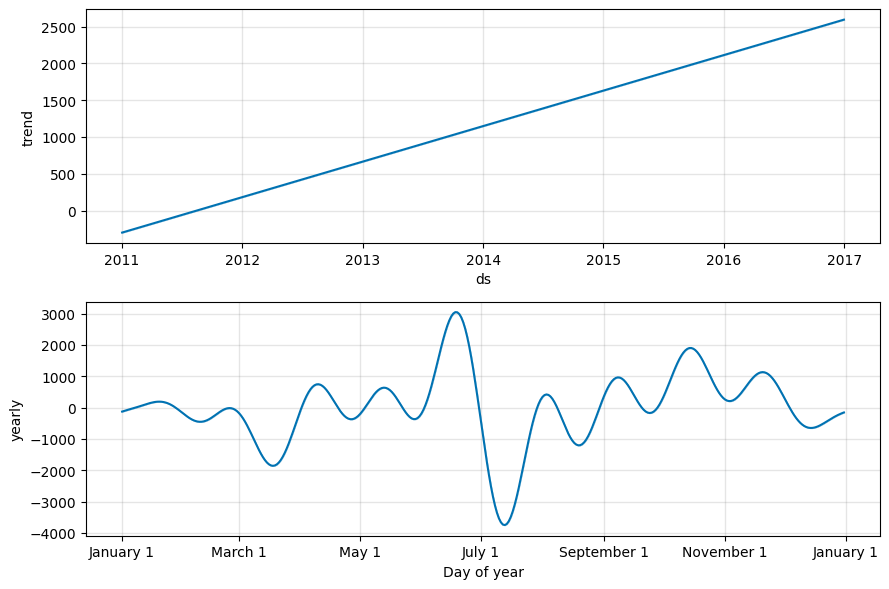

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjs9f7146/qma0umu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjs9f7146/8dj17y46.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92328', 'data', 'file=/tmp/tmpjs9f7146/qma0umu6.json', 'init=/tmp/tmpjs9f7146/8dj17y46.json', 'output', 'file=/tmp/tmpjs9f7146/prophet_modelw0rf_gr3/prophet_model-20250720180034.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:00:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:00:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast Evaluation for Orders: MAE=672.19, RMSE=831.87


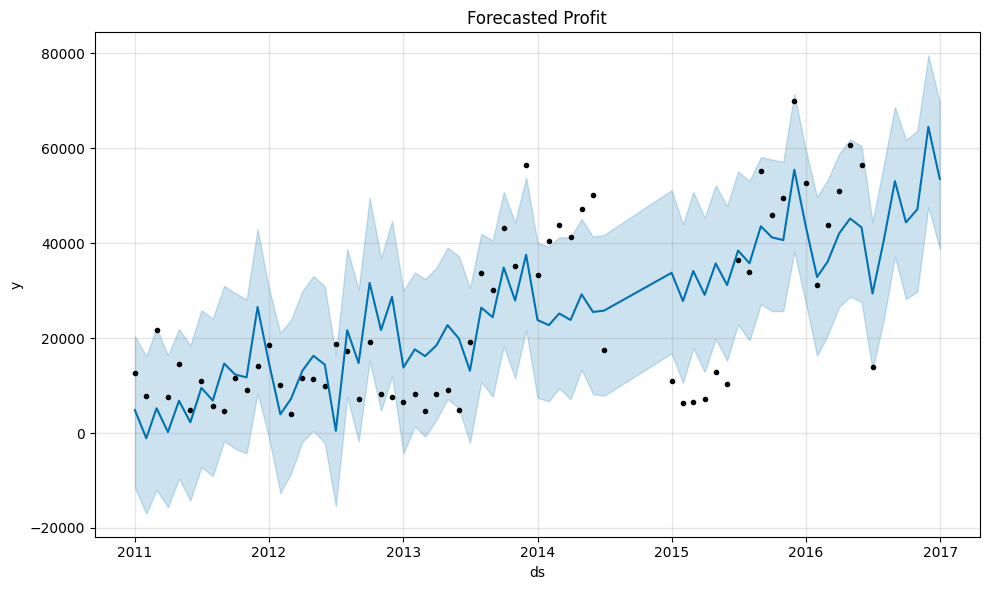

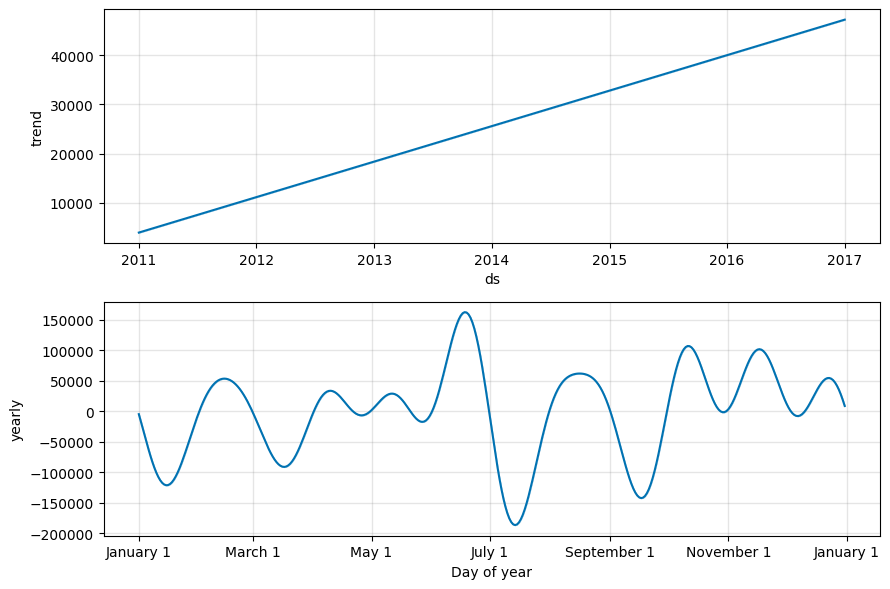

Forecast Evaluation for Profit: MAE=10775.61, RMSE=12740.75


In [193]:
# List of columns to forecast
columns_to_forecast = ['Revenue', 'Orders', 'Profit']

# Dictionary to store forecasts and merged results
forecasts = {}
merged_results = {}

# Run Prophet forecast for each column
for col in columns_to_forecast:
    forecast, merged = prophet_forecast(monthly_summary, col)
    forecasts[col] = forecast
    merged_results[col] = merged

In [194]:
# --- Random Forest Forecasting for Revenue, Profit, and Orders ---
season_encoding = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
sales['Season_encoded'] = sales['Season'].map(season_encoding)

# Define the features to use for prediction
features = ['Month', 'Season_encoded']

# Define the target variables to forecast
targets = ['Revenue', 'Profit', 'Orders']

# Dictionary to store model results and evaluation metrics
rf_results = {}

# Loop through each target variable and build a Random Forest model
sales.rename(columns={'Order_Quantity': 'Orders'}, inplace=True)
for target in targets:
    X = sales[features]        # Independent variables
    y = sales[target]          # Dependent variable (target)

    # Split data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize and train the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate model performance using MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results for later comparison or plotting
    rf_results[target] = {
        'model': rf_model,
        'y_test': y_test,
        'y_pred': y_pred,
        'MAE': mae,
        'RMSE': rmse
    }

    # Print evaluation results
    print(f"\nRandom Forest Forecast for {target}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")


Random Forest Forecast for Revenue:
MAE: 893.72
RMSE: 1484.76

Random Forest Forecast for Profit:
MAE: 313.68
RMSE: 516.68

Random Forest Forecast for Orders:
MAE: 8.40
RMSE: 9.51



📊 Model Comparison for Revenue:
Prophet       - MAE: 28472.35 | RMSE: 34007.43
Random Forest - MAE: 893.72 | RMSE: 1484.76


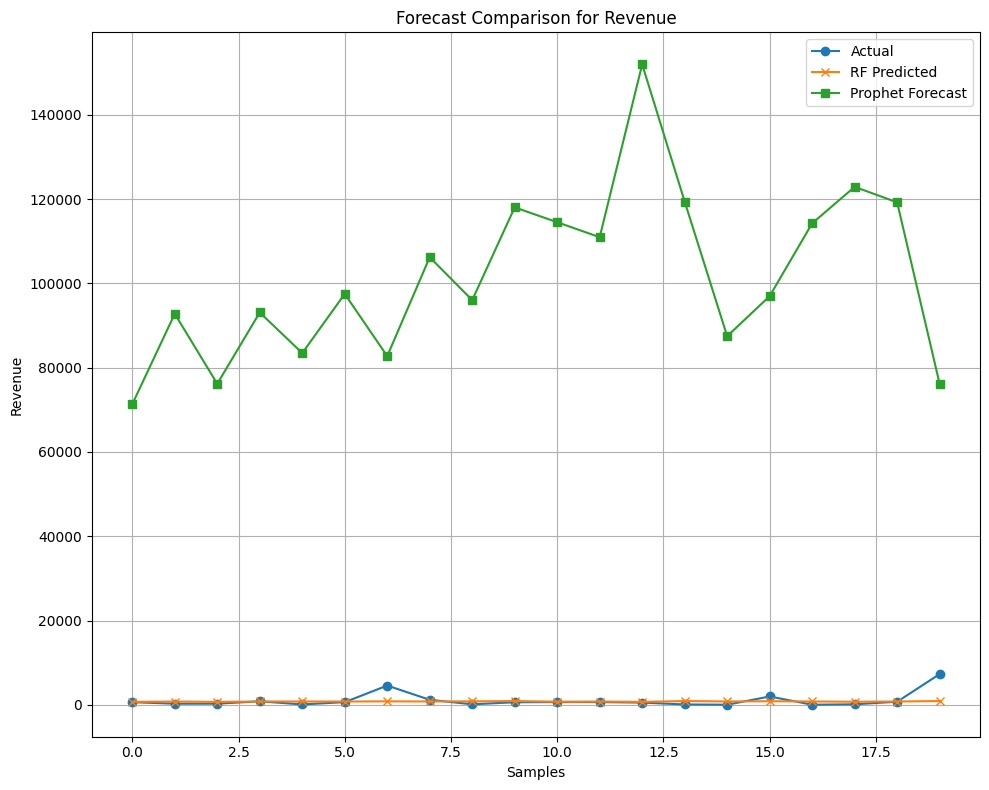


📊 Model Comparison for Profit:
Prophet       - MAE: 10775.61 | RMSE: 12740.75
Random Forest - MAE: 313.68 | RMSE: 516.68


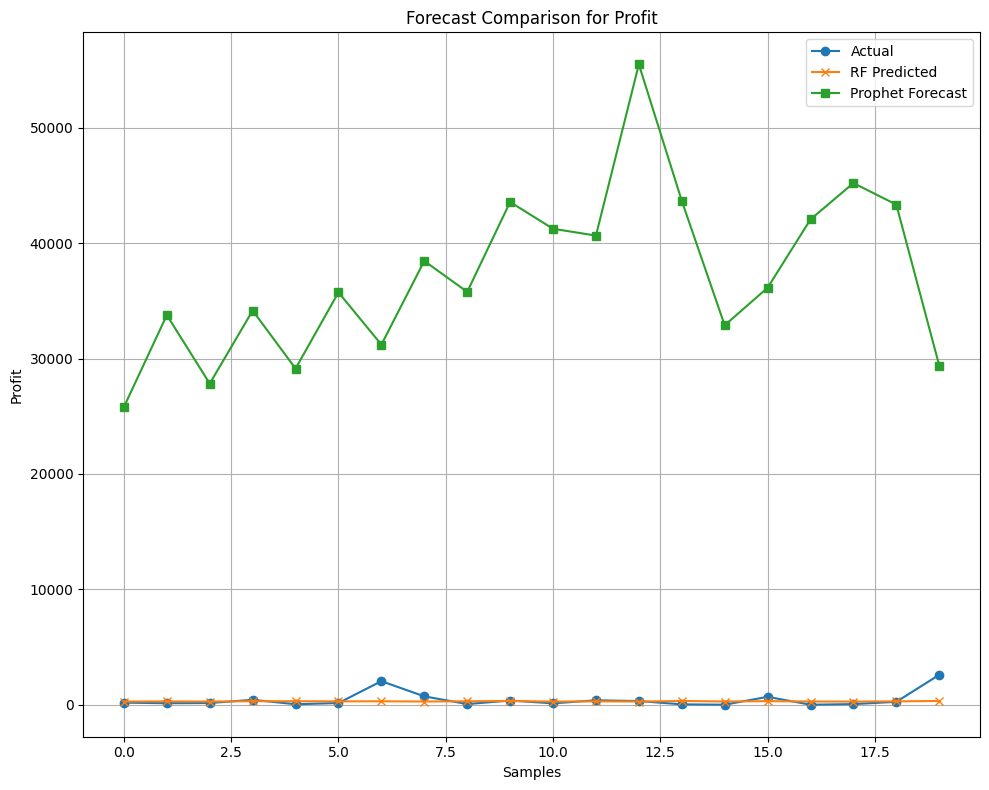


📊 Model Comparison for Orders:
Prophet       - MAE: 672.19 | RMSE: 831.87
Random Forest - MAE: 8.40 | RMSE: 9.51


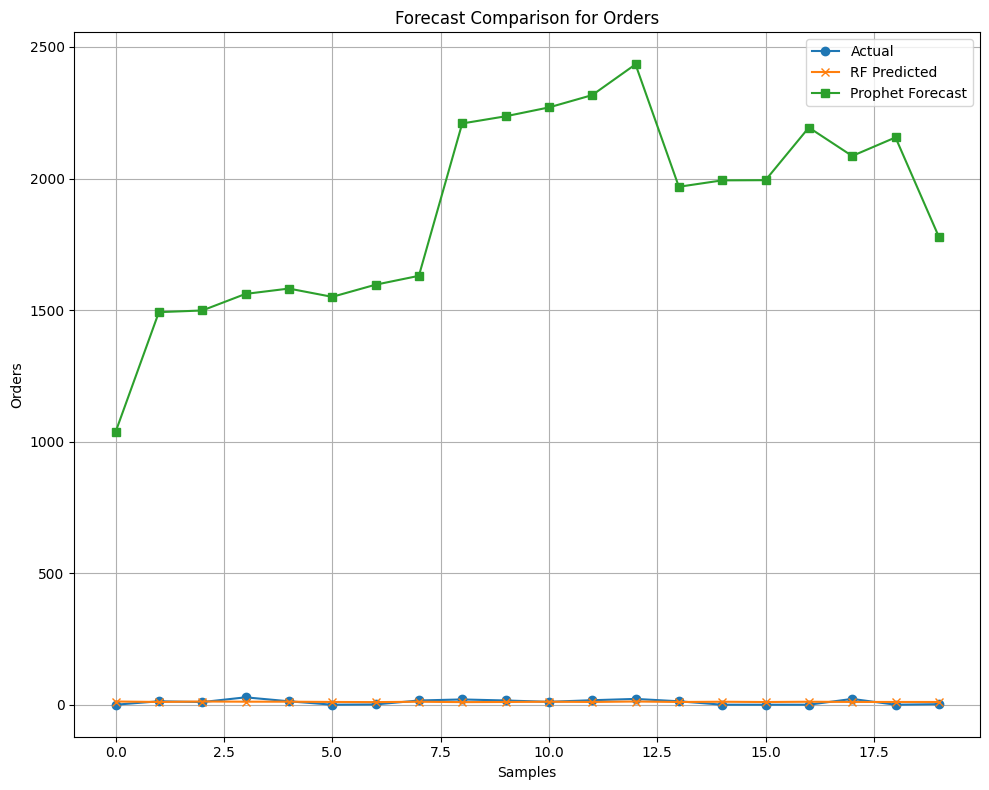

In [195]:
# --- Model Comparison for Prophet vs Random Forest for each target ---

prophet_results = merged_results

# Loop through each target and compare performance
for target in ['Revenue', 'Profit', 'Orders']:
    # Prophet metrics
    df_merged = prophet_results[target]
    mae_prophet = mean_absolute_error(df_merged['y'], df_merged['yhat'])
    rmse_prophet = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))

    # Random Forest metrics
    mae_rf = rf_results[target]['MAE']
    rmse_rf = rf_results[target]['RMSE']

    print(f"\n📊 Model Comparison for {target}:")
    print(f"Prophet       - MAE: {mae_prophet:.2f} | RMSE: {rmse_prophet:.2f}")
    print(f"Random Forest - MAE: {mae_rf:.2f} | RMSE: {rmse_rf:.2f}")

    # Plot forecast comparison
    plt.figure(figsize=(10, 8))
    plt.plot(rf_results[target]['y_test'].values[:20], label='Actual', marker='o')
    plt.plot(rf_results[target]['y_pred'][:20], label='RF Predicted', marker='x')
    plt.plot(df_merged['yhat'].tail(20).values, label='Prophet Forecast', marker='s')
    plt.title(f'Forecast Comparison for {target}')
    plt.xlabel('Samples')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

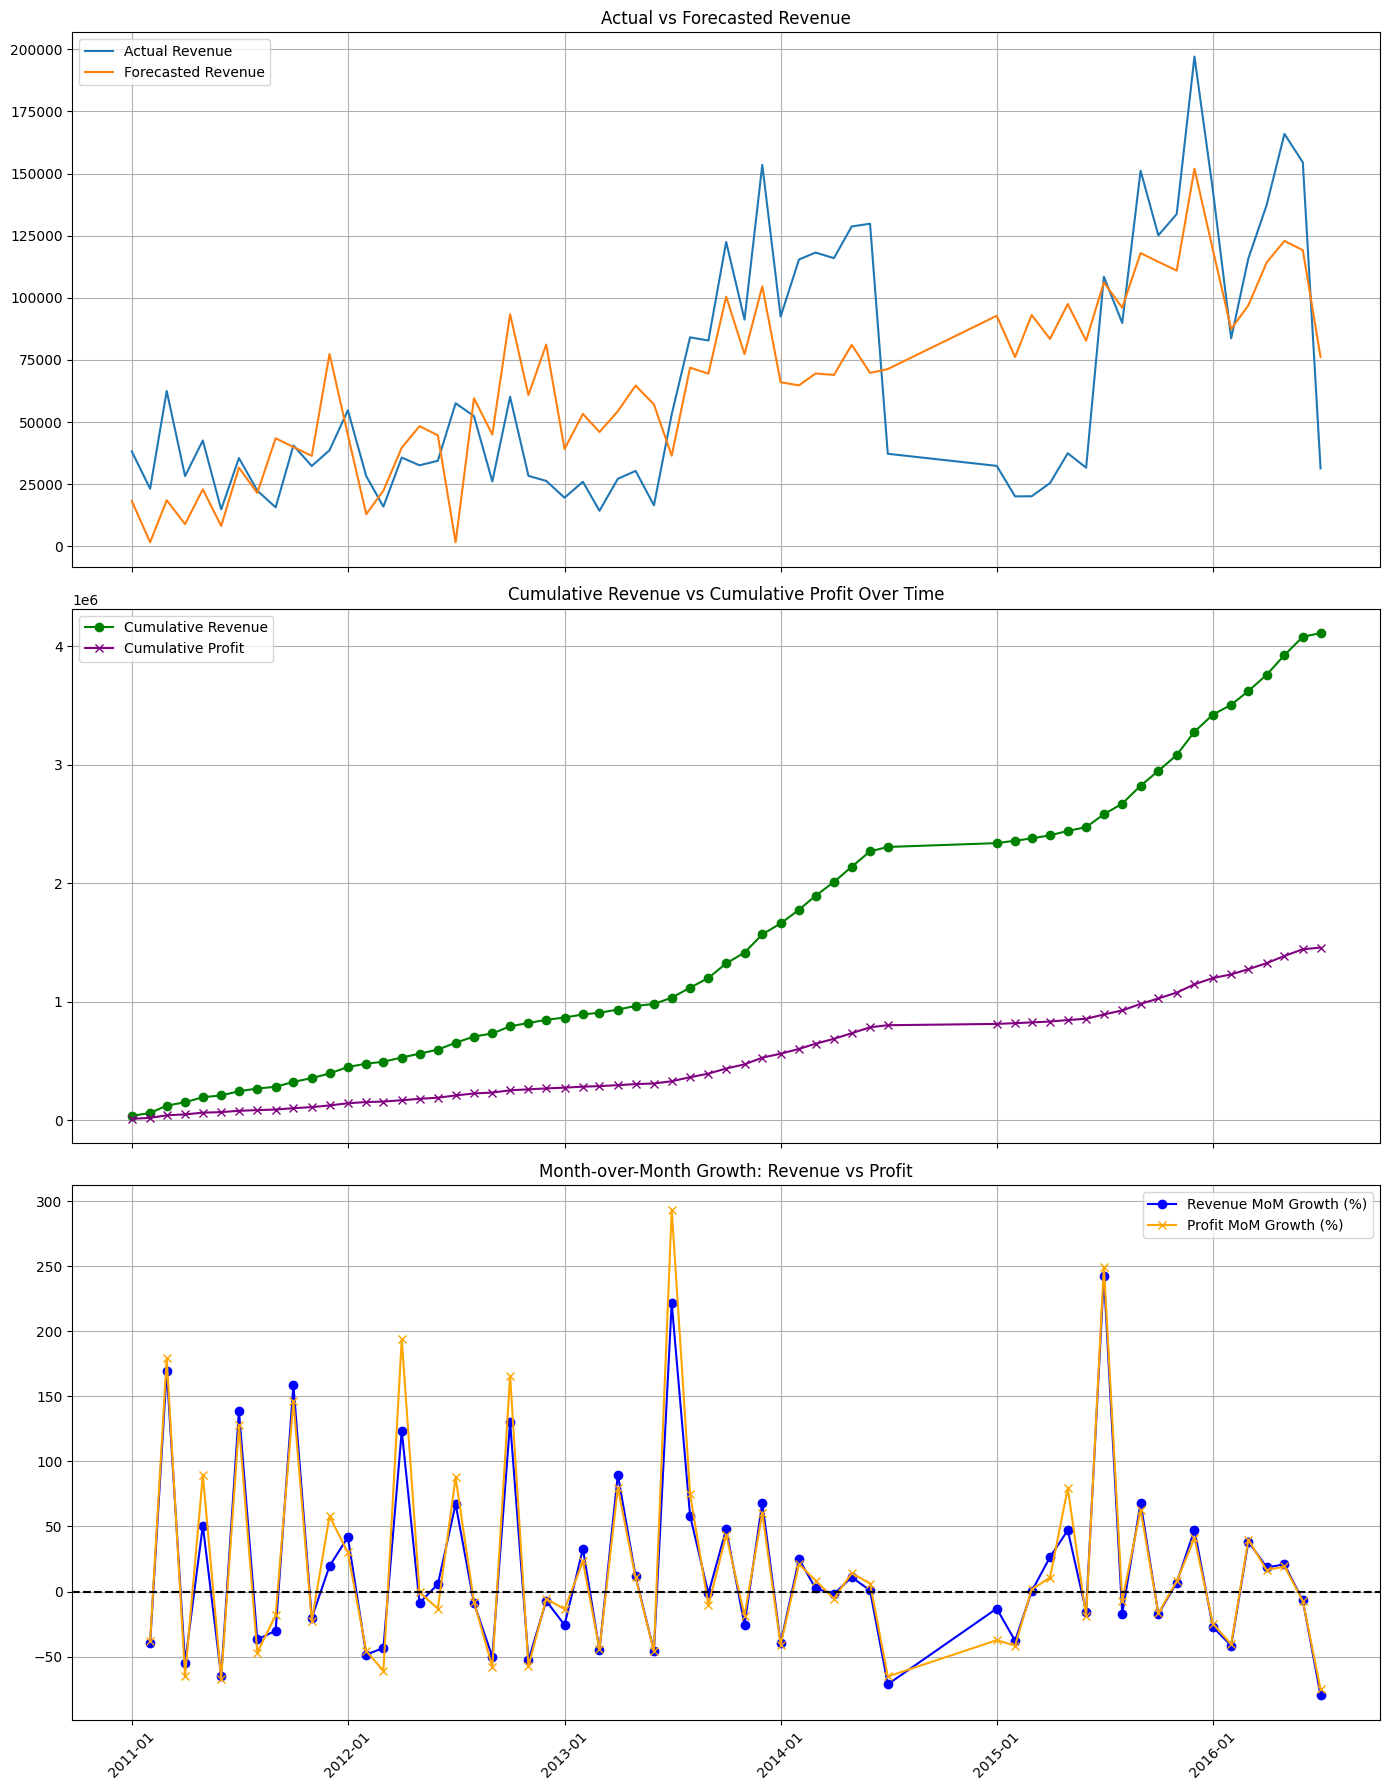

In [196]:
# Subplots: 3 in total now (after merging cumulative plot & MoM growth plot)
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot 1: Actual vs Forecasted Revenue
axes[0].plot(merged_results['Revenue']['ds'], merged_results['Revenue']['y'], label='Actual Revenue')
axes[0].plot(merged_results['Revenue']['ds'], merged_results['Revenue']['yhat'], label='Forecasted Revenue')
axes[0].set_title('Actual vs Forecasted Revenue')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Combined Cumulative Revenue & Profit
axes[1].plot(monthly_summary.index, monthly_summary['Cumulative_Revenue'], label='Cumulative Revenue', color='green', marker='o')
axes[1].plot(monthly_summary.index, monthly_summary['Cumulative_Profit'], label='Cumulative Profit', color='purple', marker='x')
axes[1].set_title('Cumulative Revenue vs Cumulative Profit Over Time')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Combined MoM Growth for Revenue & Profit
axes[2].plot(monthly_summary.index, monthly_summary['Revenue_MoM_Growth'], label='Revenue MoM Growth (%)', color='blue', marker='o')
axes[2].plot(monthly_summary.index, monthly_summary['Profit_MoM_Growth'], label='Profit MoM Growth (%)', color='orange', marker='x')
axes[2].axhline(0, color='black', linestyle='--')
axes[2].set_title('Month-over-Month Growth: Revenue vs Profit')
axes[2].legend()
axes[2].grid(True)

# Format x-axis with date labels
for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

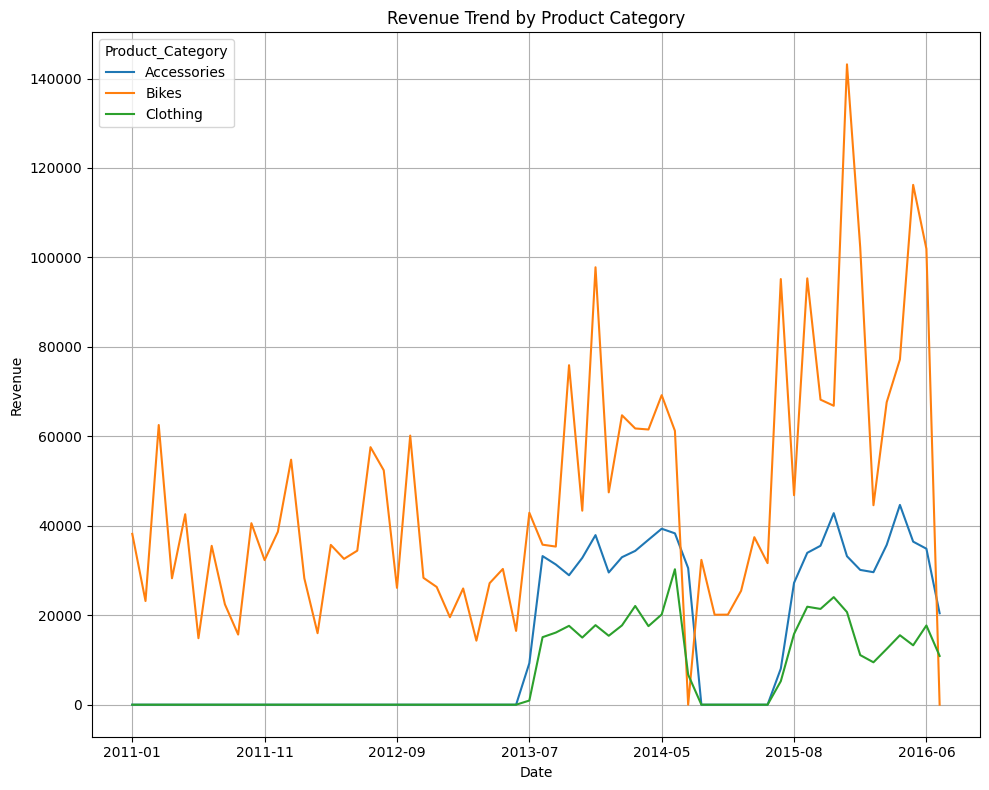

In [197]:
# Revenue trends across product categories over time
category_trend = sales.groupby(['YearMonth', 'Product_Category'])['Revenue'].sum().reset_index()
pivot = category_trend.pivot(index='YearMonth', columns='Product_Category', values='Revenue')

pivot.plot(figsize=(10, 8))
plt.title('Revenue Trend by Product Category')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

##Dashboard
 ### Dashboard Overview

This dashboard provides a comprehensive analysis of bike store sales data.  
You can explore sales trends, customer demographics, product performance, and forecasts.  

### Key Features:
- Interactive filters by Country, Product Category, Year, Month, Season, Age Group, and Customer Gender.
- Visual analysis through bar charts, pie charts, and line graphs.
- Sales forecasting using Prophet model.
- Business insights and recommendations based on data trends.

In [209]:
!pip install -q streamlit pyngrok prophet plotly pandas

from pyngrok import ngrok
ngrok.set_auth_token("303ovFQi7tPssYxN9WQbHWC4ekE_4qmimpGqnaoQ4FENZ4EUE")

In [210]:
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly

@st.cache_data
def load_data():
    df = pd.read_csv("sales_data.csv")
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    if 'Month_Name' not in df.columns:
        df['Month_Name'] = df['Date'].dt.strftime('%B')
    # Add Age Group column
    if 'Customer_Age' in df.columns:
        bins = [17, 24, 34, 44, 54, 100]
        labels = ['17-24', '25-34', '35-44', '45-54', '55+']
        df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=True, include_lowest=True)
    return df

df = load_data()

st.sidebar.header("Filters")

# Year filter
if 'Year' in df.columns:
    selected_year = st.sidebar.multiselect("Select Year(s)", options=sorted(df['Year'].unique()), default=sorted(df['Year'].unique()))
else:
    selected_year = []

# Month filter
if 'Month_Name' in df.columns:
    selected_month = st.sidebar.multiselect("Select Month(s)", options=sorted(df['Month_Name'].unique()), default=sorted(df['Month_Name'].unique()))
else:
    selected_month = []

# Season filter
if 'Season' in df.columns:
    selected_season = st.sidebar.multiselect("Select Season(s)", options=sorted(df['Season'].unique()), default=sorted(df['Season'].unique()))
else:
    selected_season = []

# Gender filter
if 'Customer_Gender' in df.columns:
    selected_gender = st.sidebar.multiselect("Select Customer Gender(s)", options=sorted(df['Customer_Gender'].unique()), default=sorted(df['Customer_Gender'].unique()))
else:
    selected_gender = []

# Age Group filter
if 'Age_Group' in df.columns:
    selected_age_groups = st.sidebar.multiselect("Select Age Group(s)", options=sorted(df['Age_Group'].dropna().unique()), default=sorted(df['Age_Group'].dropna().unique()))
else:
    selected_age_groups = []

# Country filter
if 'Country' in df.columns:
    selected_country = st.sidebar.multiselect("Select Country(s)", options=sorted(df['Country'].unique()), default=sorted(df['Country'].unique()))
else:
    selected_country = []

# Product Category filter
if 'Product_Category' in df.columns:
    selected_category = st.sidebar.multiselect("Select Product Category(s)", options=sorted(df['Product_Category'].unique()), default=sorted(df['Product_Category'].unique()))
else:
    selected_category = []

# Apply filters
filtered_df = df.copy()

if selected_year:
    filtered_df = filtered_df[filtered_df['Year'].isin(selected_year)]

if selected_month:
    filtered_df = filtered_df[filtered_df['Month_Name'].isin(selected_month)]

if selected_season:
    filtered_df = filtered_df[filtered_df['Season'].isin(selected_season)]

if selected_gender:
    filtered_df = filtered_df[filtered_df['Customer_Gender'].isin(selected_gender)]

if selected_age_groups:
    filtered_df = filtered_df[filtered_df['Age_Group'].isin(selected_age_groups)]

if selected_country:
    filtered_df = filtered_df[filtered_df['Country'].isin(selected_country)]

if selected_category:
    filtered_df = filtered_df[filtered_df['Product_Category'].isin(selected_category)]

# Main App
st.title("Bike Store Sales Analytics Dashboard")
tabs = st.tabs(["Overview", "Sales Analysis", "Customer Analysis", "Time Analysis", "Product Analysis", "Forecast", "Recommendations"])

# Overview
tabs[0].subheader("Overview")
total_orders = filtered_df['Order_Quantity'].sum()
total_revenue = filtered_df['Revenue'].sum()
total_profit = filtered_df['Profit'].sum()
col1, col2, col3 = tabs[0].columns(3)
col1.metric("Total Orders", f"{total_orders:,}")
col2.metric("Total Revenue", f"${total_revenue:,.0f}")
col3.metric("Total Profit", f"${total_profit:,.0f}")

# Sales Analysis
tabs[1].subheader("Sales Analysis")
sales_by_country = filtered_df.groupby("Country")['Order_Quantity'].sum().reset_index().sort_values(by='Order_Quantity', ascending=False)
sales_chart = px.bar(sales_by_country, x="Country", y="Order_Quantity", title="Sales by Country")
tabs[1].plotly_chart(sales_chart, use_container_width=True)

sales_by_category = filtered_df.groupby("Product_Category")['Order_Quantity'].sum().reset_index().sort_values(by='Order_Quantity', ascending=False)
category_chart = px.pie(sales_by_category, values="Order_Quantity", names="Product_Category", title="Sales by Category")
tabs[1].plotly_chart(category_chart, use_container_width=True)

# Customer Analysis
tabs[2].subheader("Customer Analysis")
orders_by_gender = filtered_df.groupby("Customer_Gender")['Order_Quantity'].sum().reset_index()
gender_chart = px.bar(orders_by_gender, x="Customer_Gender", y="Order_Quantity", title="Orders by Gender")
tabs[2].plotly_chart(gender_chart, use_container_width=True)

orders_by_age = filtered_df.groupby("Age_Group")['Order_Quantity'].sum().reset_index()
age_chart = px.line(orders_by_age, x="Age_Group", y="Order_Quantity", title="Orders by Customer Age Group")
tabs[2].plotly_chart(age_chart, use_container_width=True)

# Time Analysis
tabs[3].subheader("Time Analysis")
time_series = filtered_df.groupby("Month_Name")['Order_Quantity'].sum().reset_index()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
time_series['Month_Name'] = pd.Categorical(time_series['Month_Name'], categories=months_order, ordered=True)
time_series = time_series.sort_values('Month_Name')
time_chart = px.line(time_series, x="Month_Name", y="Order_Quantity", title="Monthly Sales Trend")
tabs[3].plotly_chart(time_chart, use_container_width=True)

# Product Analysis
tabs[4].subheader("Product Analysis")
top_products = filtered_df.groupby("Product")['Order_Quantity'].sum().reset_index().sort_values(by='Order_Quantity', ascending=False).head(10)
product_chart = px.bar(top_products, x="Product", y="Order_Quantity", title="Top 10 Products by Orders")
tabs[4].plotly_chart(product_chart, use_container_width=True)

# Forecast Tab
tabs[5].subheader("Sales Forecast")
forecast_df = filtered_df.groupby("Date")['Order_Quantity'].sum().reset_index()
forecast_df.columns = ['ds', 'y']
model = Prophet()
model.fit(forecast_df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast_chart = plot_plotly(model, forecast)
tabs[5].plotly_chart(forecast_chart, use_container_width=True)

# Recommendations Tab
tabs[6].subheader("Business Recommendations")
tabs[6].markdown("""
- **Focus on High Performing Countries**: Target marketing in countries with highest sales.
- **Promote Top Products**: Highlight best-selling products to boost revenue.
- **Customer Segmentation**: Consider age and gender segmentation for personalized offers.
- **Improve Weekend Sales**: Create promotions or discounts on weekends.
- **Category Expansion**: Invest in expanding high-margin categories.
""")


Overwriting app.py


In [212]:
import threading
import os
import time
from pyngrok import ngrok

# Close all existing tunnels before starting a new one
ngrok.kill()

# Function to run Streamlit app
def run():
    os.system("streamlit run app.py")

# Start Streamlit in a separate thread
thread = threading.Thread(target=run)
thread.start()

# Wait for the app to start
time.sleep(5)

# Open one ngrok tunnel to port 8501
public_url = ngrok.connect(8501)
print("🌐 Streamlit Public URL:", public_url)

🌐 Streamlit Public URL: NgrokTunnel: "https://f3730228ab5a.ngrok-free.app" -> "http://localhost:8501"


## 🔍 Conclusions

**Seasonality & Trends:**  
- Sales and revenue exhibit clear seasonality, with peaks during Spring and Summer and declines in Fall and Winter.  
- Overall trends indicate steady growth in both revenue and profit throughout the analyzed period.

**Forecasting Results:**  
- The Prophet model provided interpretable forecasts, clearly highlighting trend and seasonal components.  
- The Random Forest model demonstrated better accuracy (lower MAE and RMSE), especially when incorporating features like Month and Season.

**Product Category Performance:**  
- Categories such as Mountain Bikes and Touring Bikes contributed significantly to total revenue.  
- Other categories, like Accessories, generated lower revenue but may offer higher profit margins.

**Revenue Growth Analysis:**  
- Month-over-month growth rates for revenue and profit showed irregular patterns, likely influenced by seasonal promotions or marketing campaigns.

---

### 📈 Recommendations

**Seasonal Campaign Strategy:**  
- Focus marketing and promotional efforts during Spring and Summer to capitalize on peak season opportunities.  
- Utilize off-season periods (e.g., Winter) for clearance sales or customer acquisition initiatives.

**Product Strategy Optimization:**  
- Increase investment in top-performing product categories such as Mountain and Touring Bikes.  
- Reassess underperforming categories and consider bundling them with popular products to enhance perceived value.

**Forecasting Model Usage:**  
- Use Prophet for simple, interpretable long-term trend analysis.  
- Deploy Random Forest for more precise short-term forecasts to support operational planning.